In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.animation as animation
import matplotlib  # New import to use matplotlib.colormaps
import re  # Import the regular expression module

# Load the data
data = pd.read_csv('output.csv')

# Display the first few rows of the dataframe
print(data.head())


   Timestep  GiniCoefficient  AverageEducationLevel  \
0         0              0.0                 2.0140   
1         1              0.0                 2.0812   
2         2              0.0                 2.1880   
3         3              0.0                 2.2944   
4         4              0.0                 2.4144   

   AverageSocioeconomicStatus  PovertyRate/Unemployed  
0                      2.1020                  0.1348  
1                      2.1684                  0.1108  
2                      2.2444                  0.1104  
3                      2.3472                  0.1040  
4                      2.4092                  0.0888  


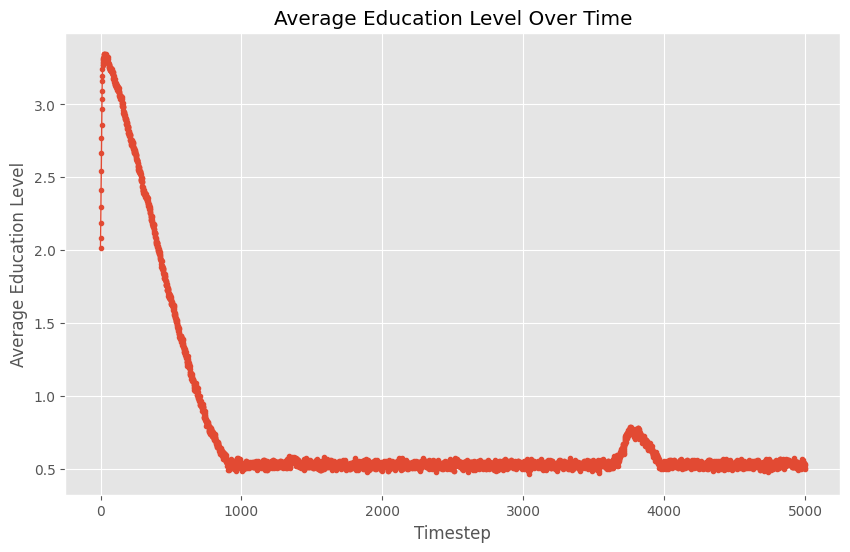

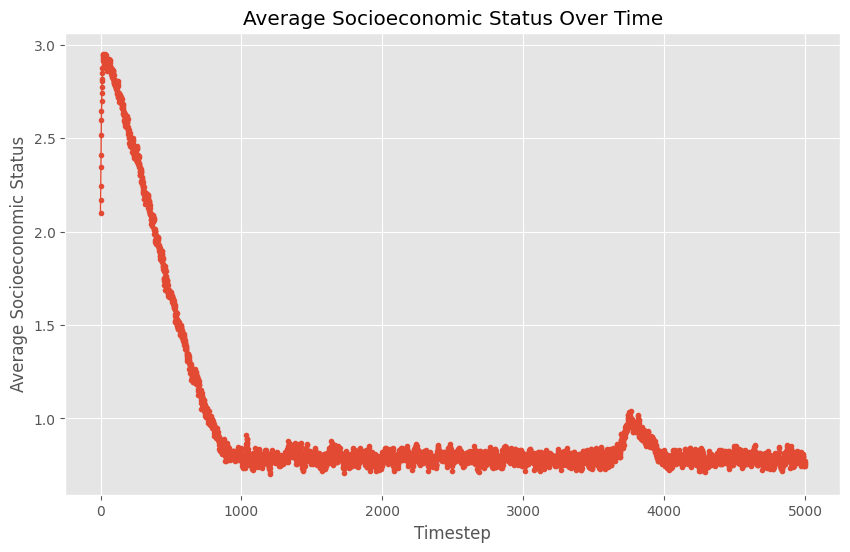

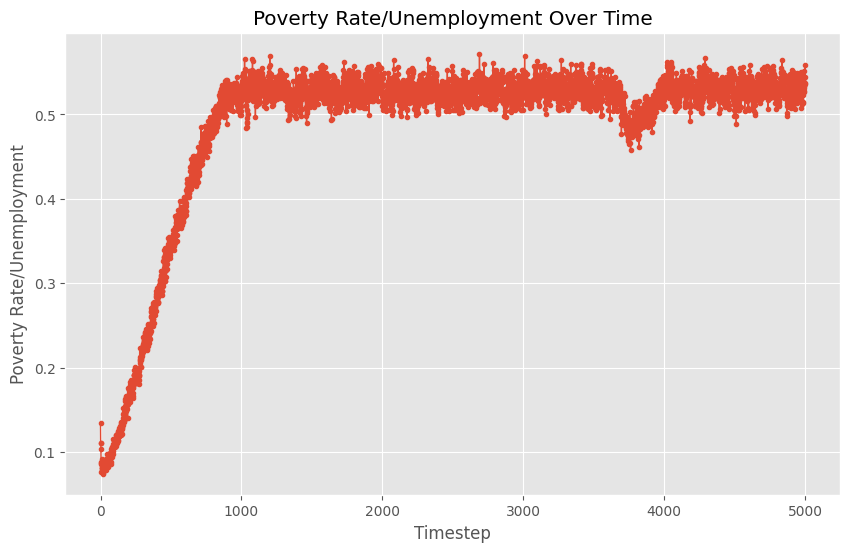

0.414695558861942


In [149]:


# Set the style
plt.style.use('ggplot')

# Function to create line plots for each metric with thinner lines and smaller markers
def plot_metric(data, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Timestep'], data[metric], marker='o', linewidth=1, markersize=3)  # Thinner line and smaller markers
    plt.title(title)
    plt.xlabel('Timestep')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Generate the plots
plot_metric(data, 'AverageEducationLevel', 'Average Education Level Over Time', 'Average Education Level')
plot_metric(data, 'AverageSocioeconomicStatus', 'Average Socioeconomic Status Over Time', 'Average Socioeconomic Status')
plot_metric(data, 'PovertyRate/Unemployed', 'Poverty Rate/Unemployment Over Time', 'Poverty Rate/Unemployment')

     # Calculate the overall variance



Education Grid Plots

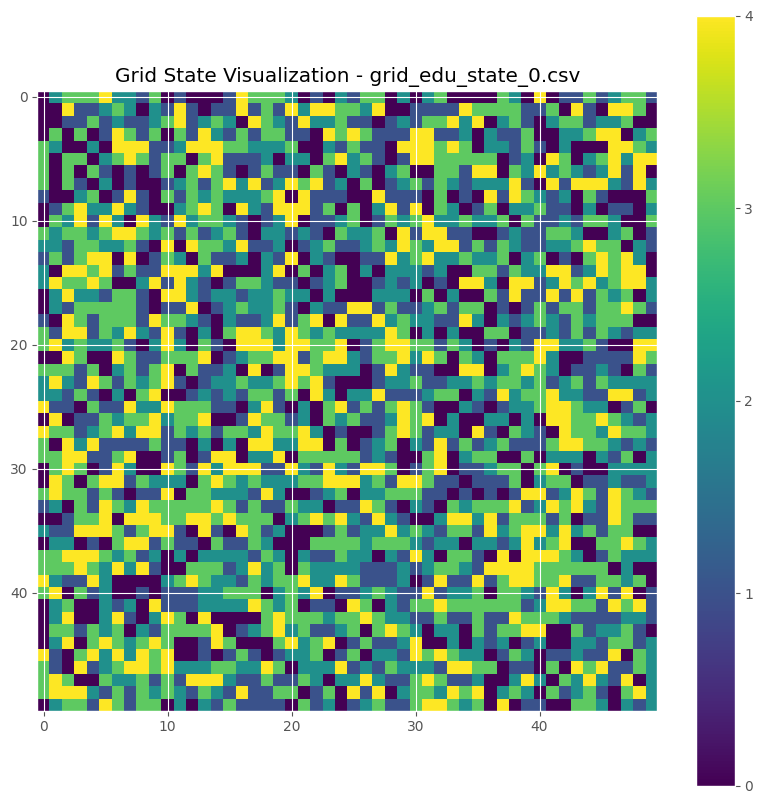

Plotted grid_edu_state_0.csv


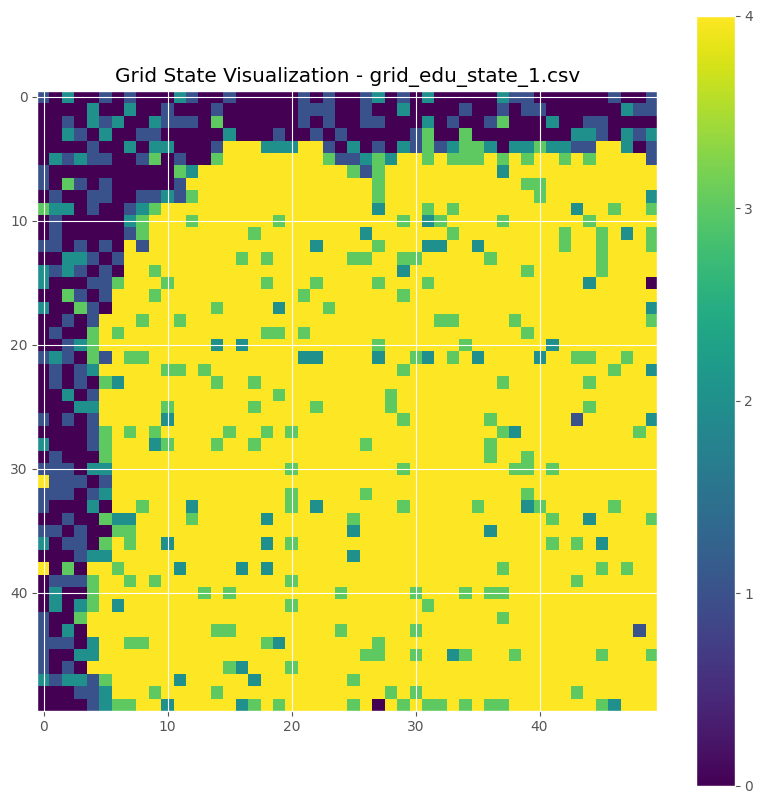

Plotted grid_edu_state_1.csv


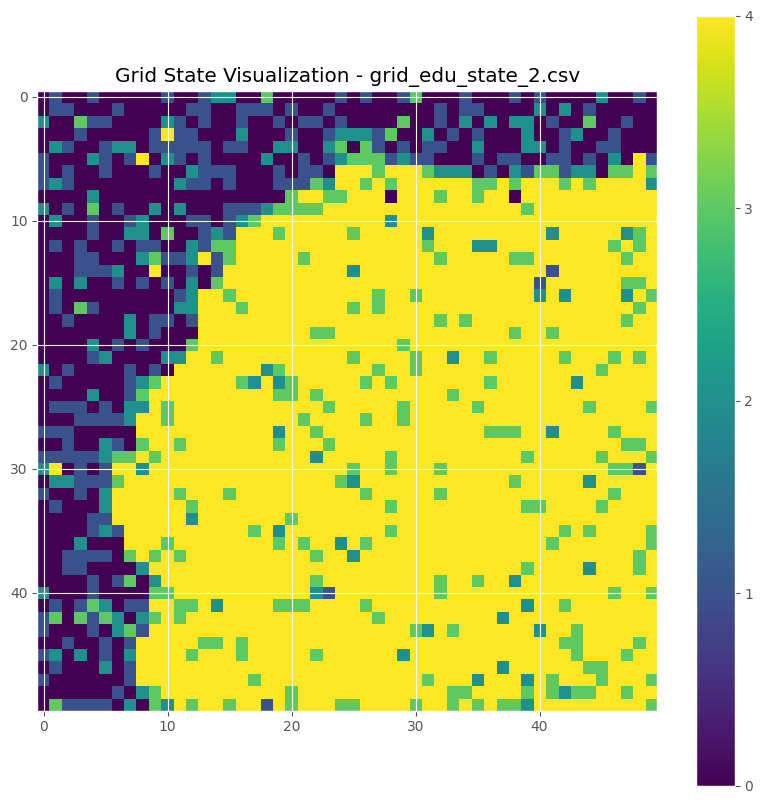

Plotted grid_edu_state_2.csv


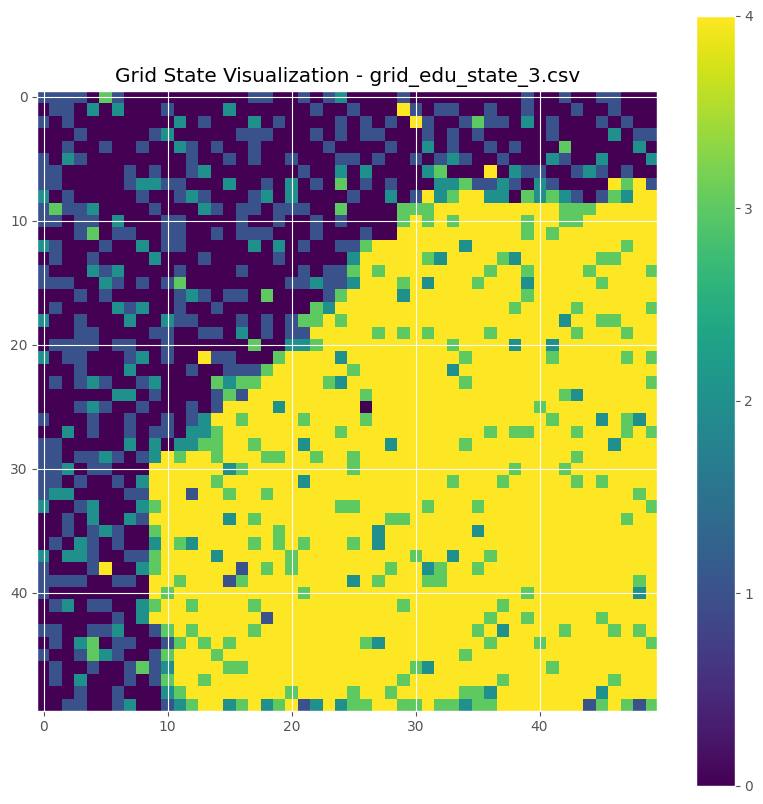

Plotted grid_edu_state_3.csv


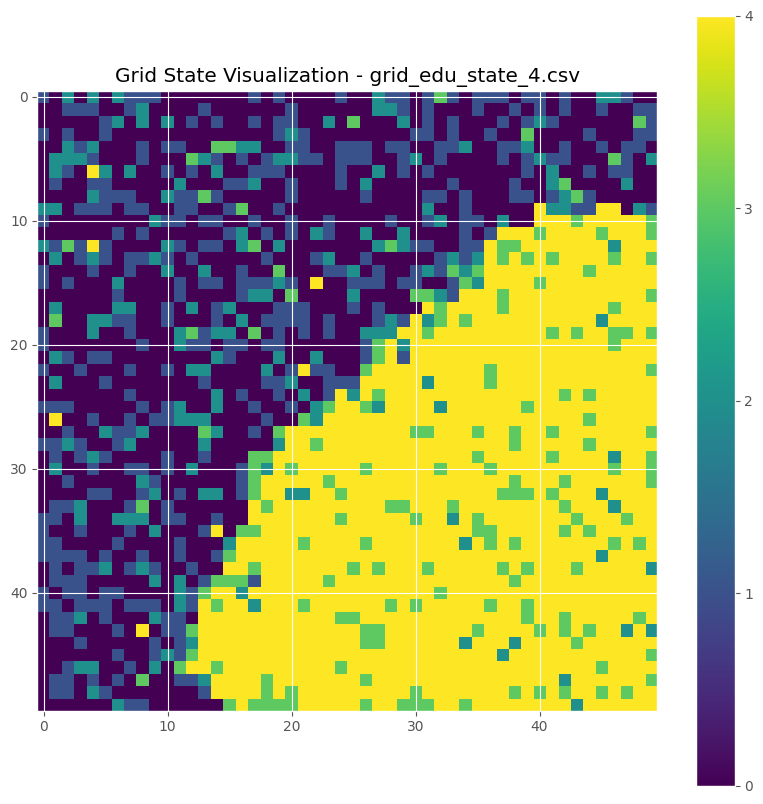

Plotted grid_edu_state_4.csv


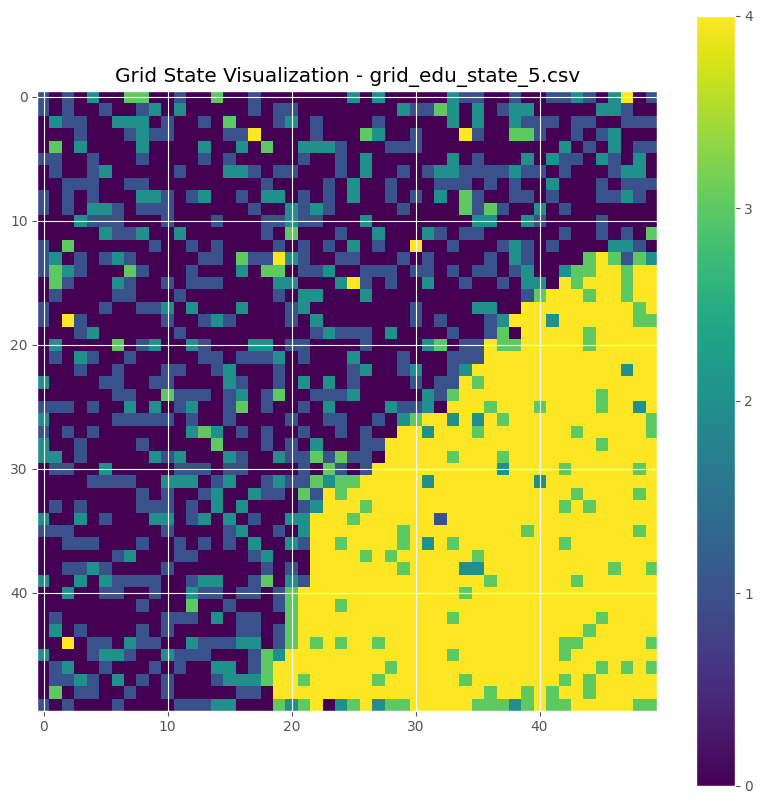

Plotted grid_edu_state_5.csv


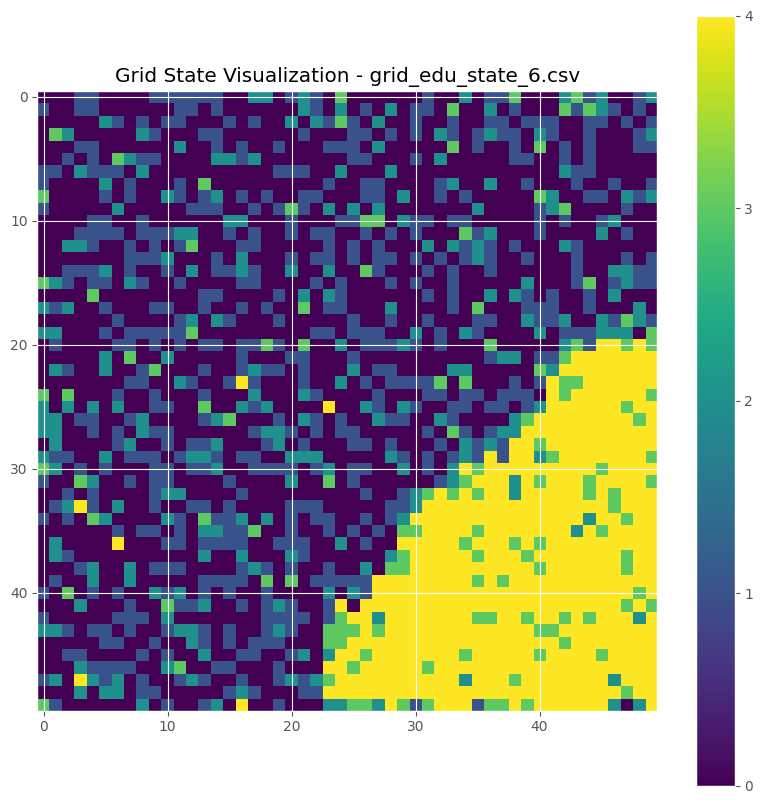

Plotted grid_edu_state_6.csv


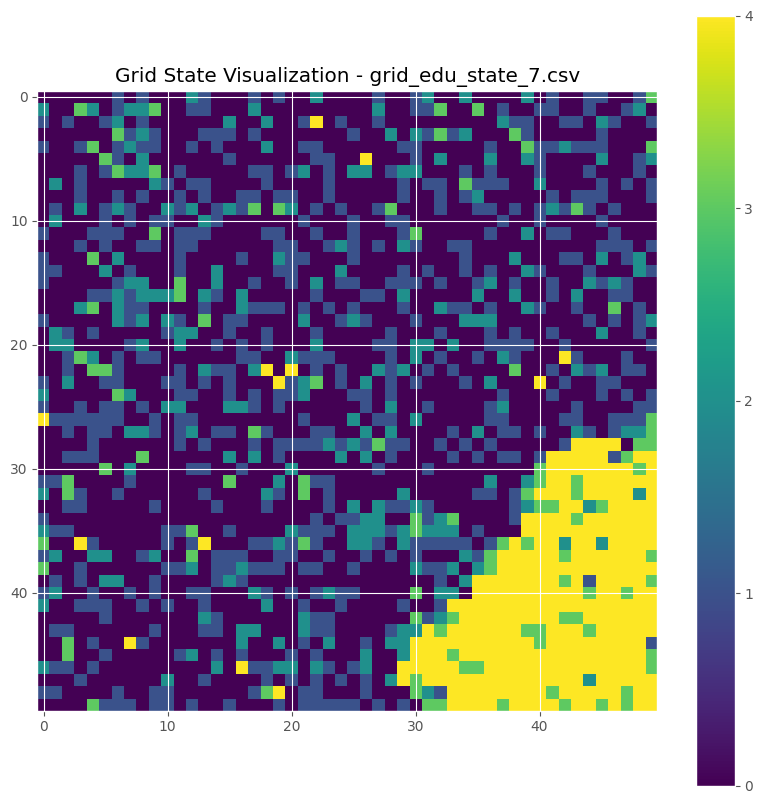

Plotted grid_edu_state_7.csv


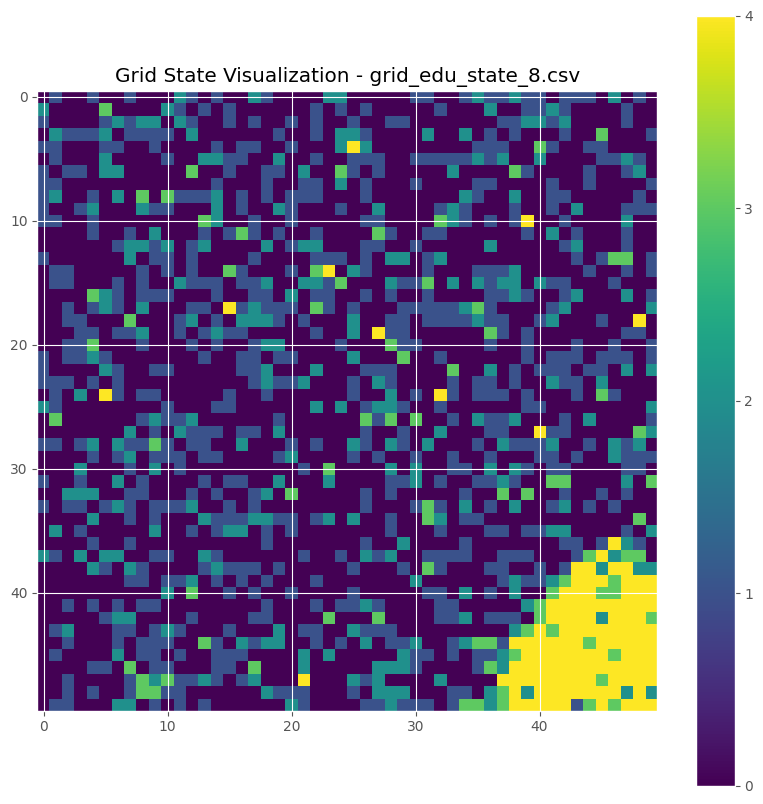

Plotted grid_edu_state_8.csv


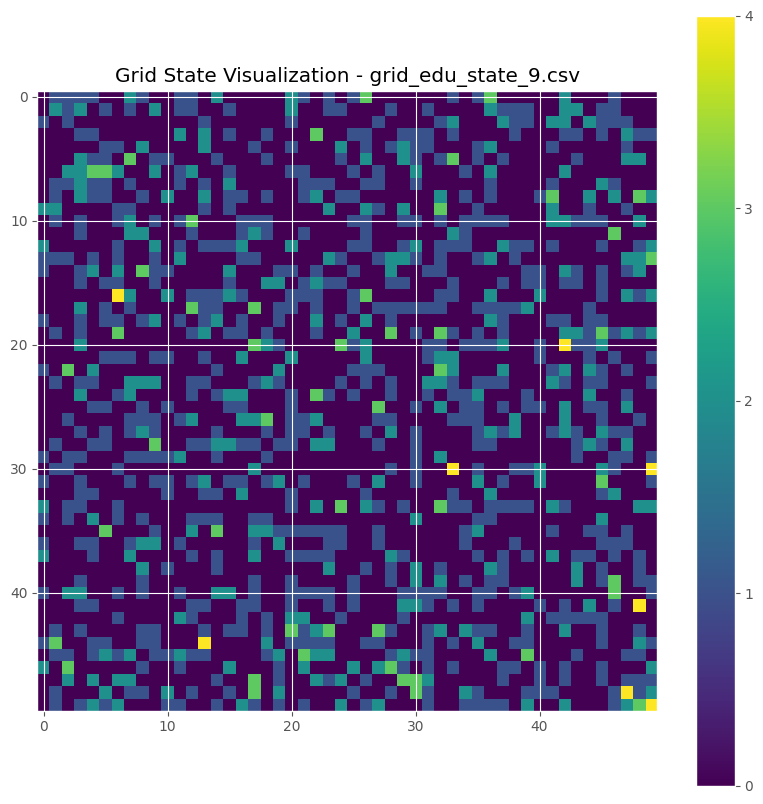

Plotted grid_edu_state_9.csv


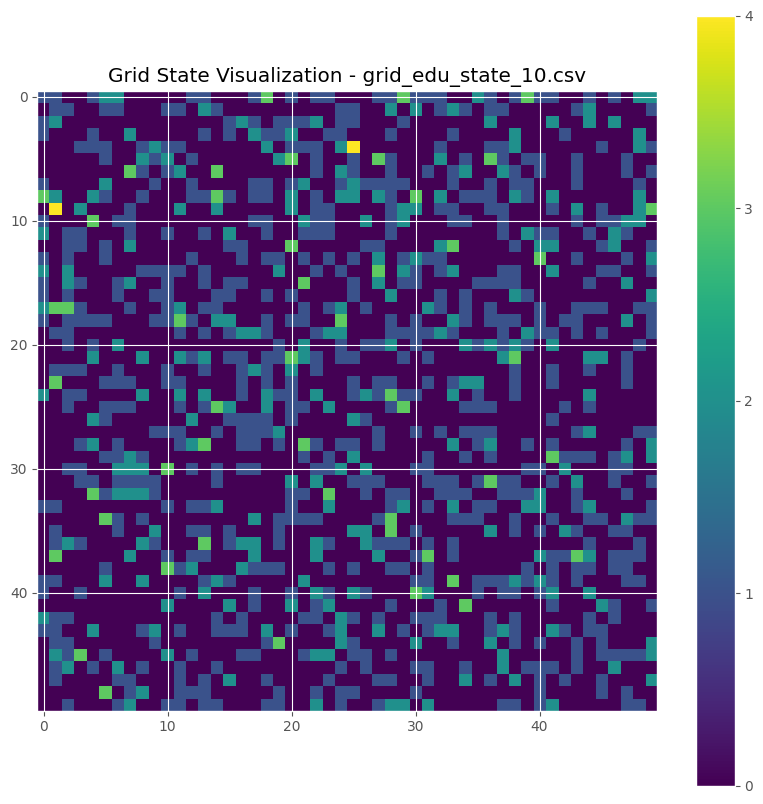

Plotted grid_edu_state_10.csv


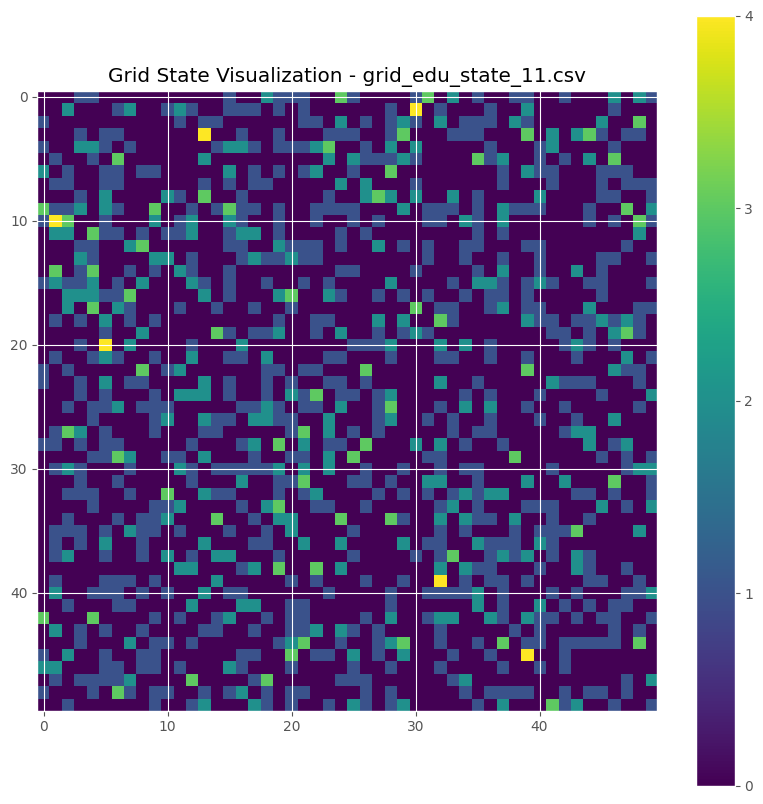

Plotted grid_edu_state_11.csv


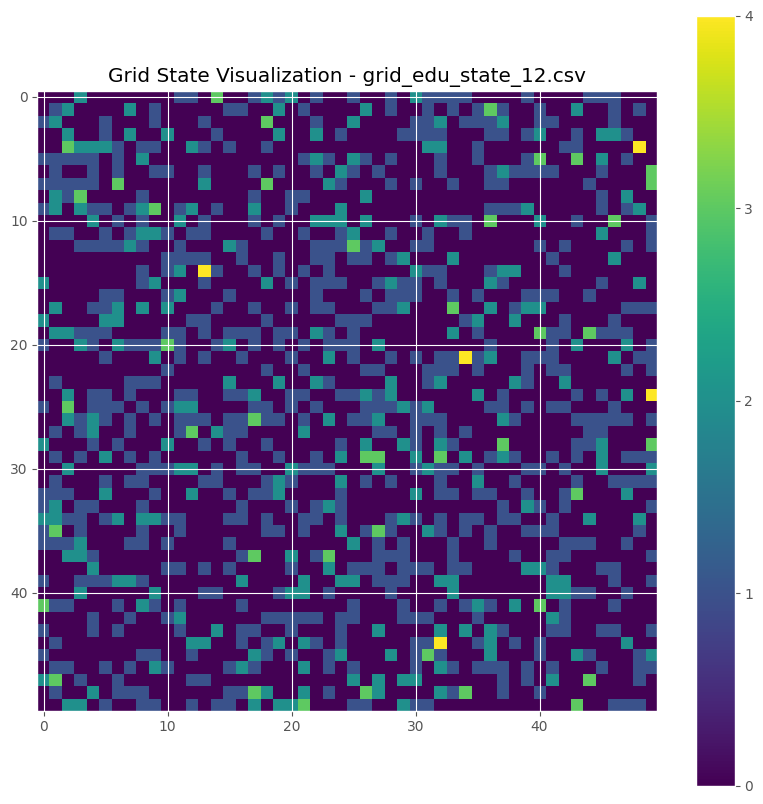

Plotted grid_edu_state_12.csv


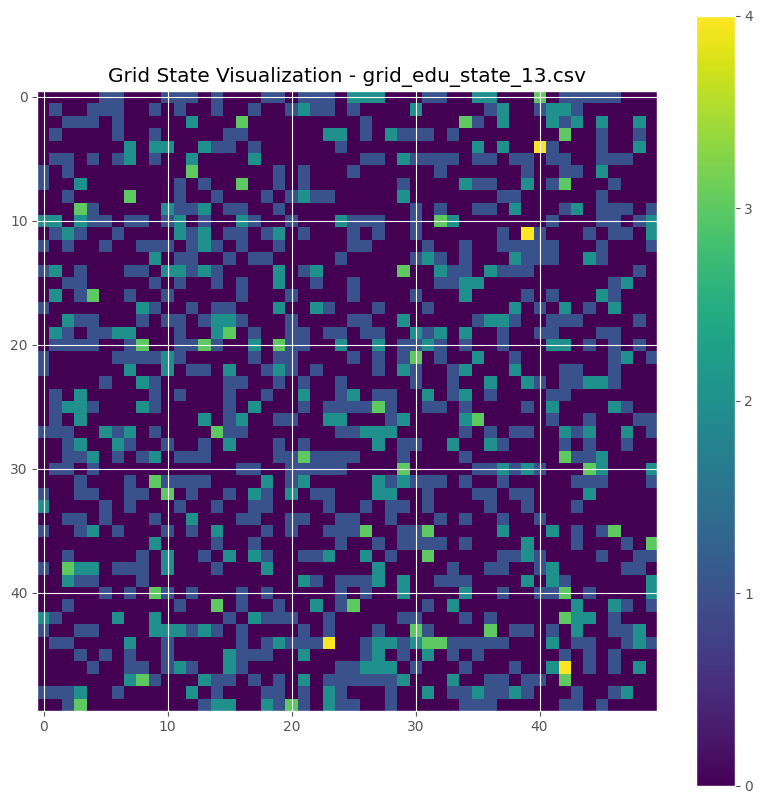

Plotted grid_edu_state_13.csv


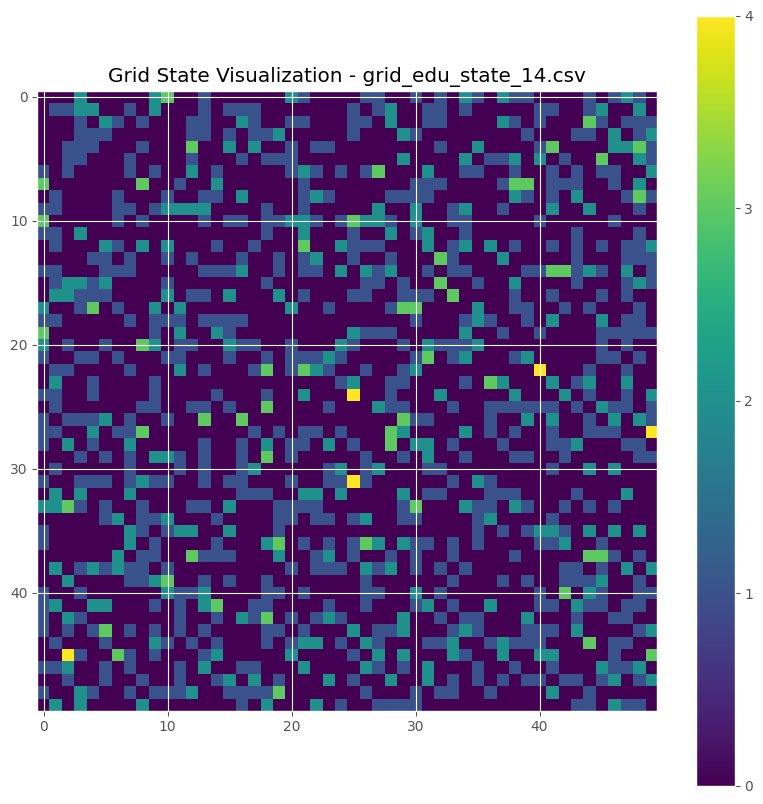

Plotted grid_edu_state_14.csv


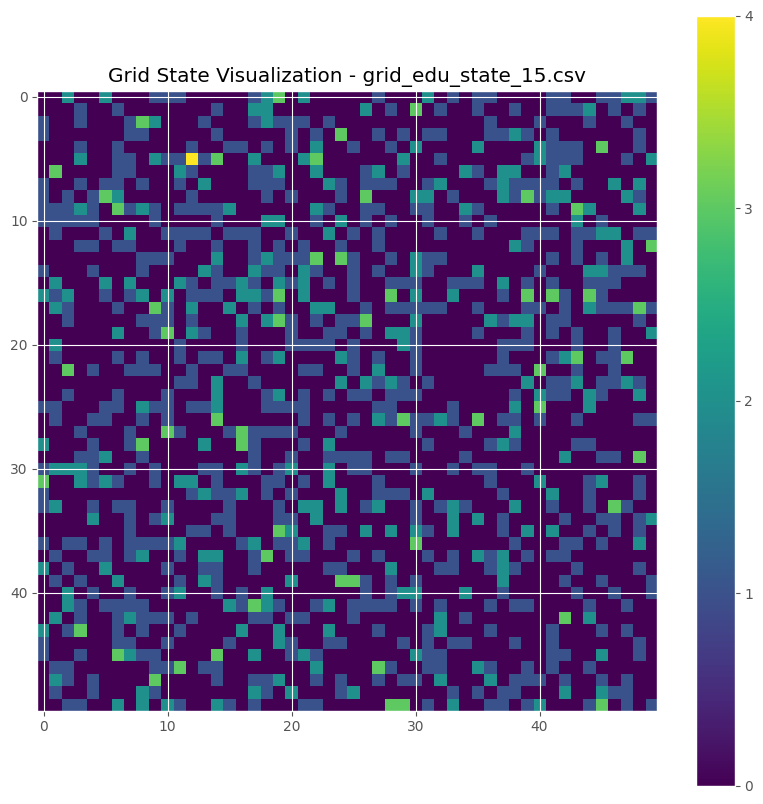

Plotted grid_edu_state_15.csv


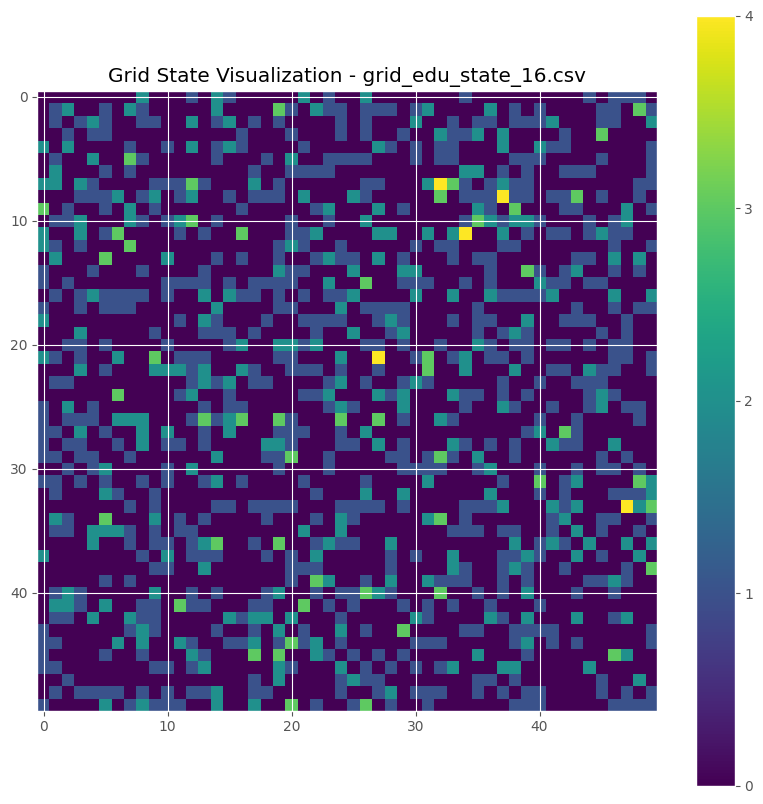

Plotted grid_edu_state_16.csv


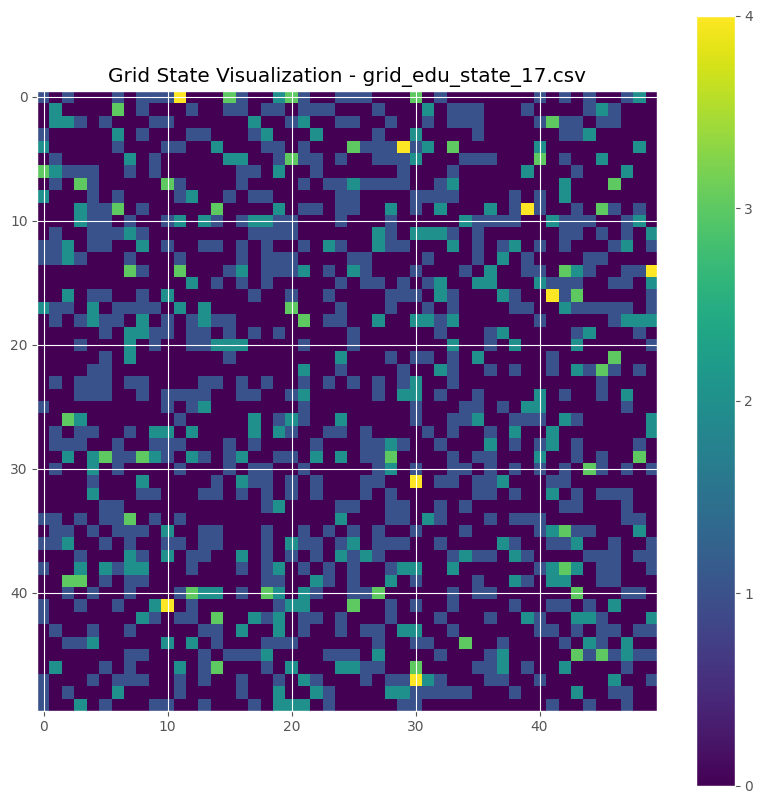

Plotted grid_edu_state_17.csv


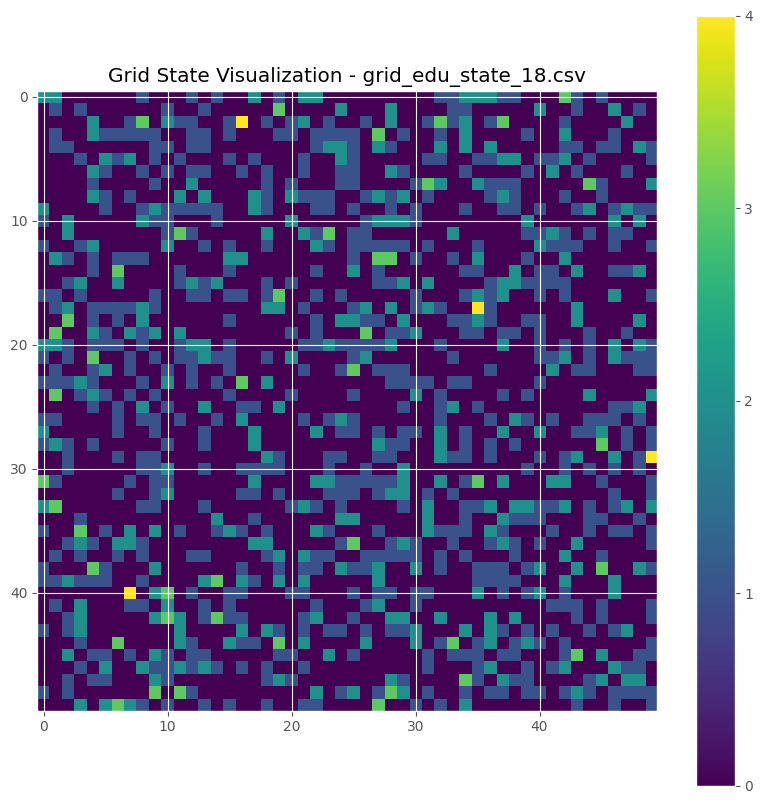

Plotted grid_edu_state_18.csv


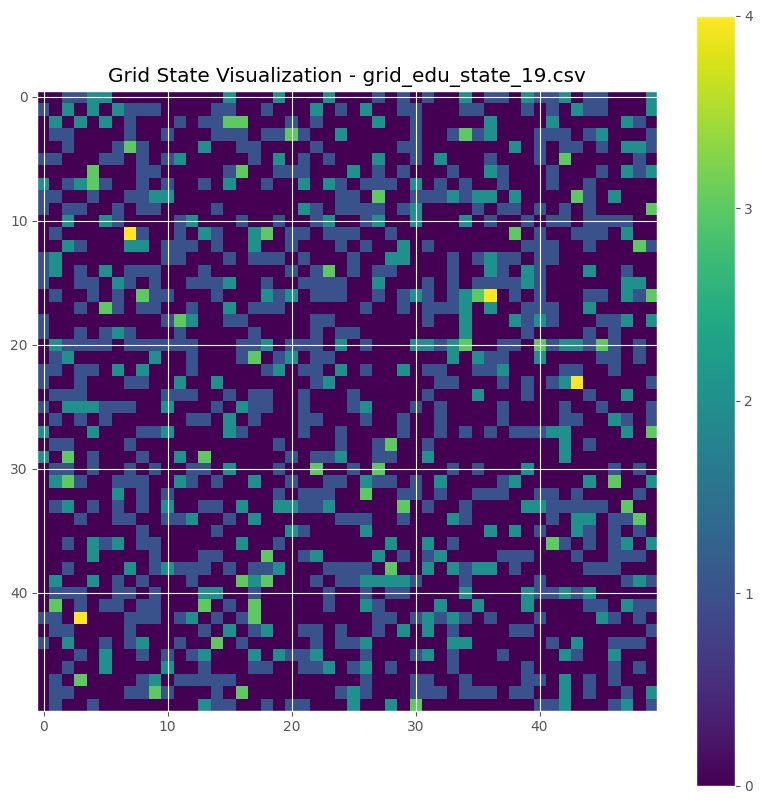

Plotted grid_edu_state_19.csv


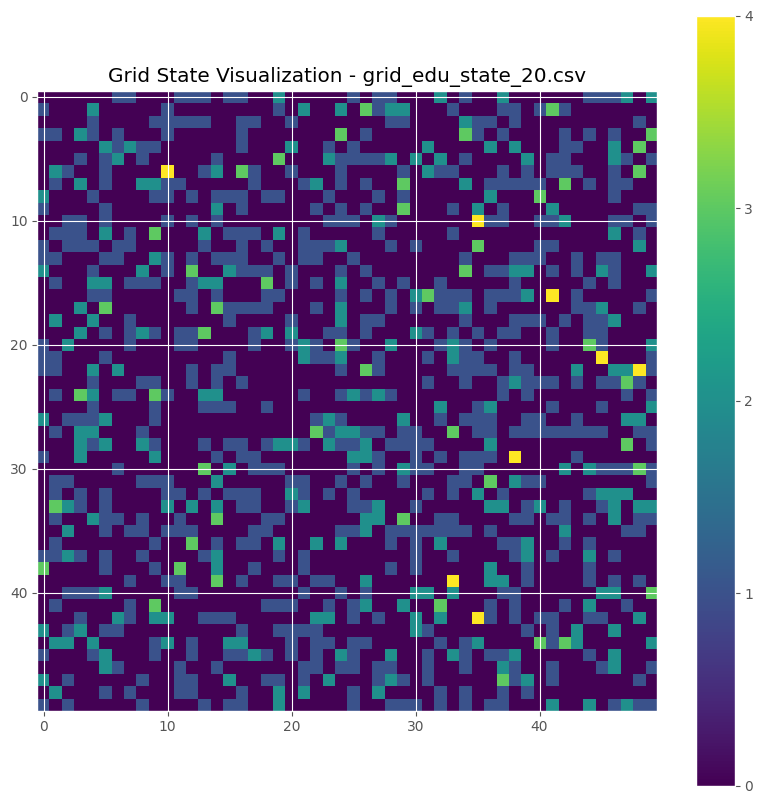

Plotted grid_edu_state_20.csv


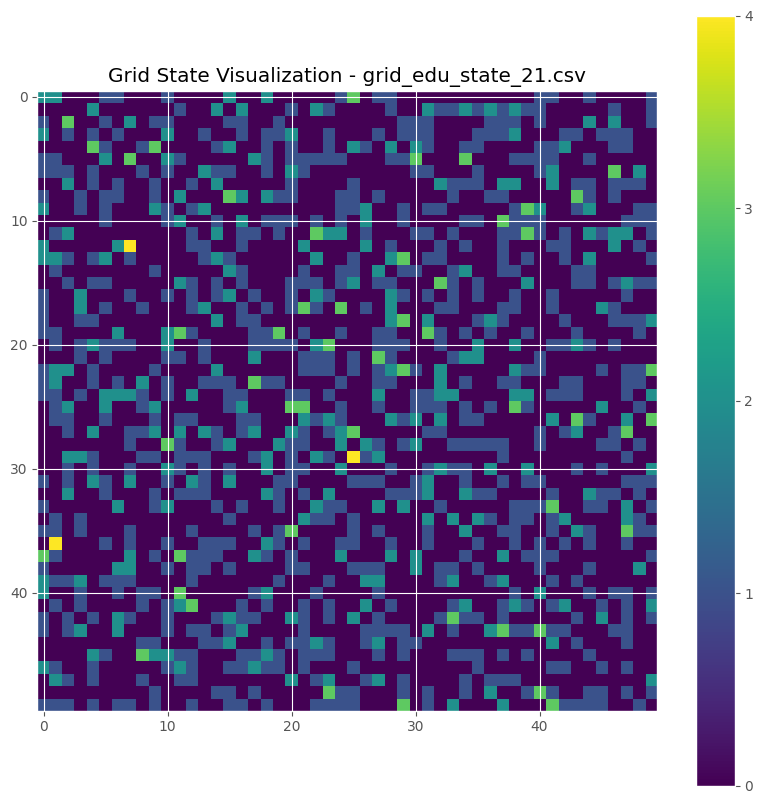

Plotted grid_edu_state_21.csv


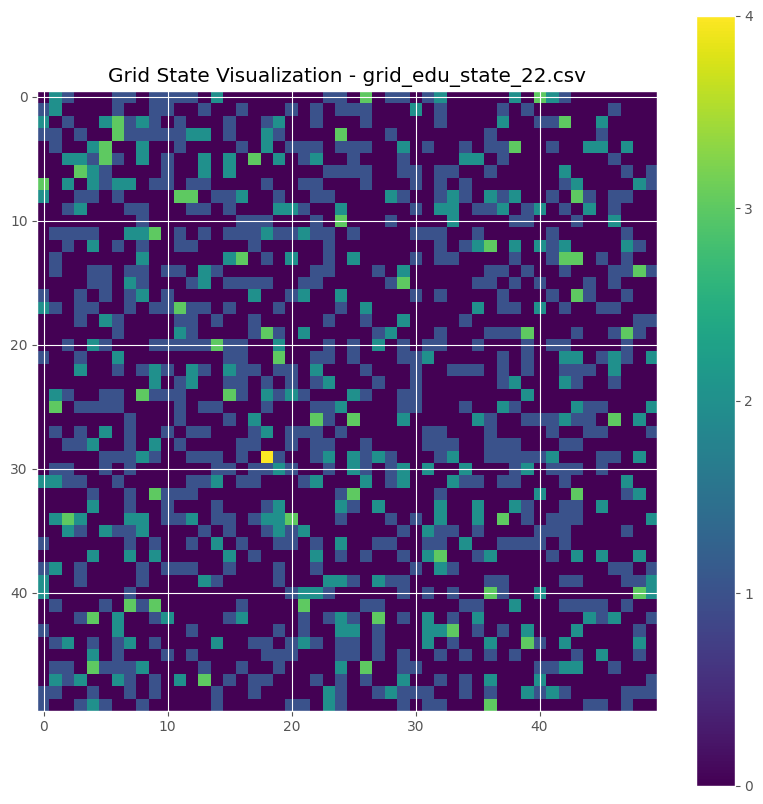

Plotted grid_edu_state_22.csv


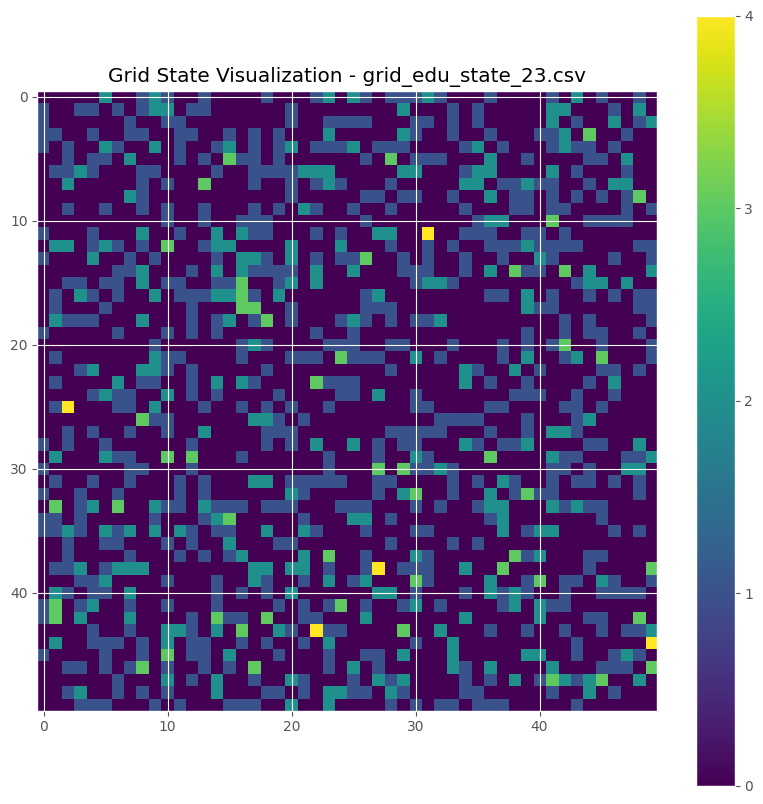

Plotted grid_edu_state_23.csv


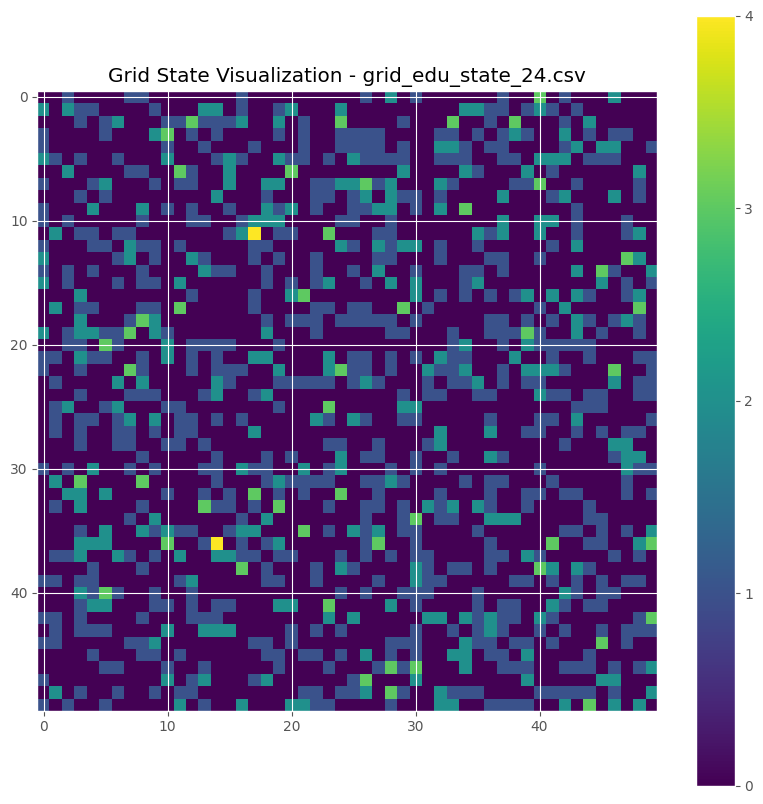

Plotted grid_edu_state_24.csv


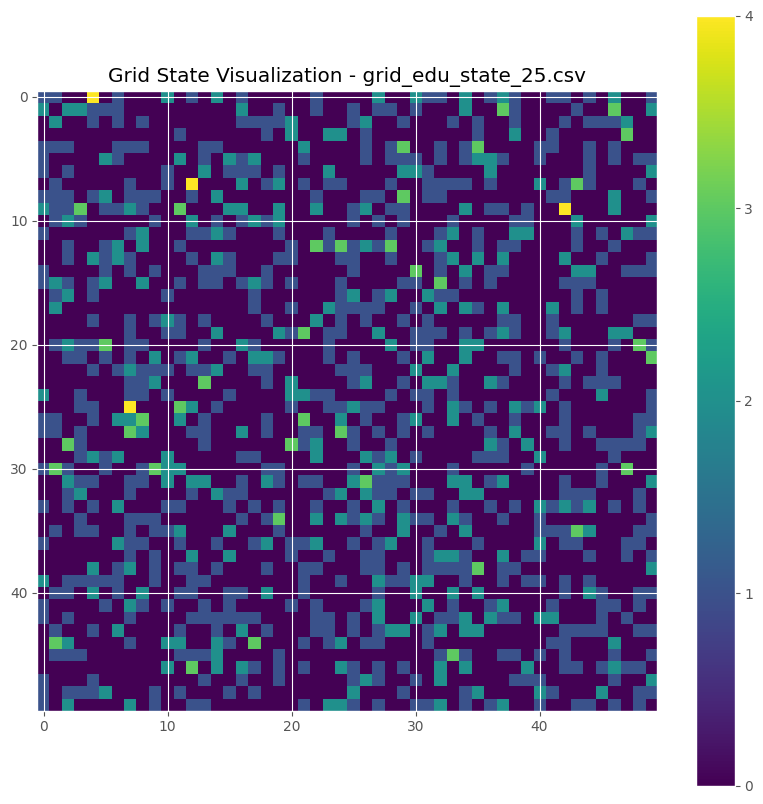

Plotted grid_edu_state_25.csv


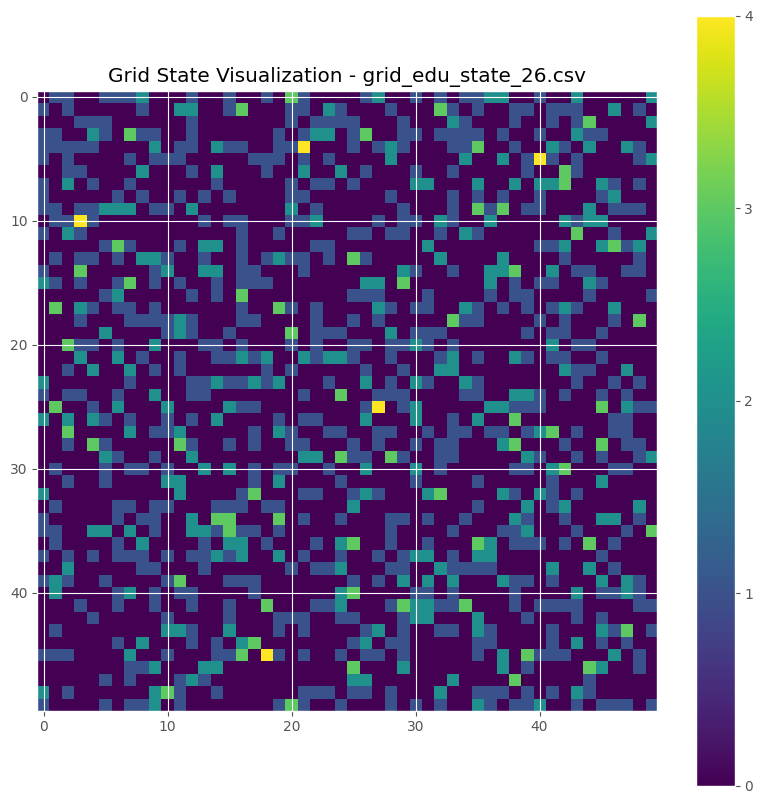

Plotted grid_edu_state_26.csv


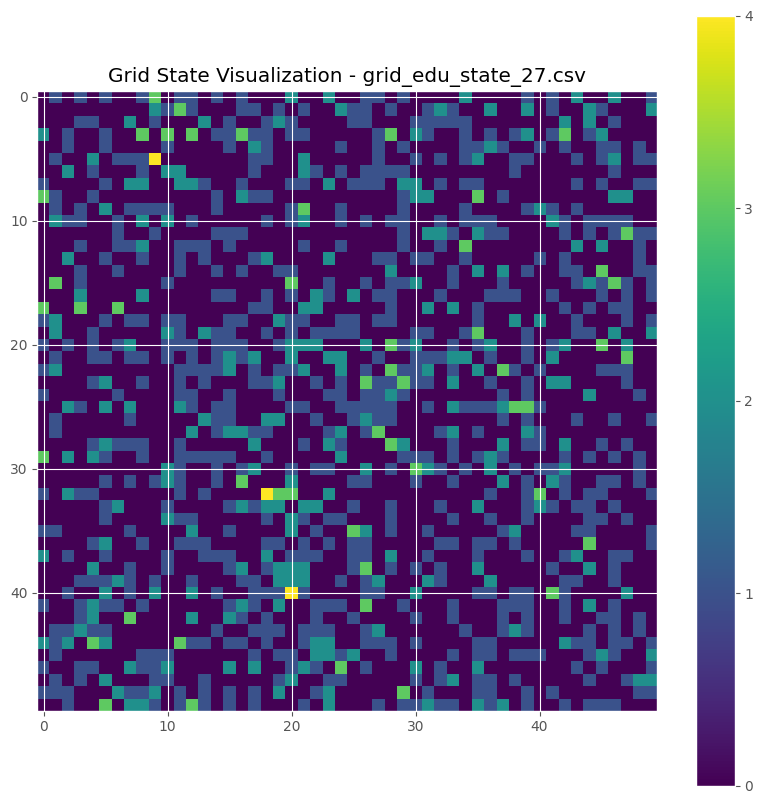

Plotted grid_edu_state_27.csv


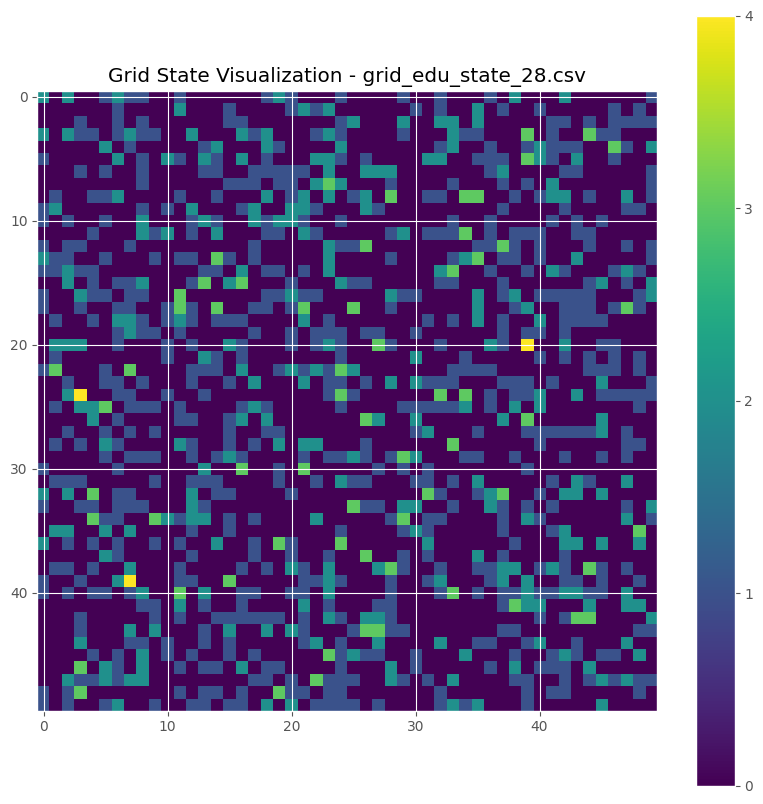

Plotted grid_edu_state_28.csv


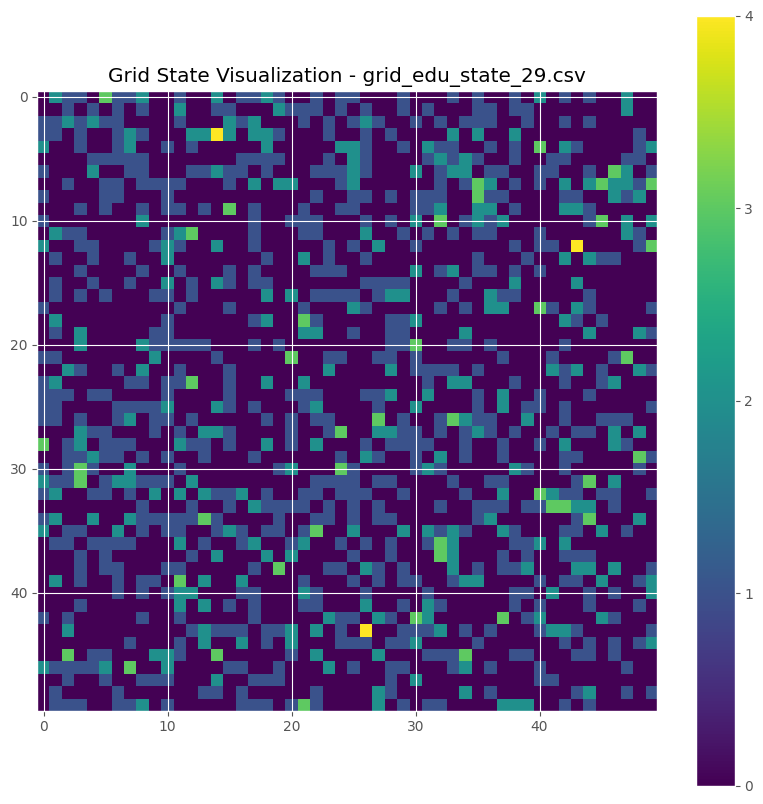

Plotted grid_edu_state_29.csv


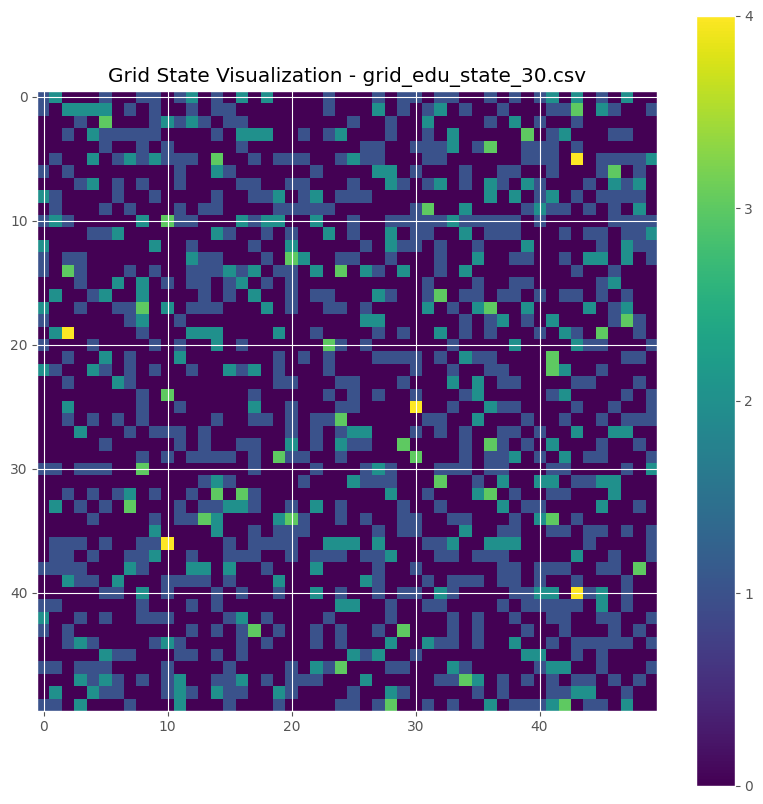

Plotted grid_edu_state_30.csv


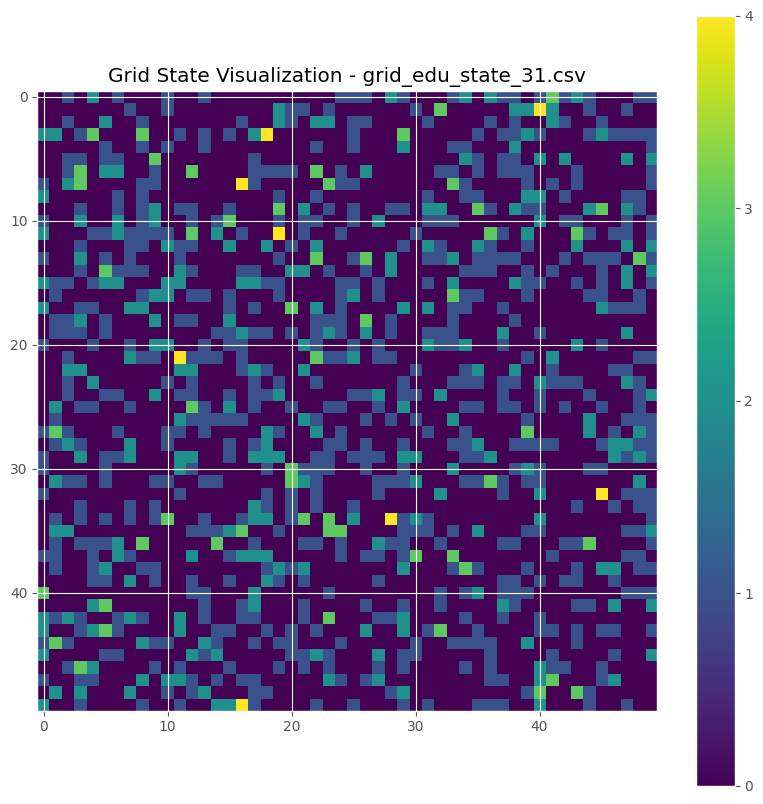

Plotted grid_edu_state_31.csv


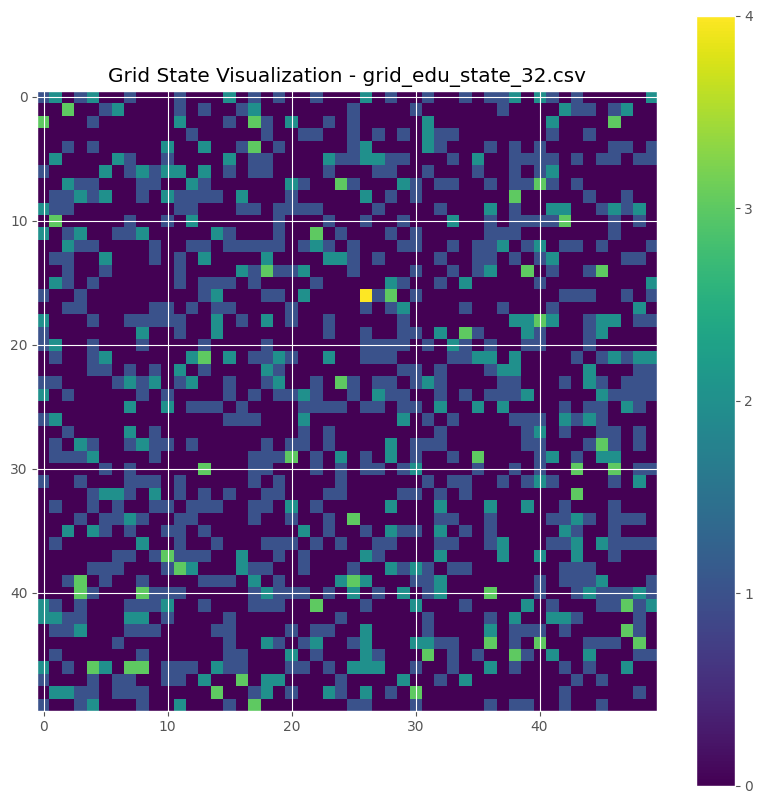

Plotted grid_edu_state_32.csv


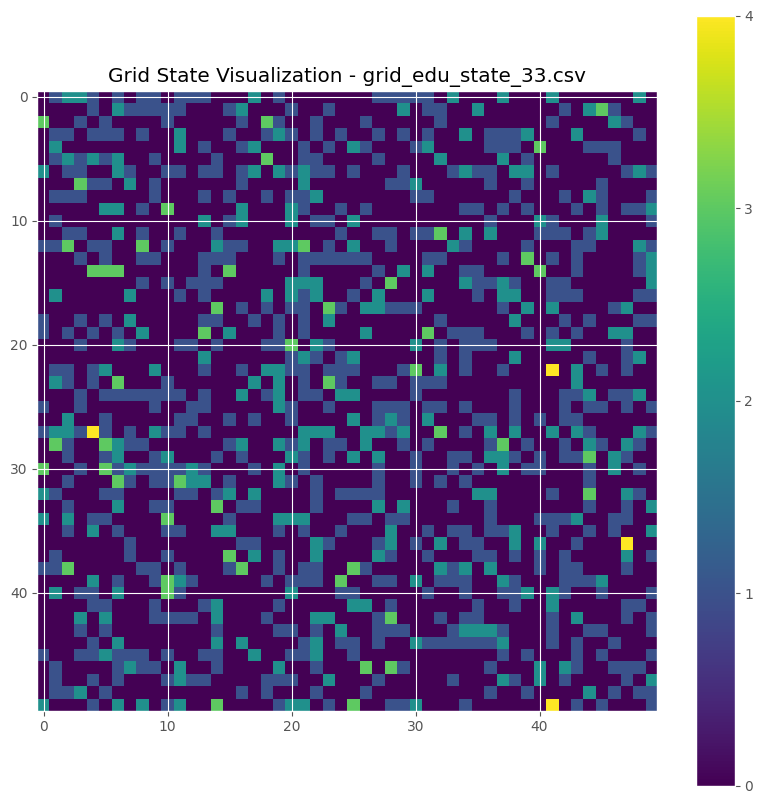

Plotted grid_edu_state_33.csv


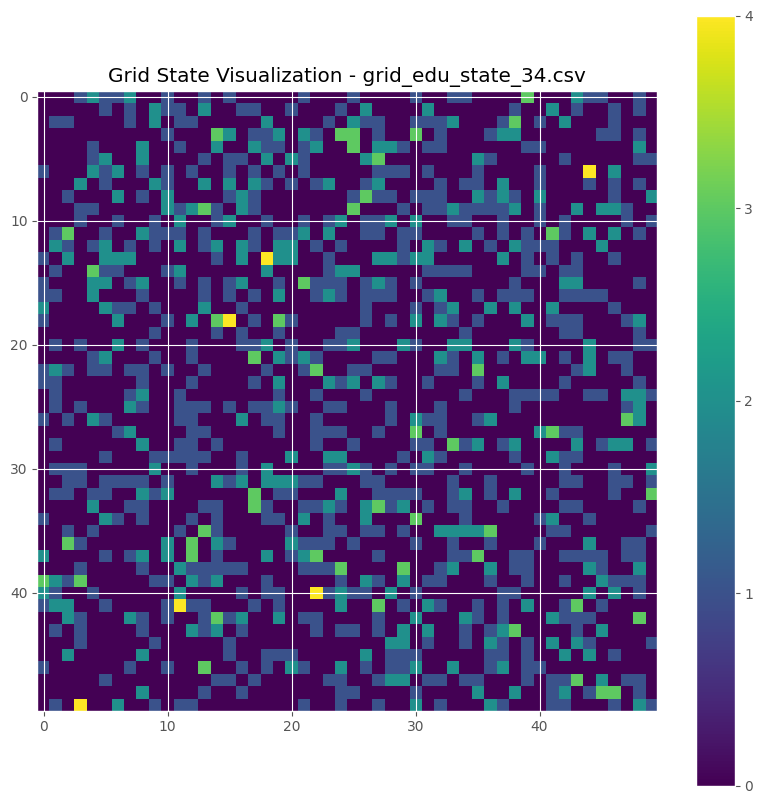

Plotted grid_edu_state_34.csv


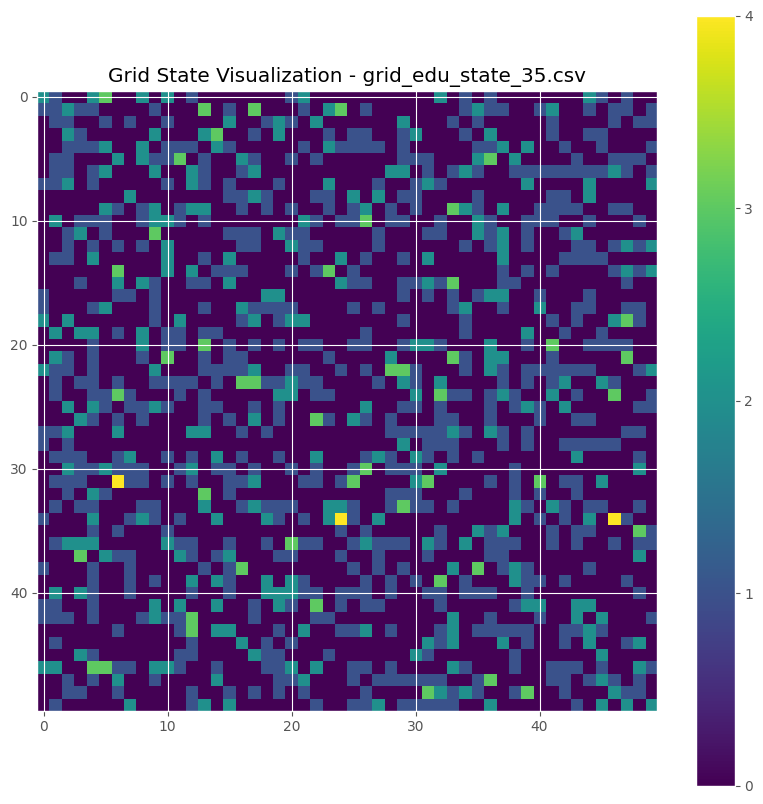

Plotted grid_edu_state_35.csv


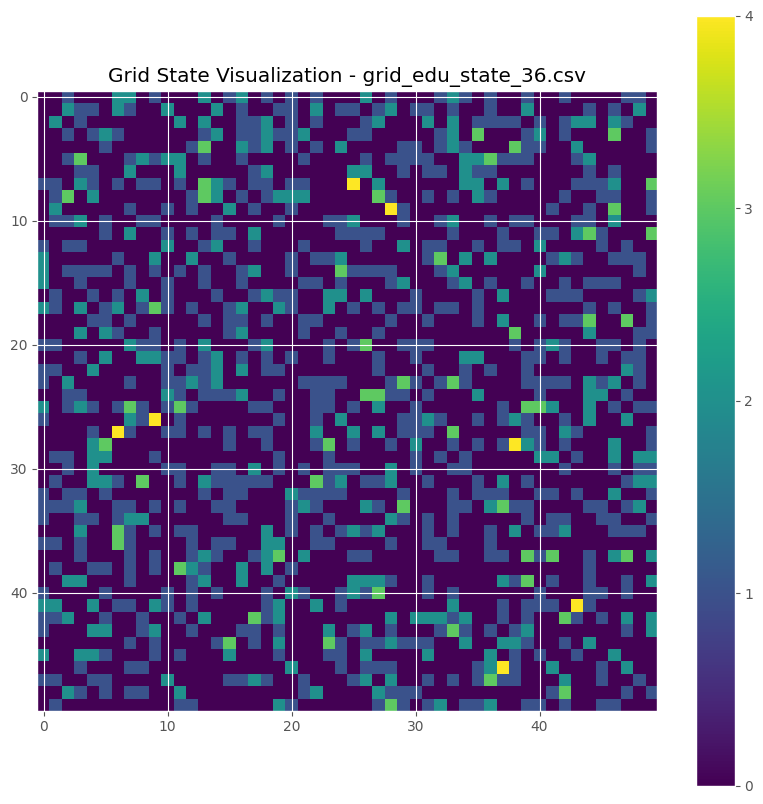

Plotted grid_edu_state_36.csv


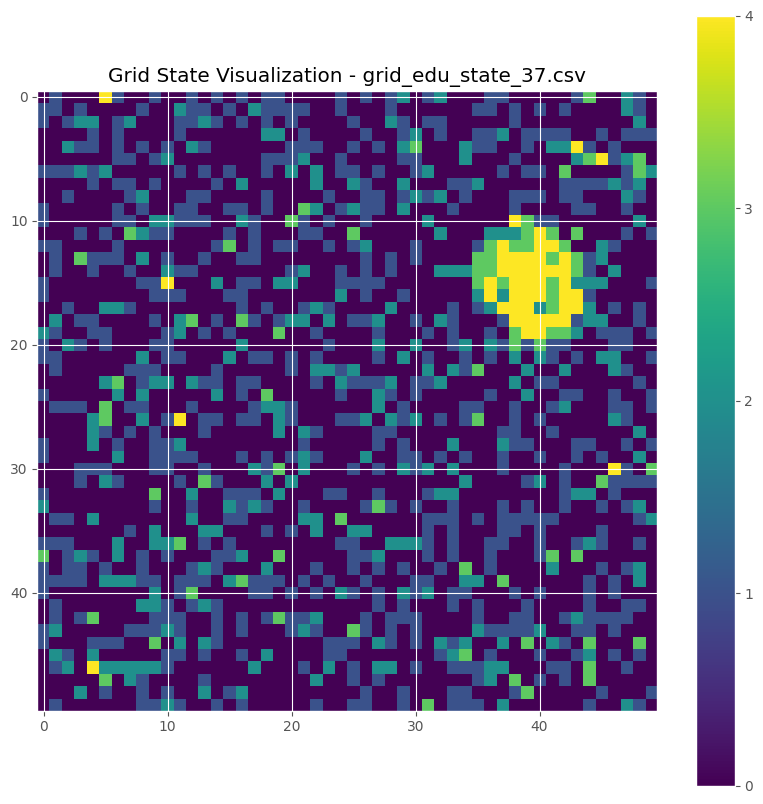

Plotted grid_edu_state_37.csv


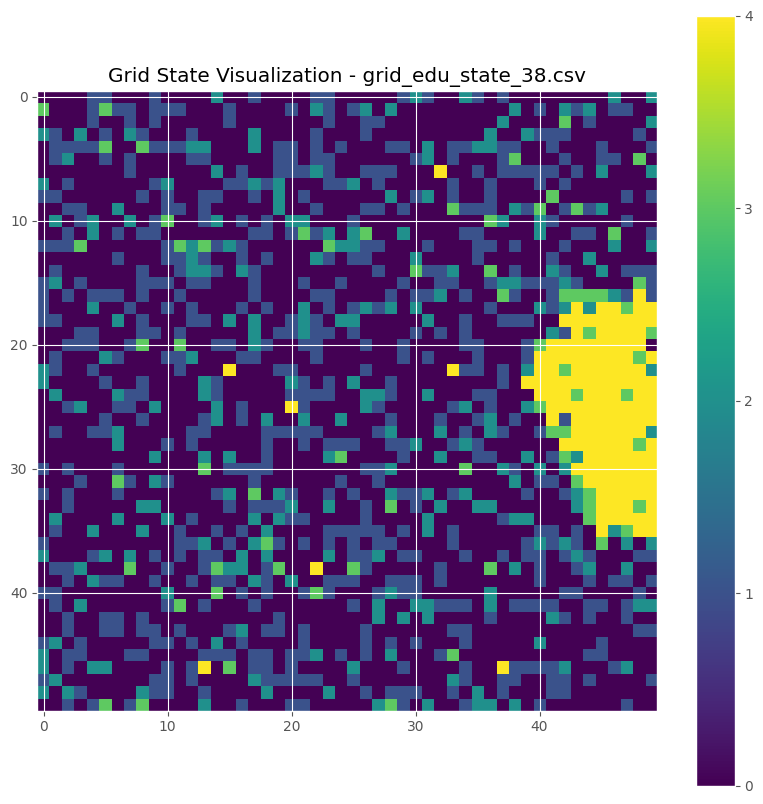

Plotted grid_edu_state_38.csv


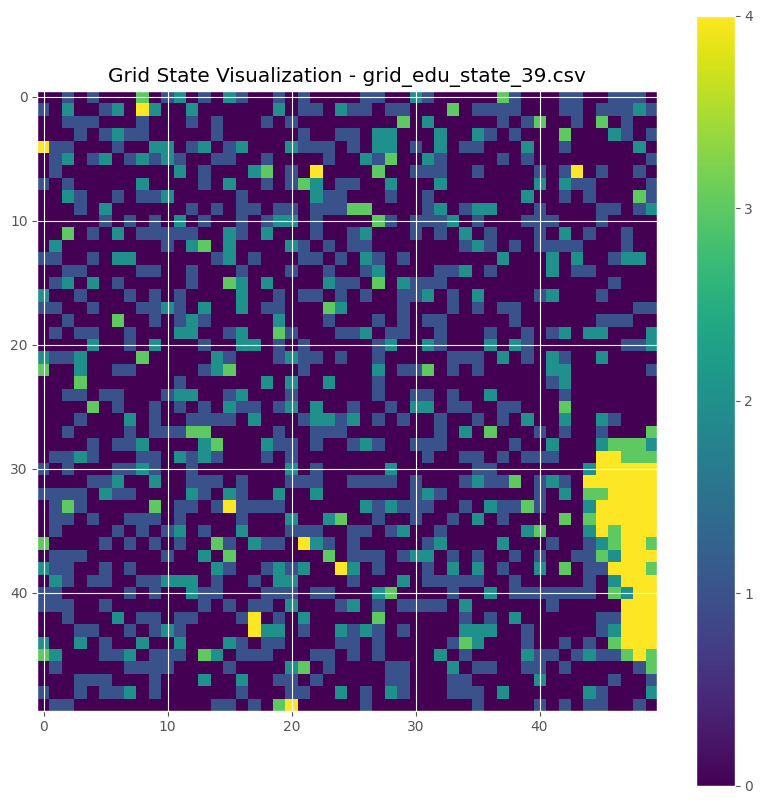

Plotted grid_edu_state_39.csv


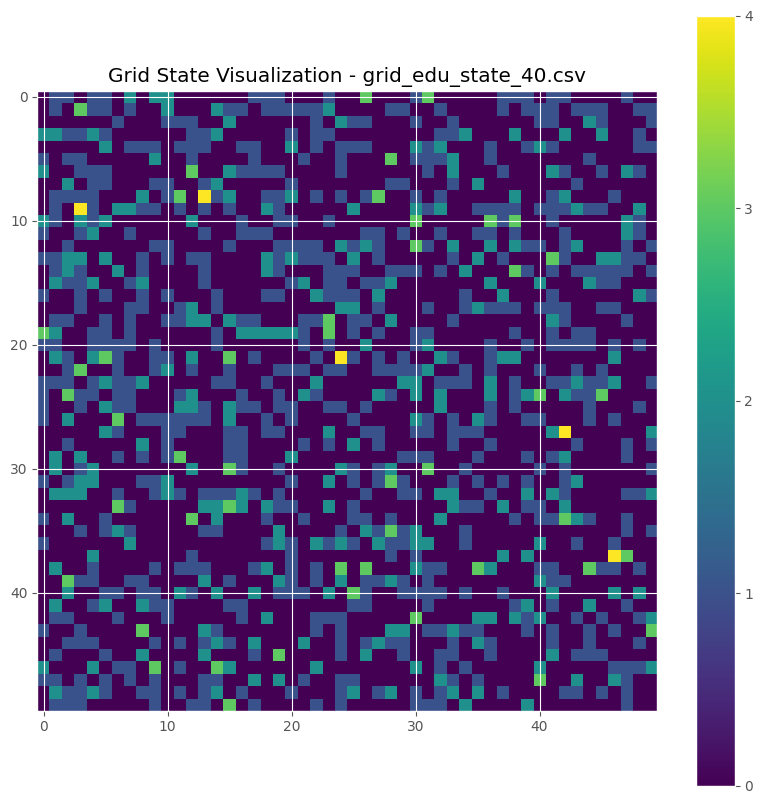

Plotted grid_edu_state_40.csv


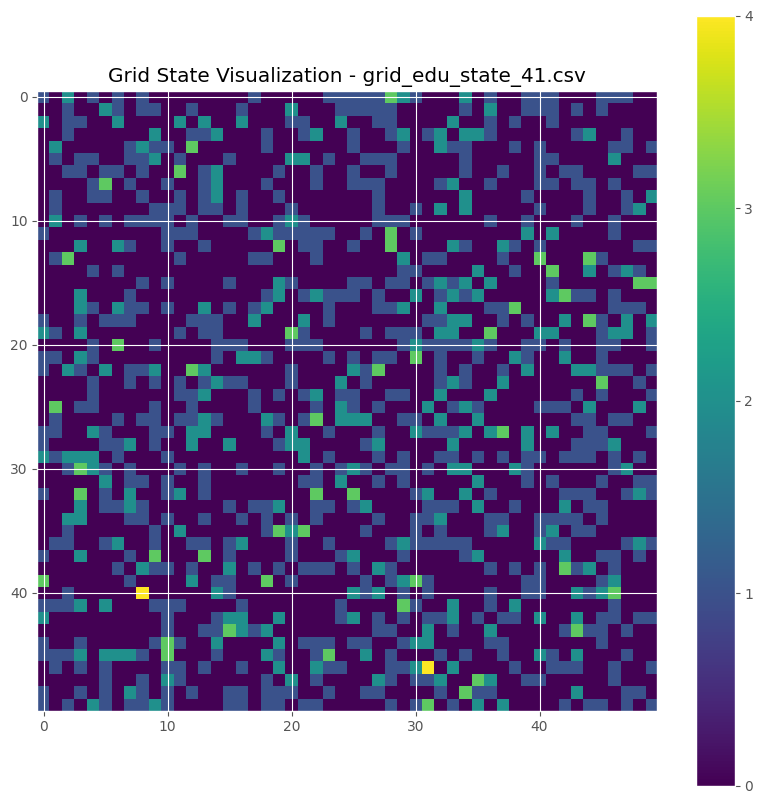

Plotted grid_edu_state_41.csv


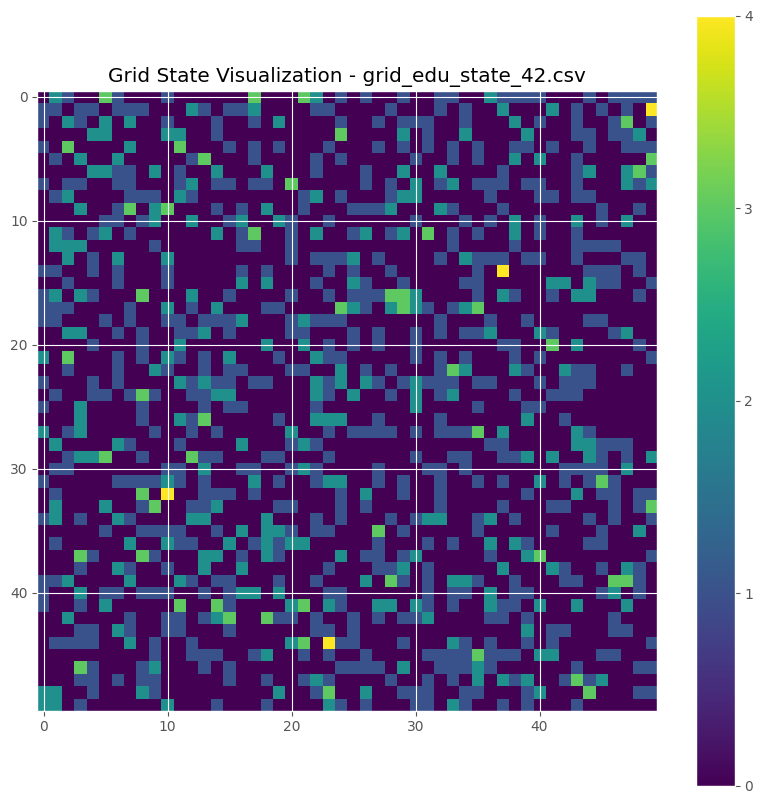

Plotted grid_edu_state_42.csv


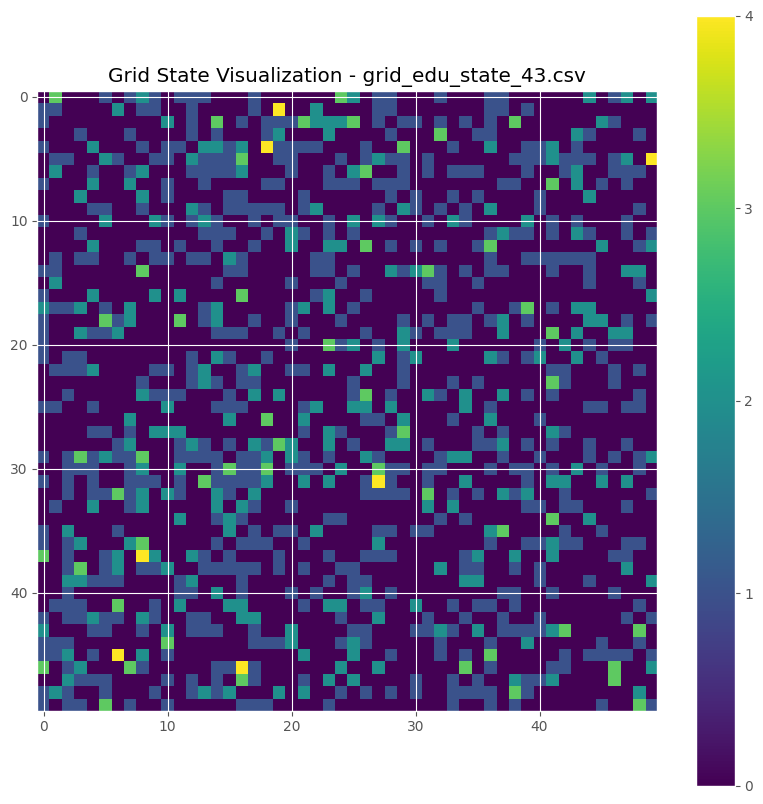

Plotted grid_edu_state_43.csv


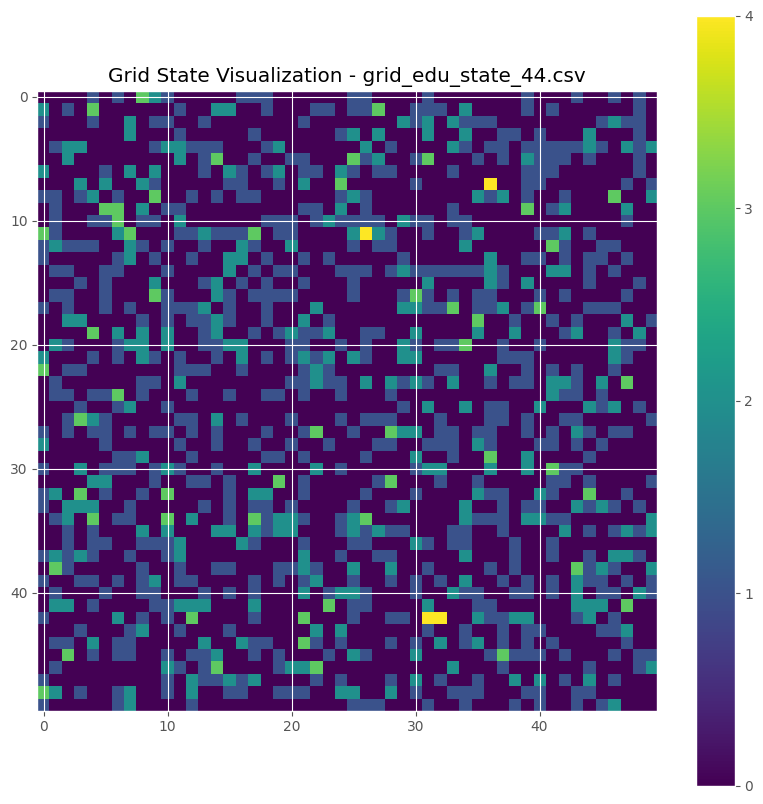

Plotted grid_edu_state_44.csv


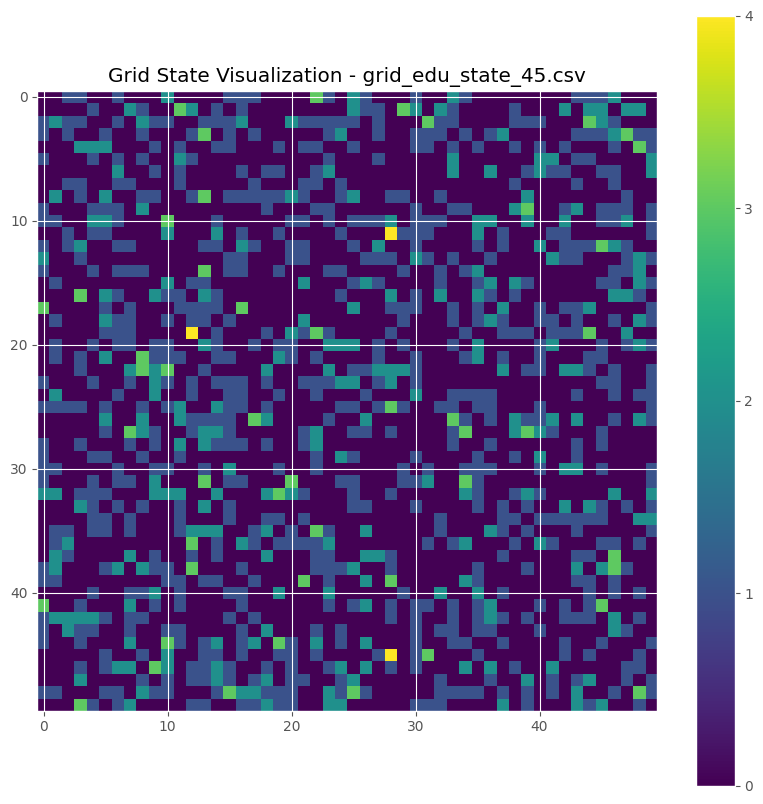

Plotted grid_edu_state_45.csv


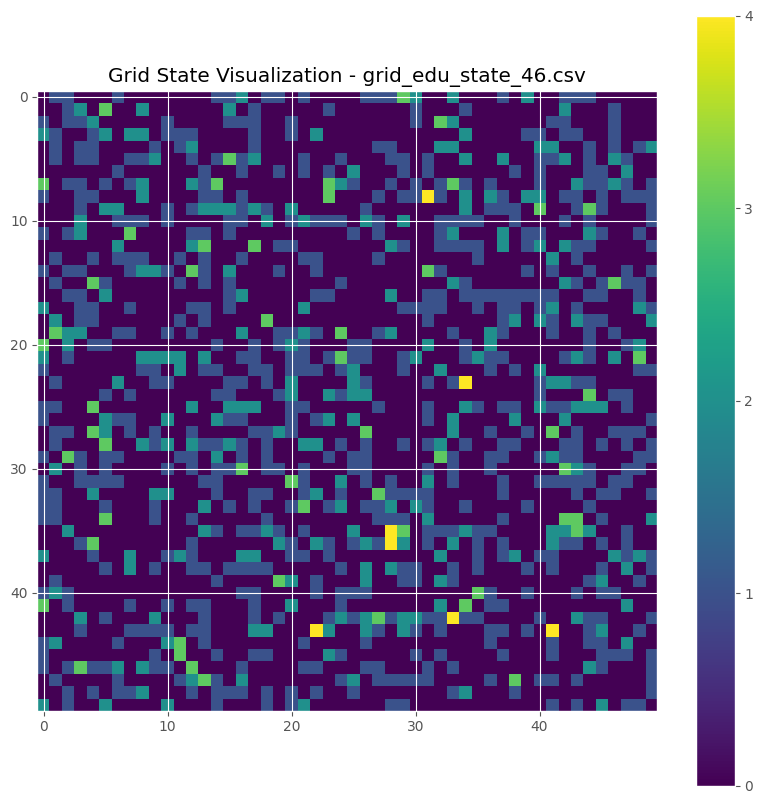

Plotted grid_edu_state_46.csv


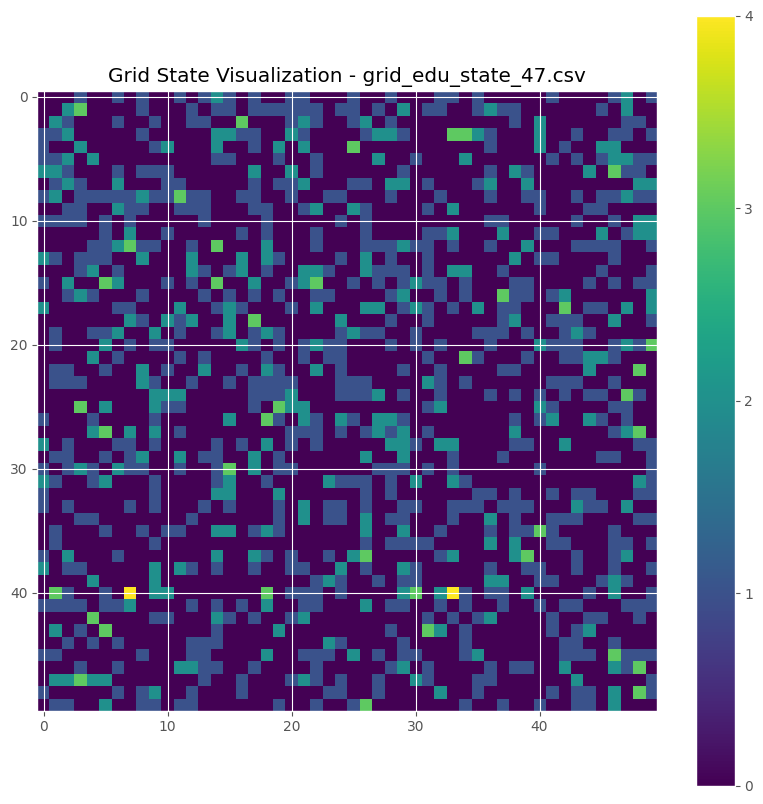

Plotted grid_edu_state_47.csv


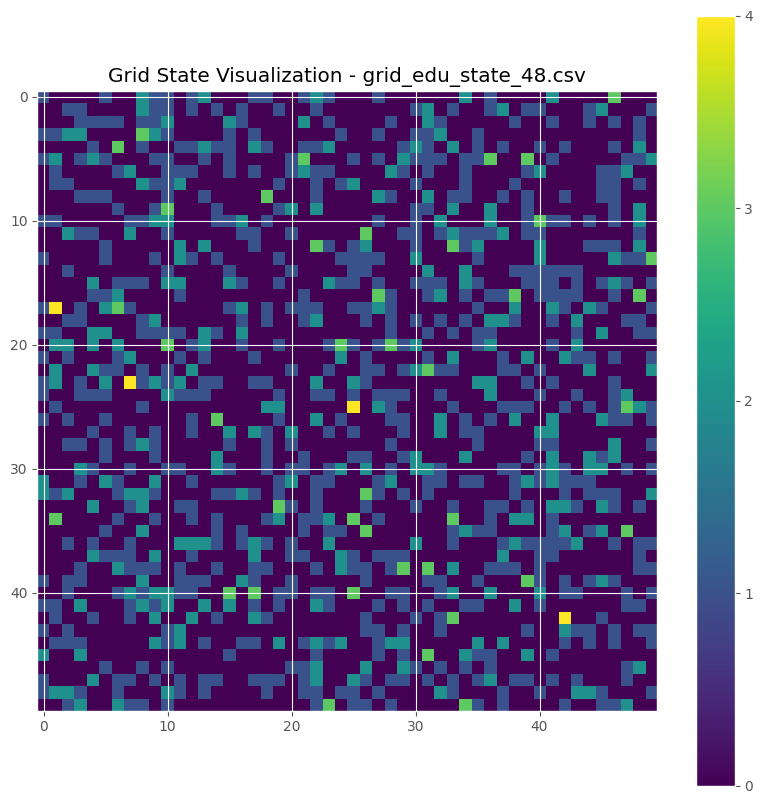

Plotted grid_edu_state_48.csv


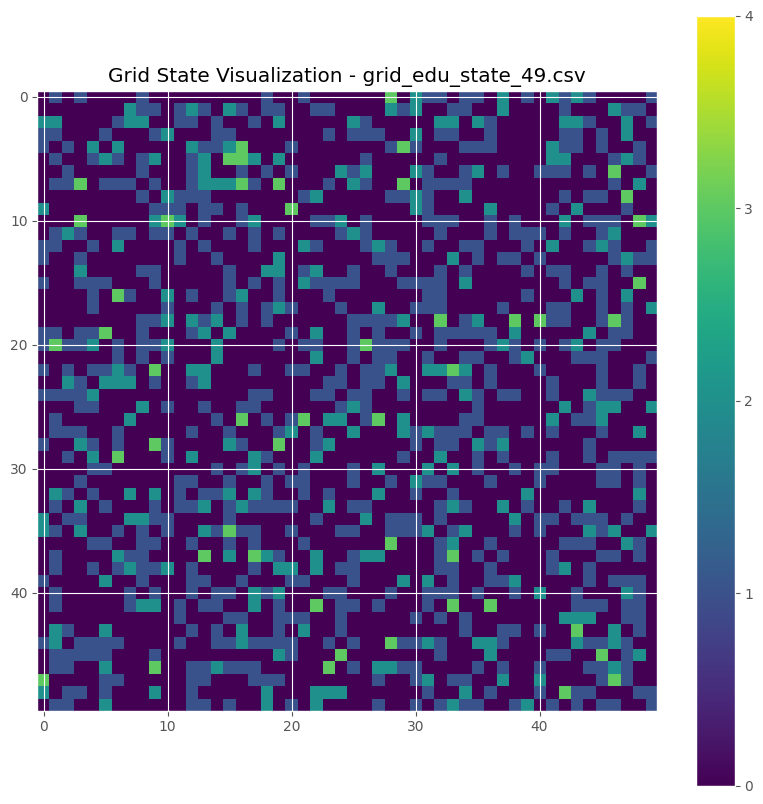

Plotted grid_edu_state_49.csv


In [131]:

def plot_grid(filename, vmin=None, vmax=None):
    # Load the grid data from the file
    grid_data = pd.read_csv(filename, header=None)
    grid_data.dropna(axis='columns', how='all', inplace=True)
    grid_array = grid_data.to_numpy()

    # Define the color map
    cmap = matplotlib.colormaps['viridis']

    # Create the plot
    plt.figure(figsize=(10, 10))
    im = plt.imshow(grid_array, cmap=cmap, aspect='equal', vmin=vmin, vmax=vmax)

    # Only add colorbar ticks if vmin and vmax are provided
    if vmin is not None and vmax is not None:
        plt.colorbar(im, ticks=np.linspace(vmin, vmax, num=5))  # Adjust num for more or fewer ticks
    else:
        plt.colorbar(im)

    plt.title(f'Grid State Visualization - {filename}')
    plt.show()

# Define your color range minimum and maximum, if known
vmin = 0  # Replace with your actual minimum, if known
vmax = 4  # Replace with your actual maximum, if known

# Get a list of all grid state CSV files and sort them by timestep
csv_files = sorted(glob.glob('grid_edu_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# Plot each file
for filename in csv_files:
    plot_grid(filename, vmin, vmax)  # Pass vmin and vmax if they are known
    print(f'Plotted {filename}')

##!!## ANIMATION


# def plot_grid(ax, filename, vmin=None, vmax=None):
#     # Load the grid data from the file
#     grid_data = pd.read_csv(filename, header=None)
#     grid_data.dropna(axis='columns', how='all', inplace=True)
#     grid_array = grid_data.to_numpy()

#     # Define the color map
#     cmap = plt.cm.viridis

#     # Update the plot
#     im = ax.imshow(grid_array, cmap=cmap, aspect='equal', vmin=vmin, vmax=vmax)
#     ax.set_title(f'Grid State Visualization - {filename}')
#     return im

# # Define your color range minimum and maximum, if known
# vmin = 0  # Replace with your actual minimum, if known
# vmax = 4  # Replace with your actual maximum, if known

# # Get a list of all grid state CSV files and sort them by timestep
# csv_files = sorted(glob.glob('grid_edu_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# # Create figure for the animation
# fig, ax = plt.subplots(figsize=(10, 10))

# # Initialize the plot with the first file
# im = plot_grid(ax, csv_files[0], vmin, vmax)

# # Function to update the figure for each frame
# def update(frame):
#     filename = csv_files[frame]
#     im = plot_grid(ax, filename, vmin, vmax)
#     return [im]

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(csv_files), interval=40, blit=True)

# plt.colorbar(im, ax=ax, ticks=np.linspace(vmin, vmax, num=5))  # Adjust num for more or fewer ticks
# plt.show()

# ani.save('simulation_education_animation.mp4', writer='ffmpeg')  # For video

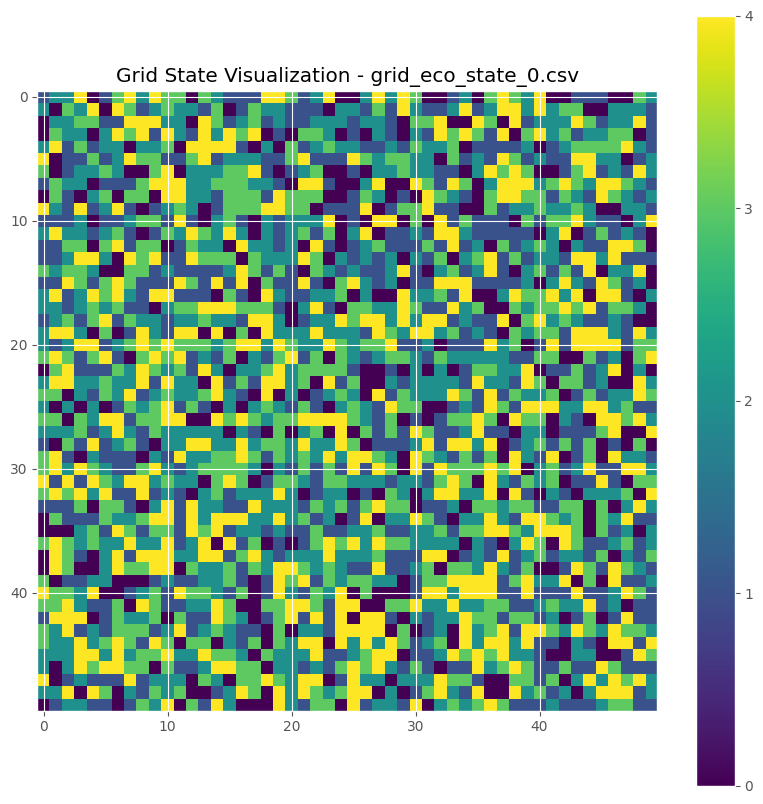

Plotted grid_eco_state_0.csv


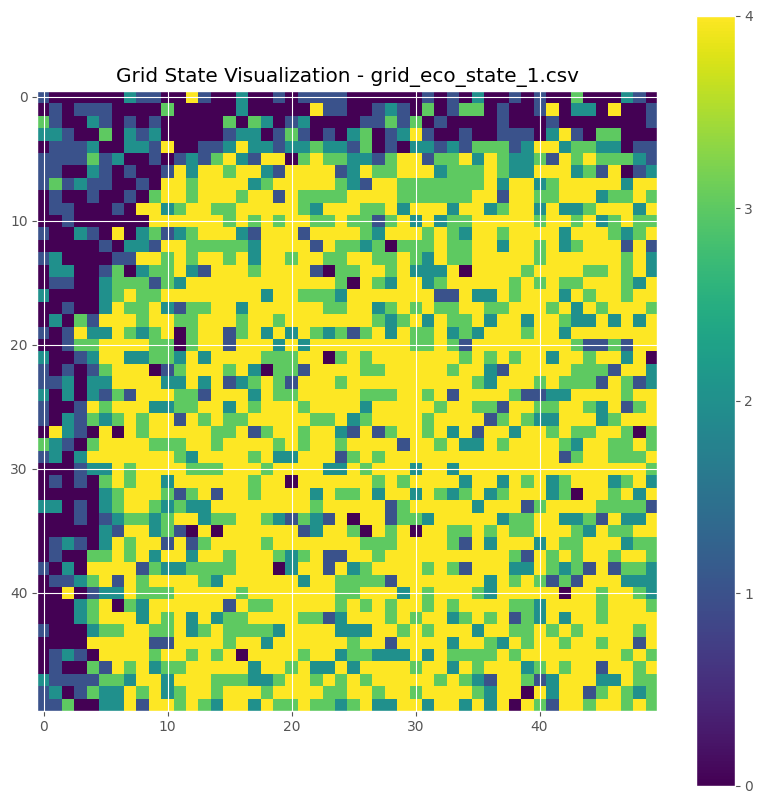

Plotted grid_eco_state_1.csv


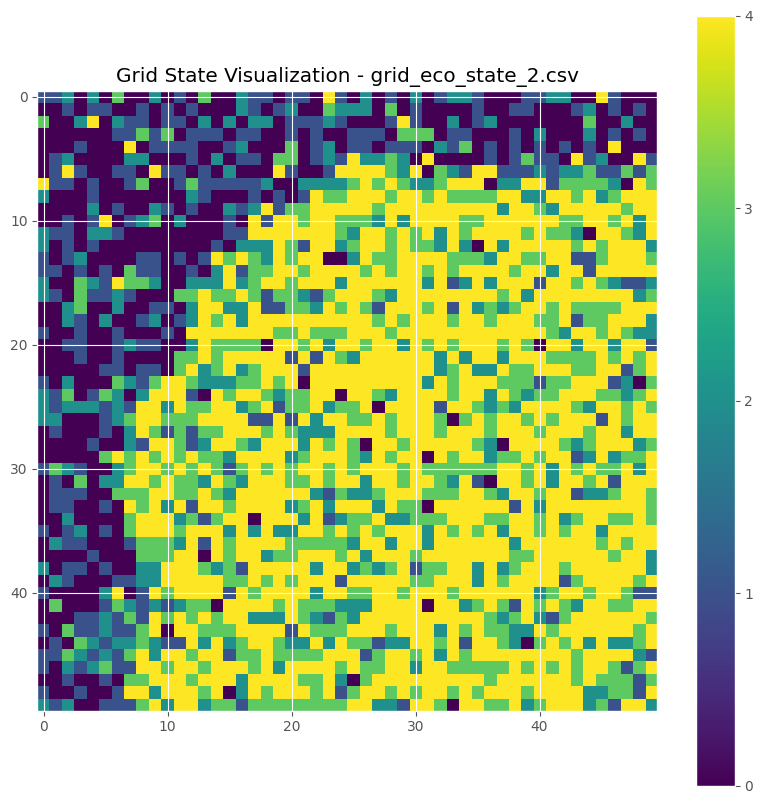

Plotted grid_eco_state_2.csv


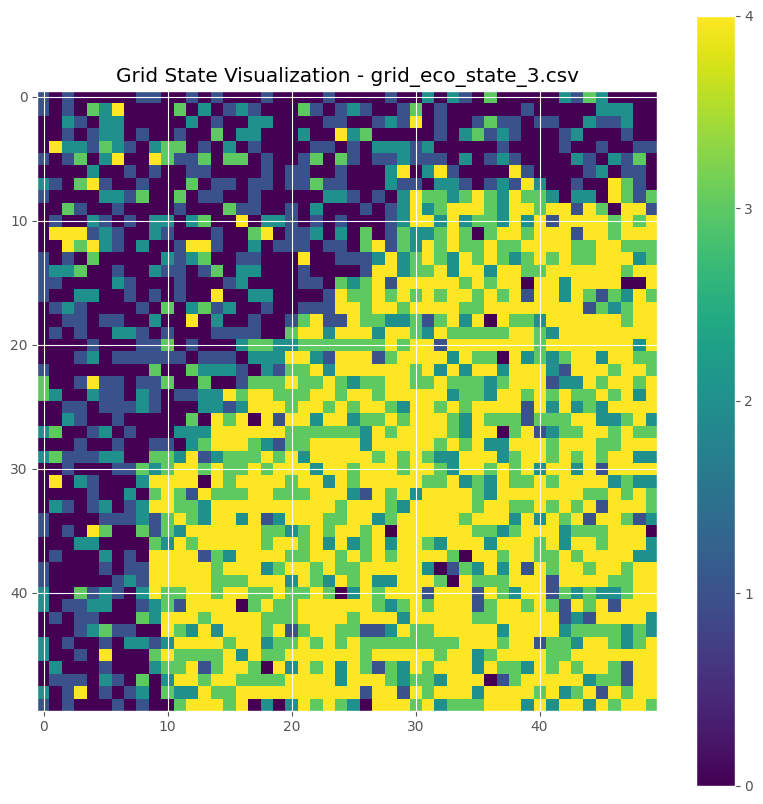

Plotted grid_eco_state_3.csv


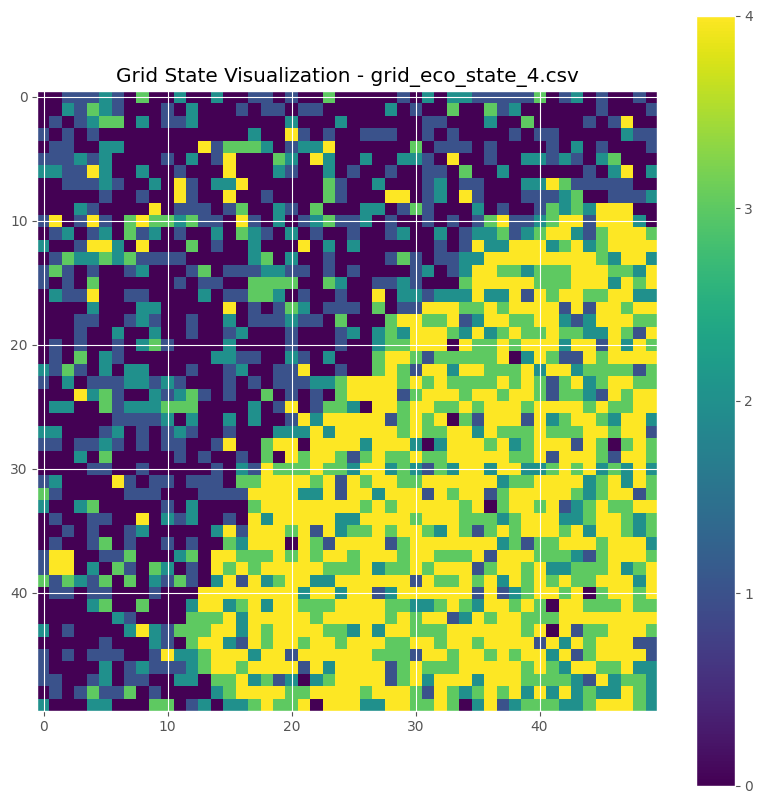

Plotted grid_eco_state_4.csv


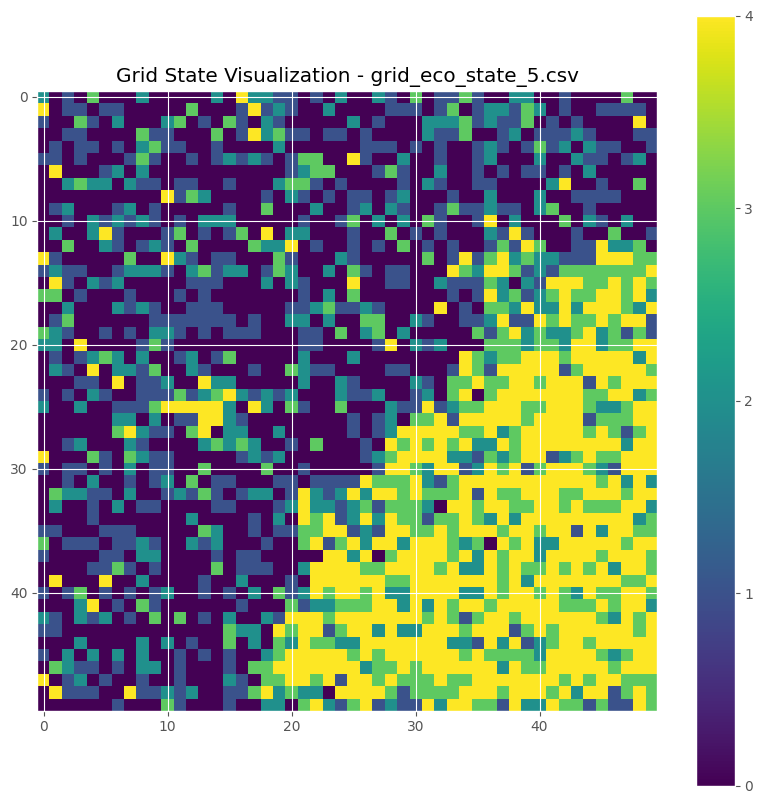

Plotted grid_eco_state_5.csv


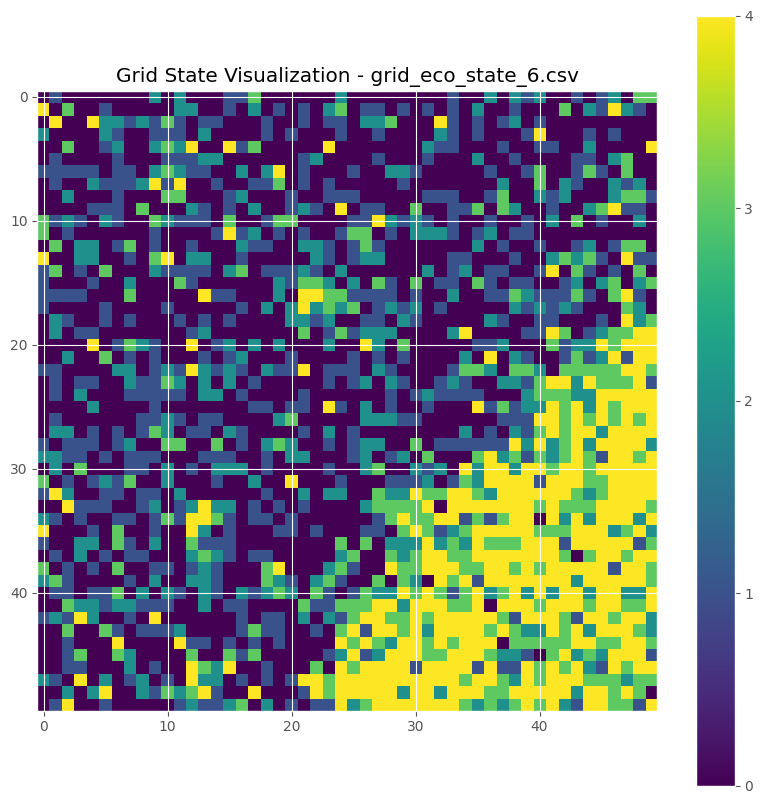

Plotted grid_eco_state_6.csv


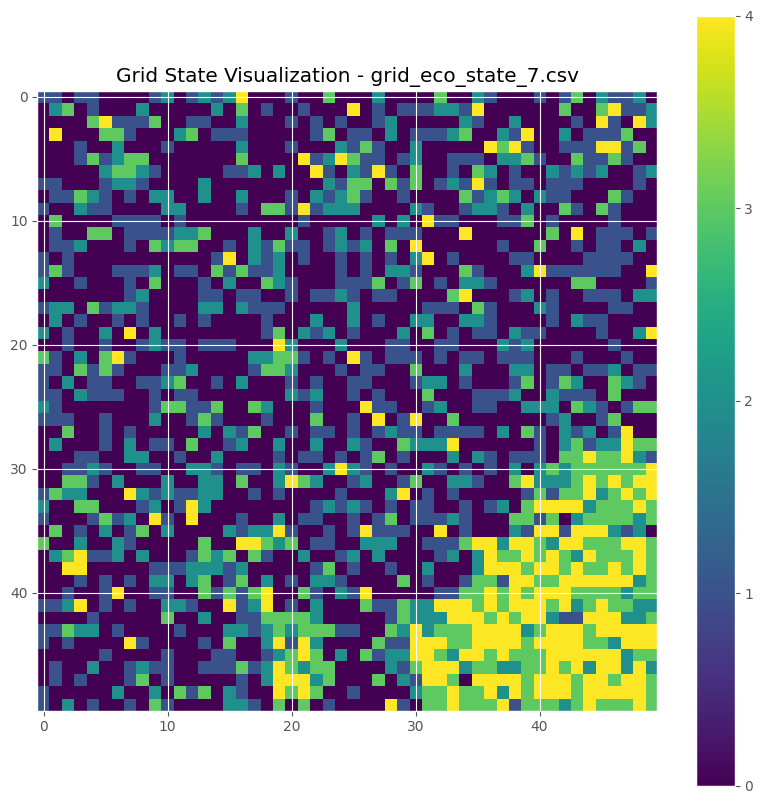

Plotted grid_eco_state_7.csv


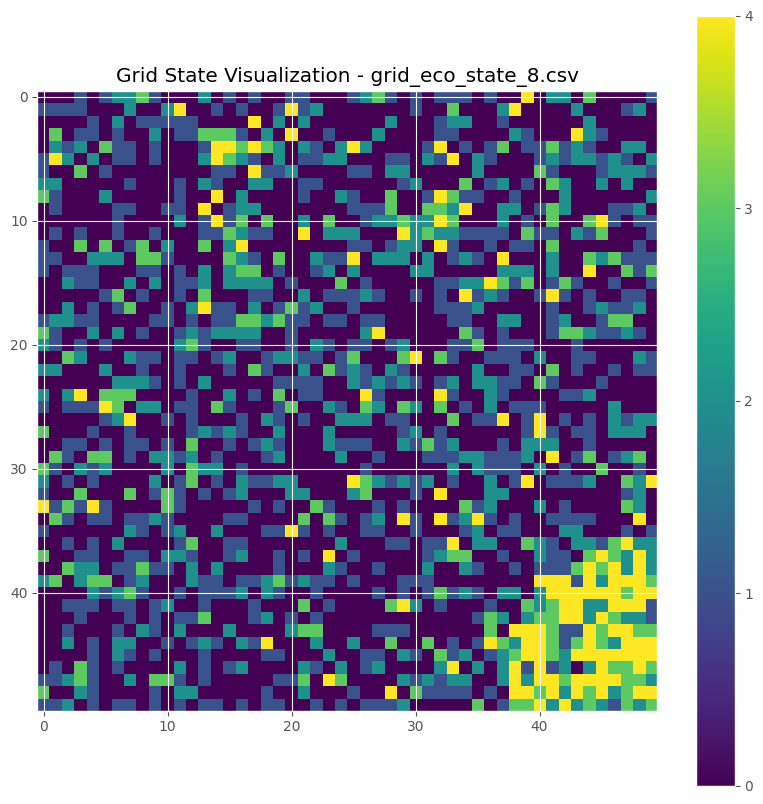

Plotted grid_eco_state_8.csv


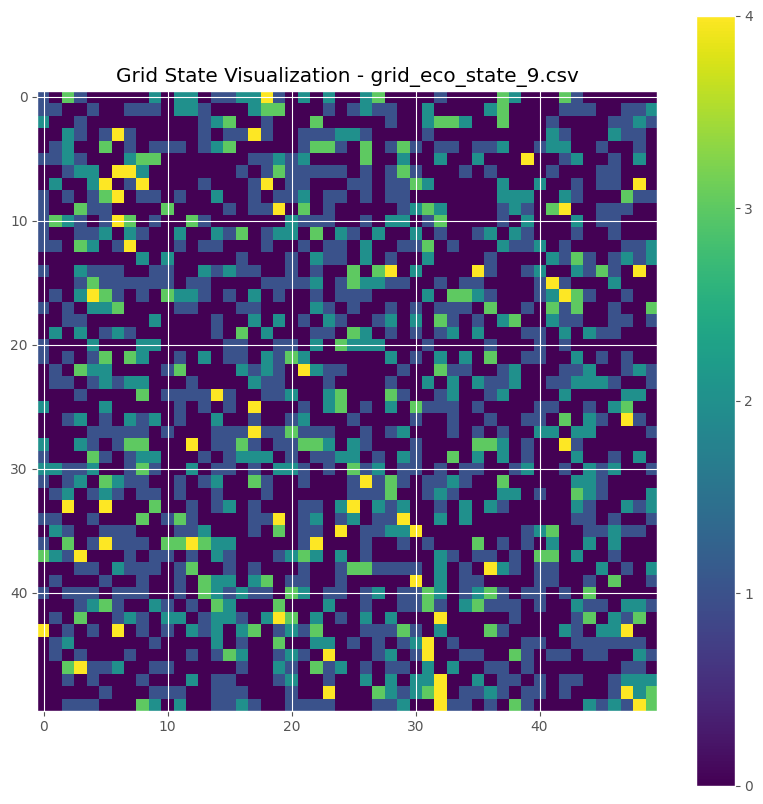

Plotted grid_eco_state_9.csv


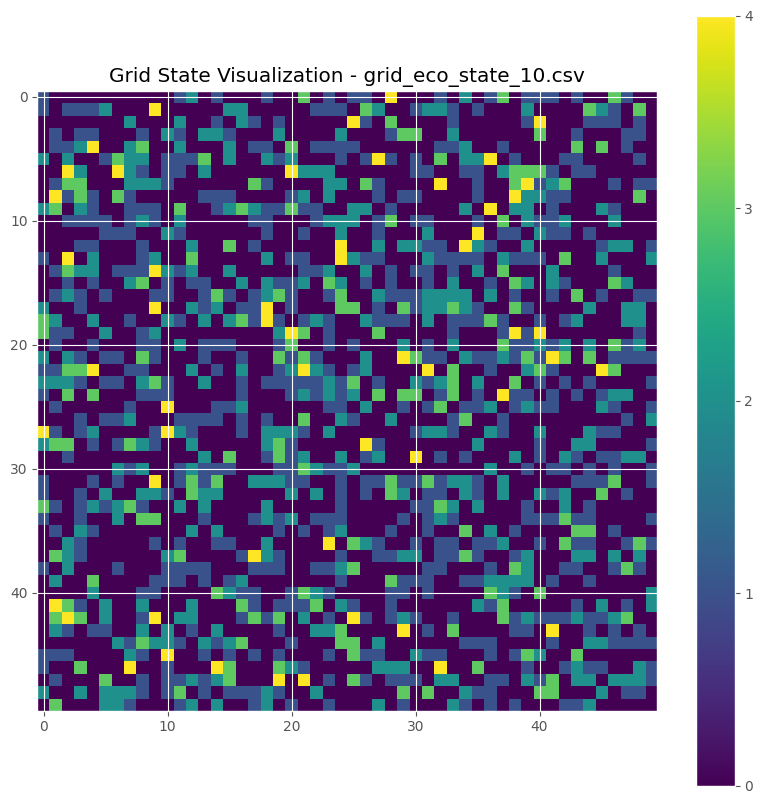

Plotted grid_eco_state_10.csv


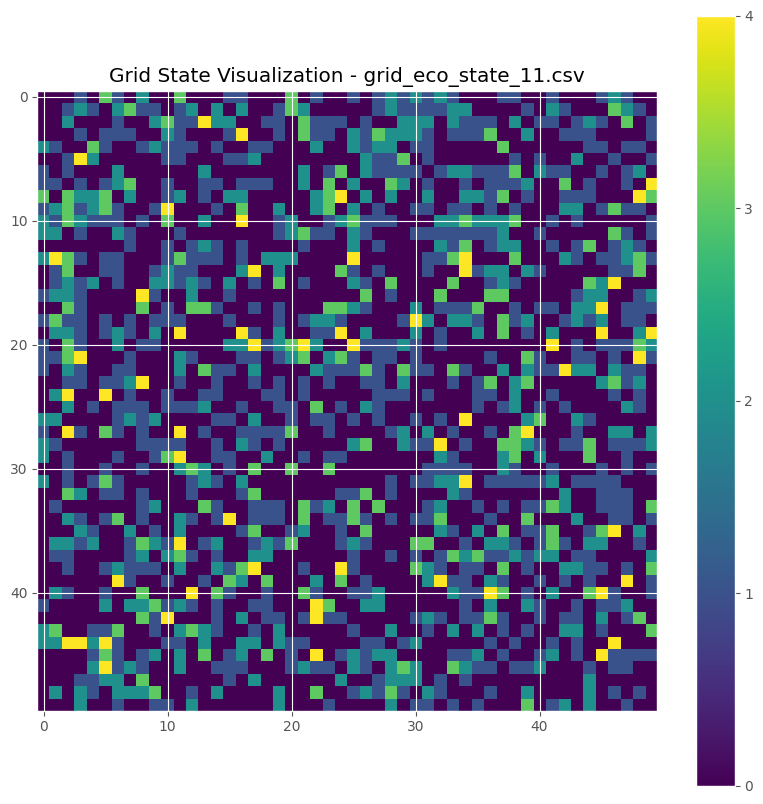

Plotted grid_eco_state_11.csv


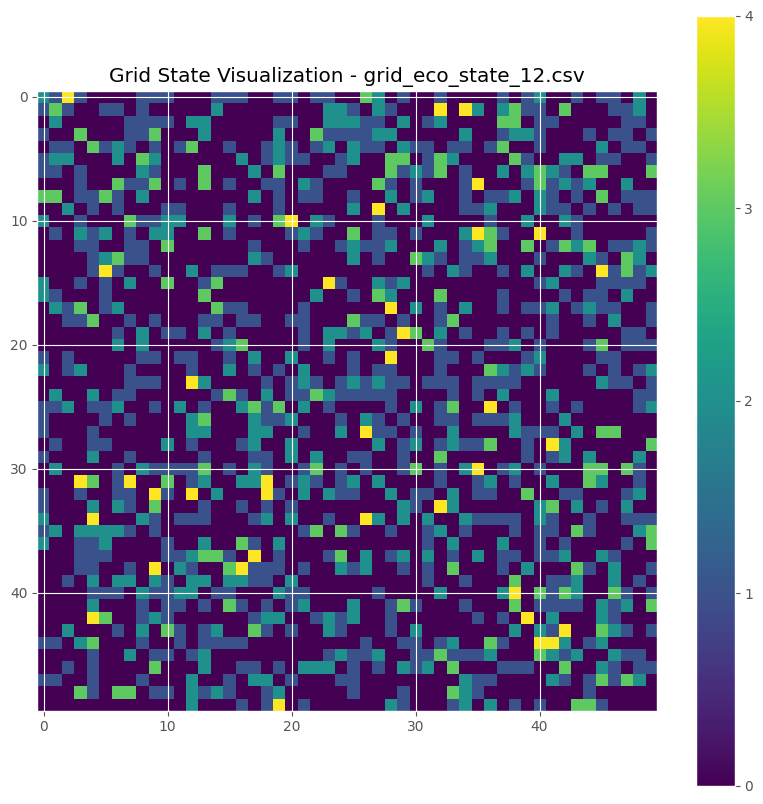

Plotted grid_eco_state_12.csv


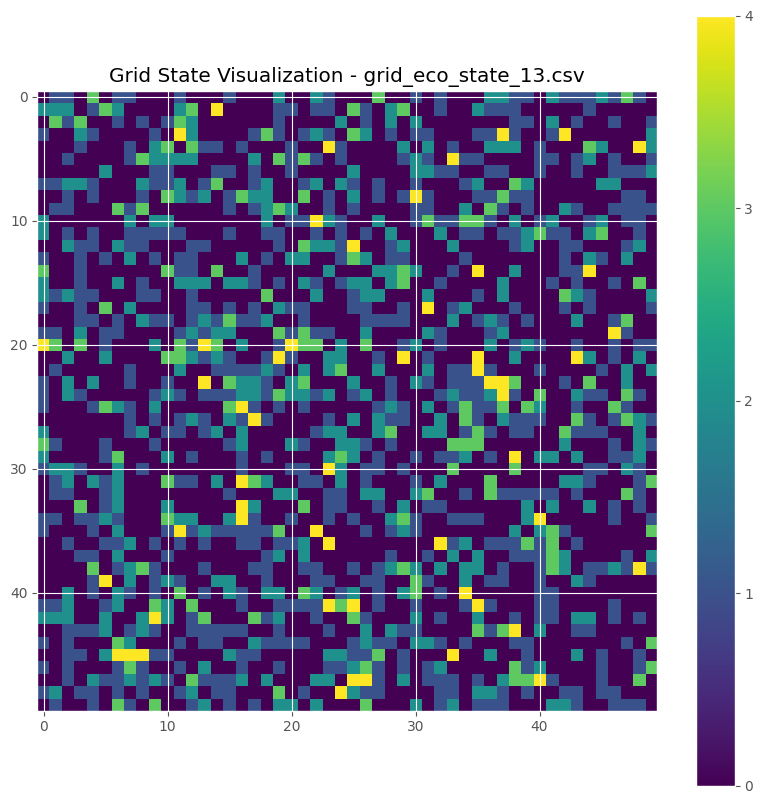

Plotted grid_eco_state_13.csv


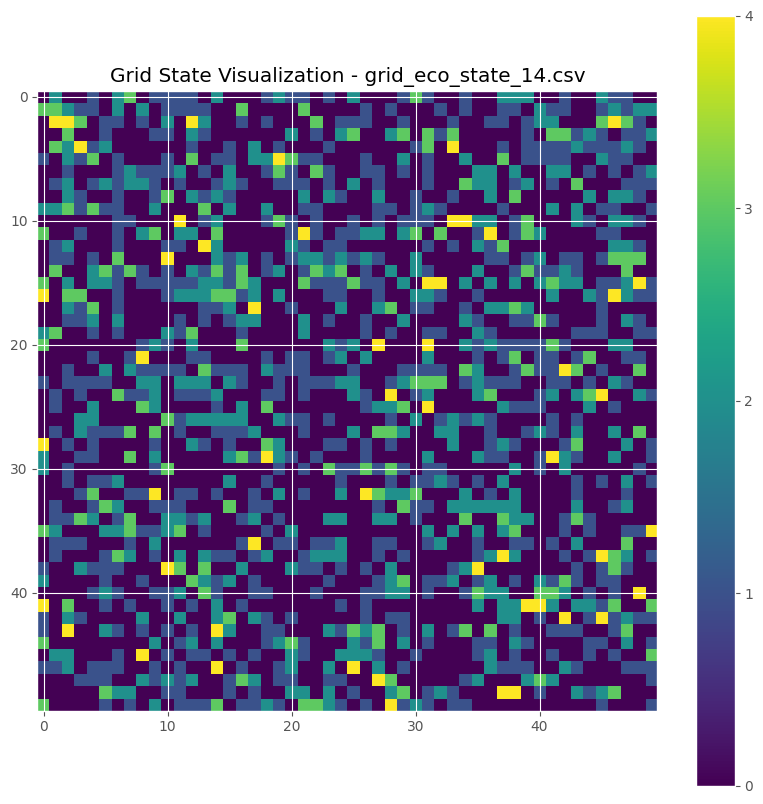

Plotted grid_eco_state_14.csv


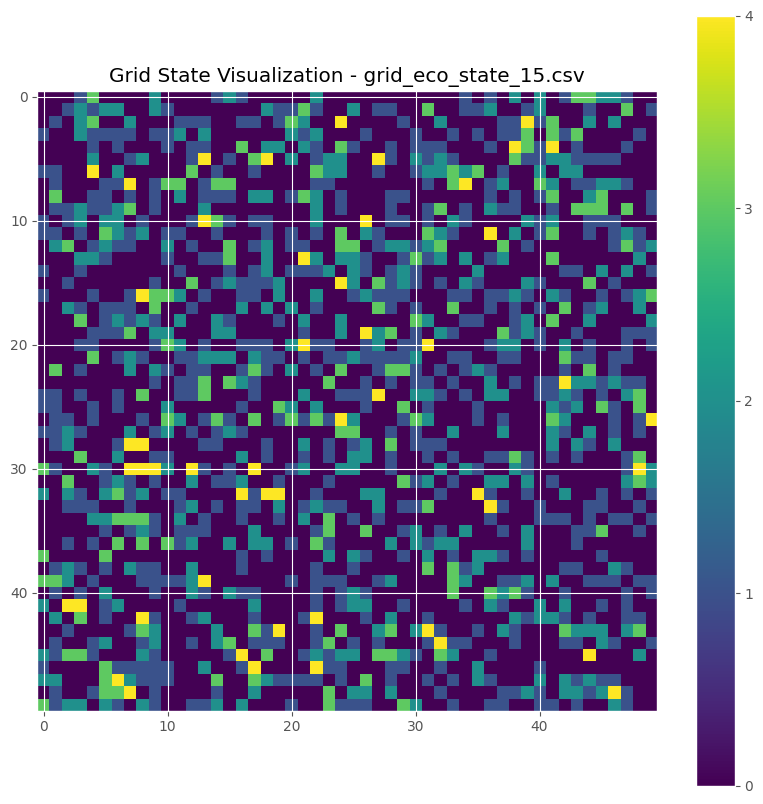

Plotted grid_eco_state_15.csv


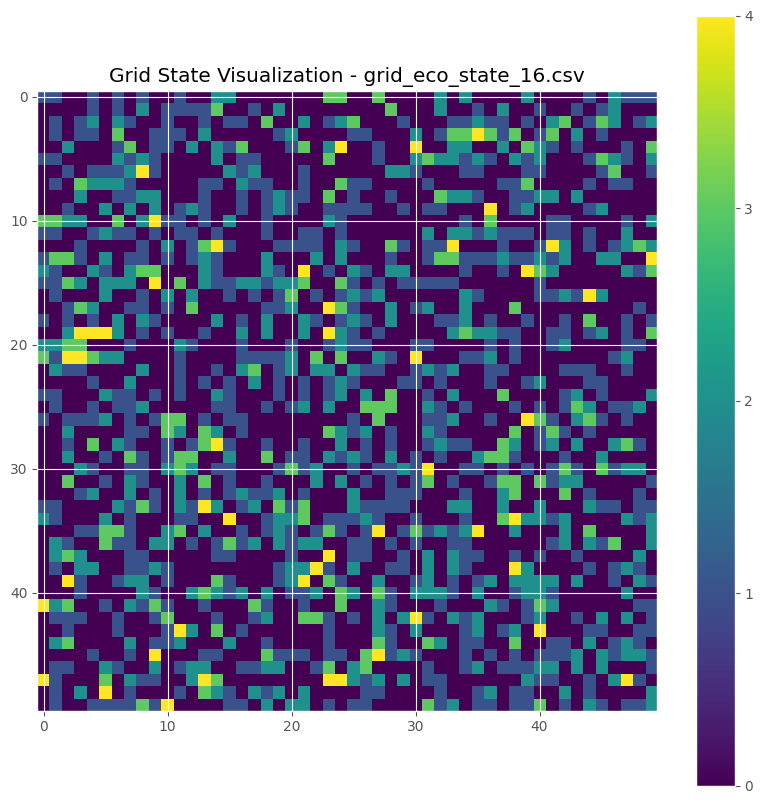

Plotted grid_eco_state_16.csv


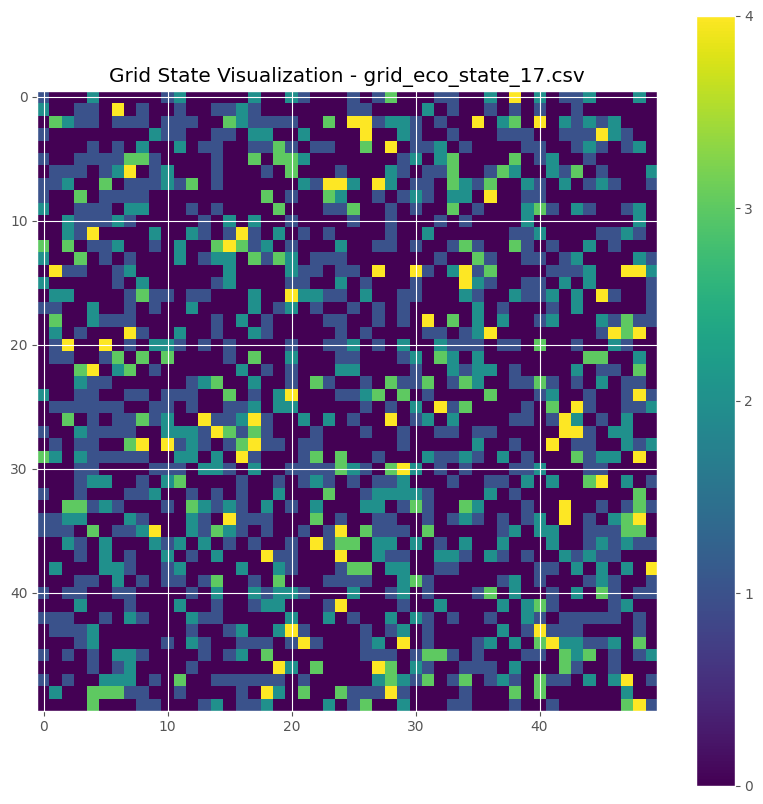

Plotted grid_eco_state_17.csv


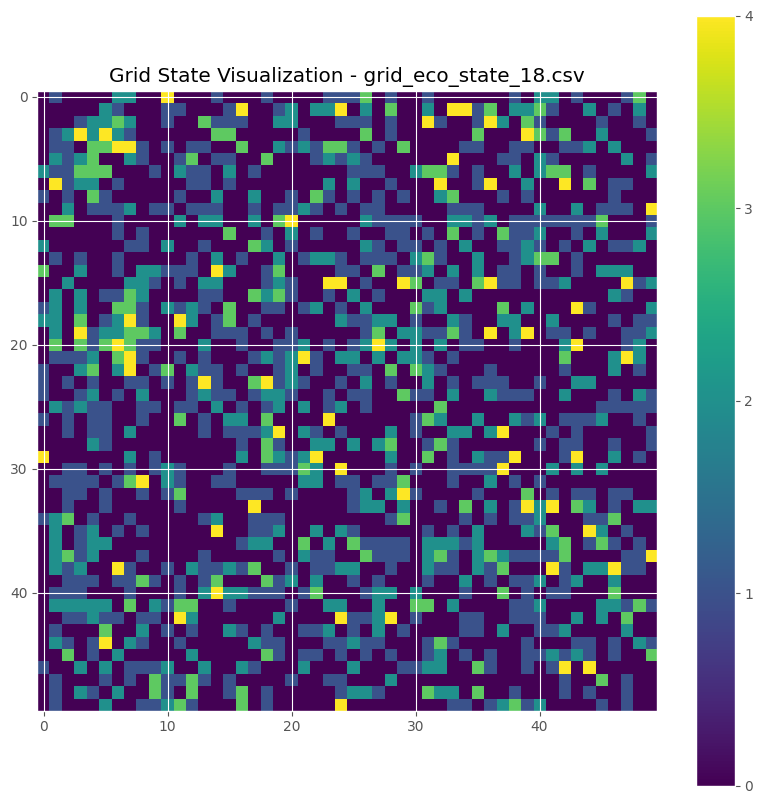

Plotted grid_eco_state_18.csv


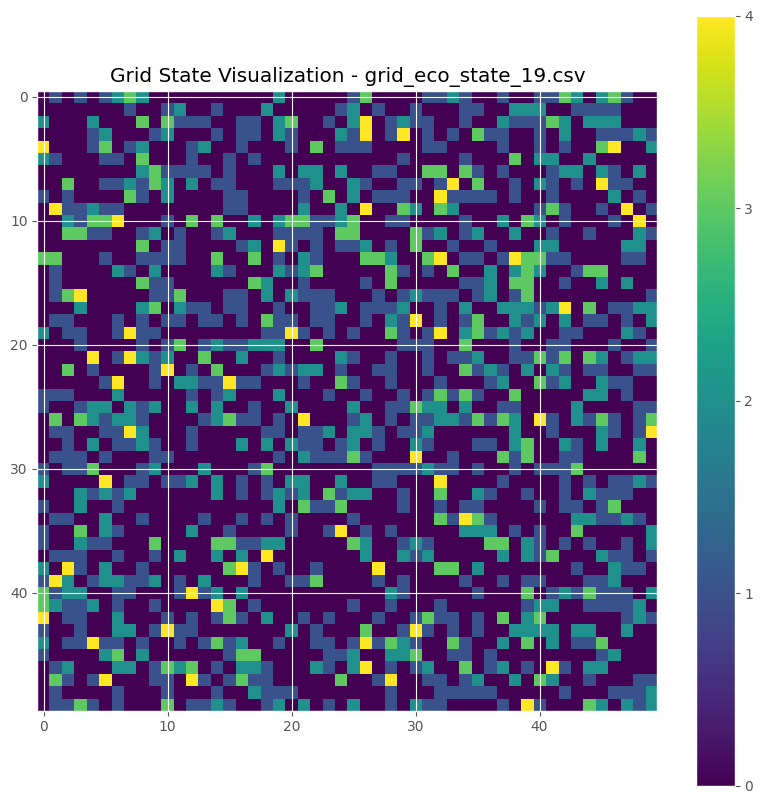

Plotted grid_eco_state_19.csv


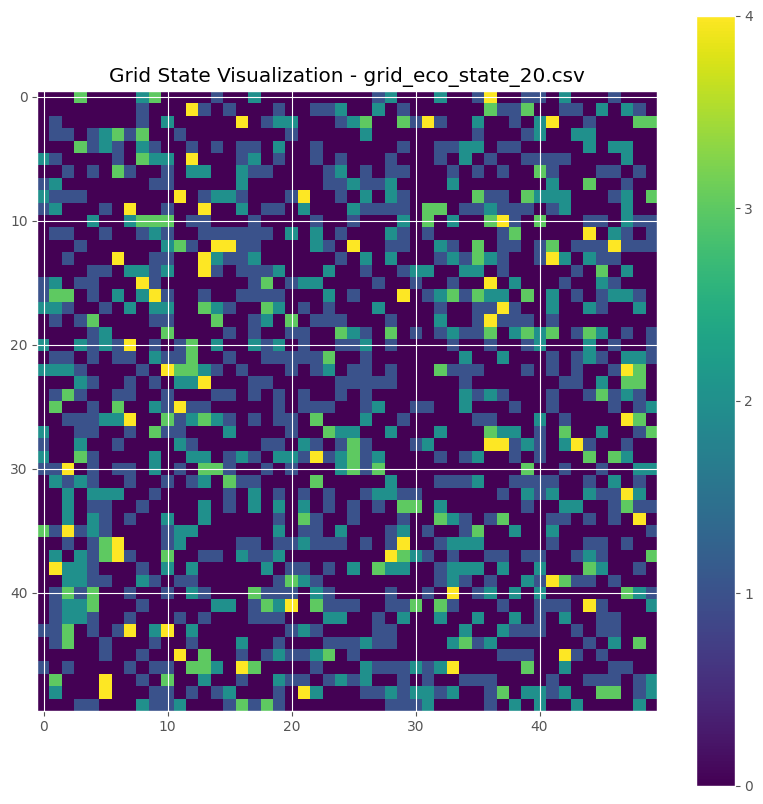

Plotted grid_eco_state_20.csv


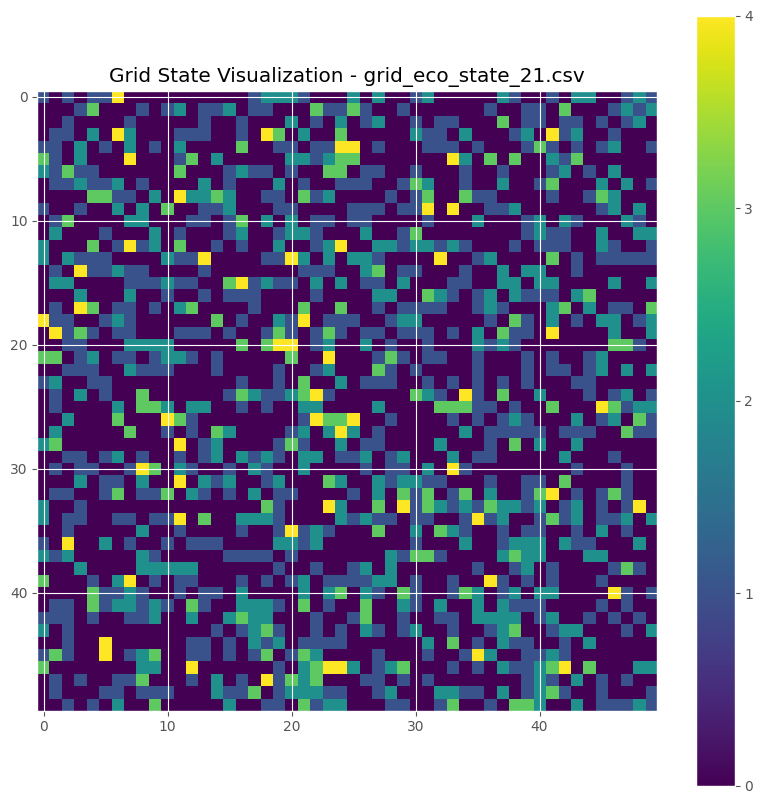

Plotted grid_eco_state_21.csv


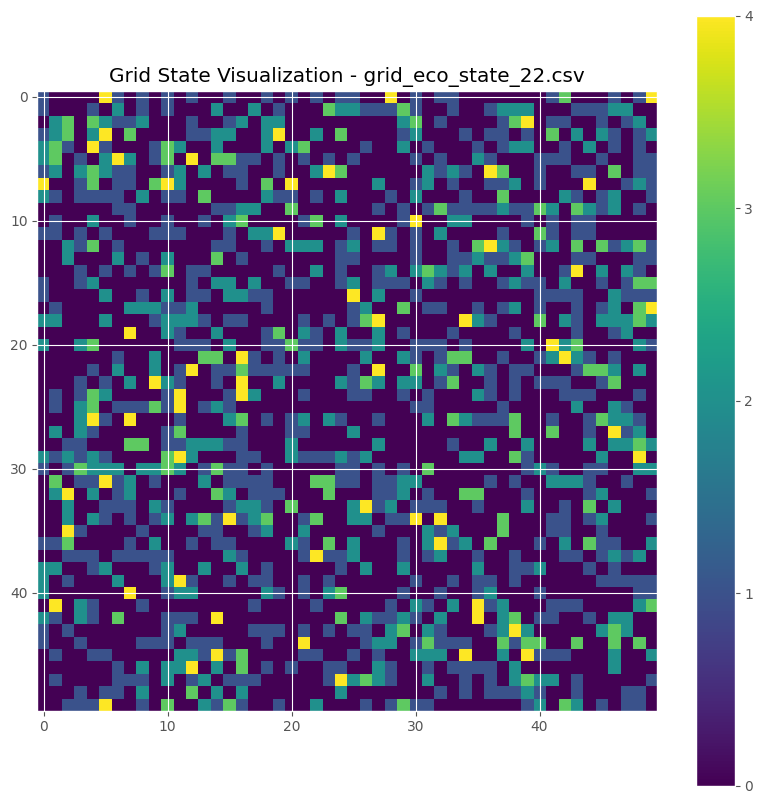

Plotted grid_eco_state_22.csv


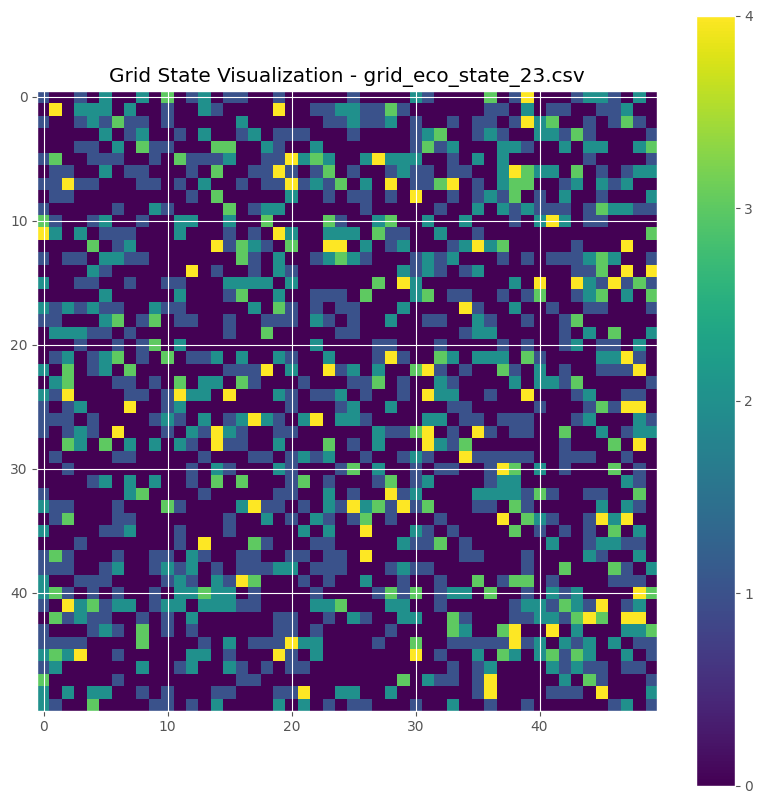

Plotted grid_eco_state_23.csv


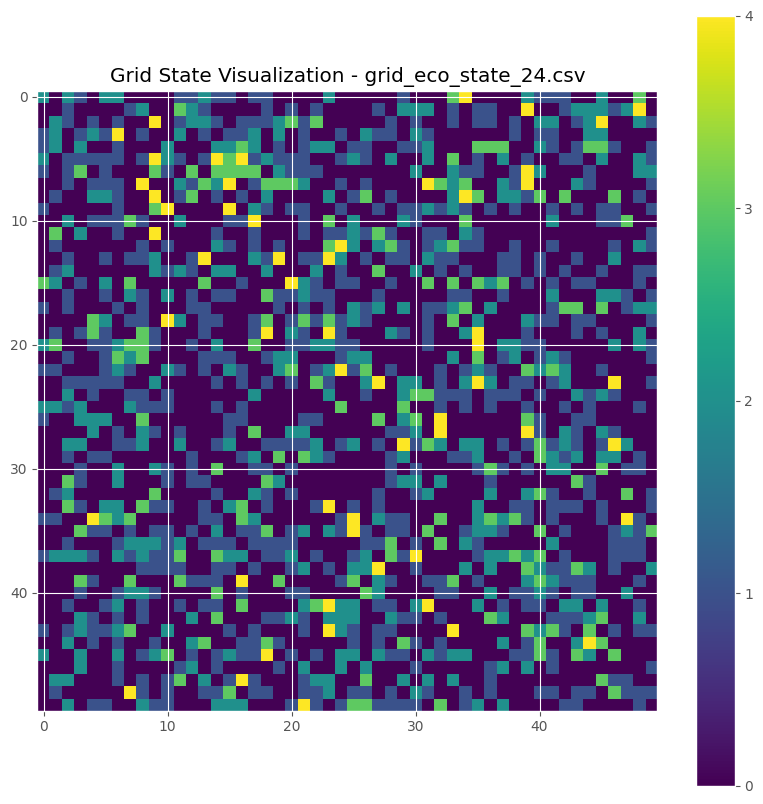

Plotted grid_eco_state_24.csv


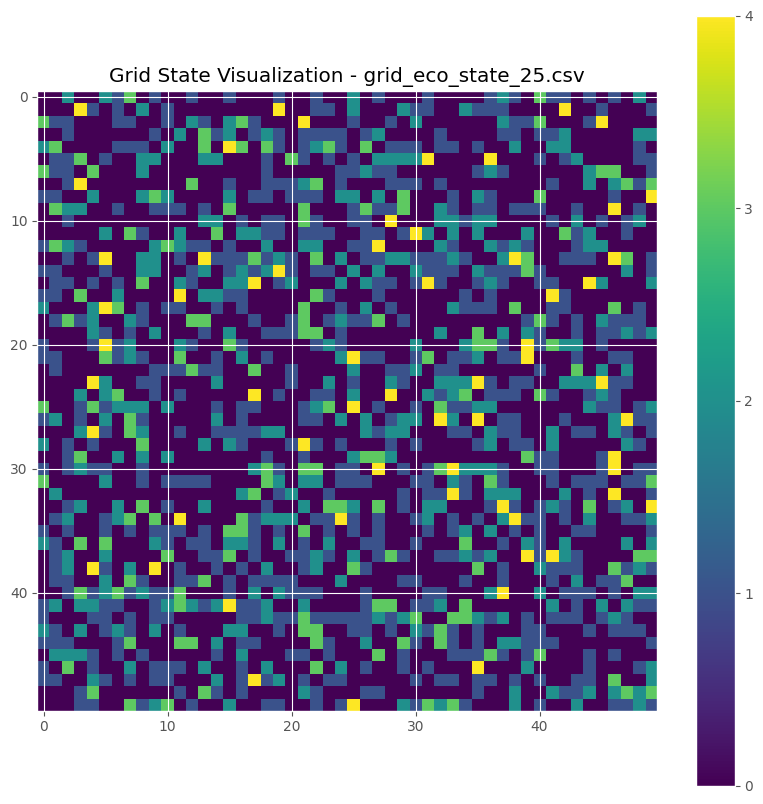

Plotted grid_eco_state_25.csv


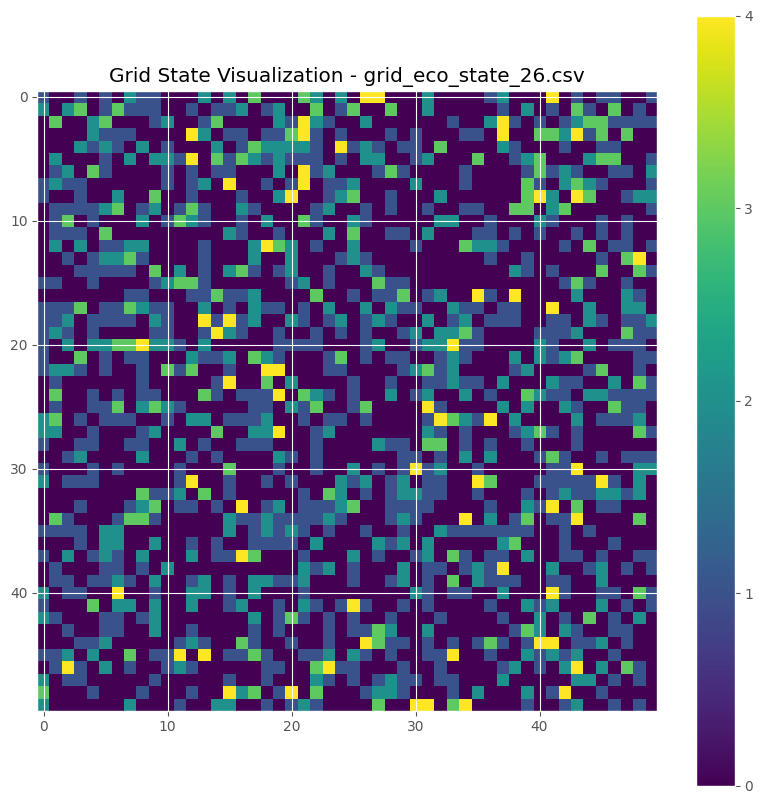

Plotted grid_eco_state_26.csv


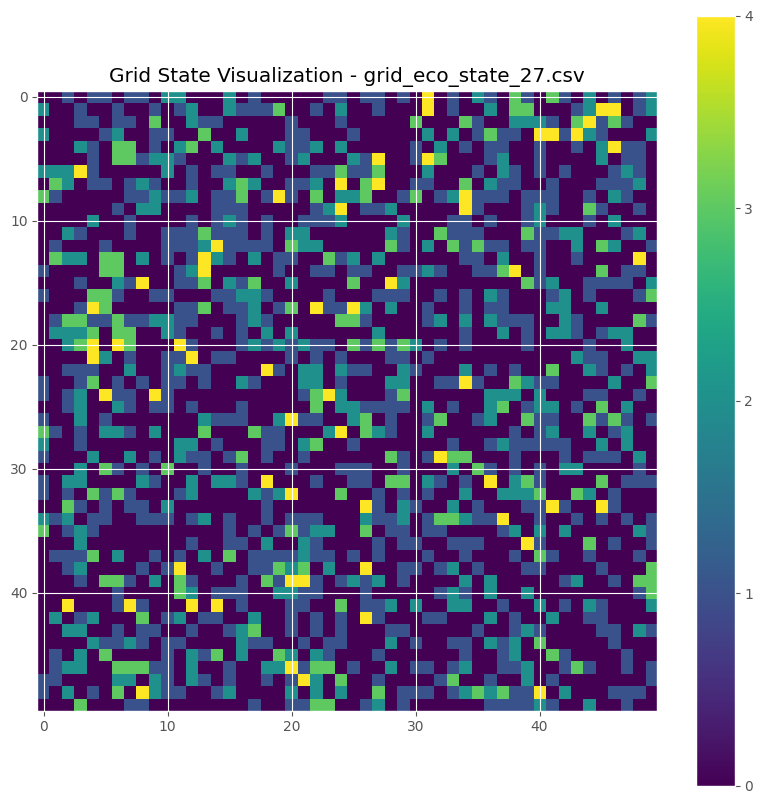

Plotted grid_eco_state_27.csv


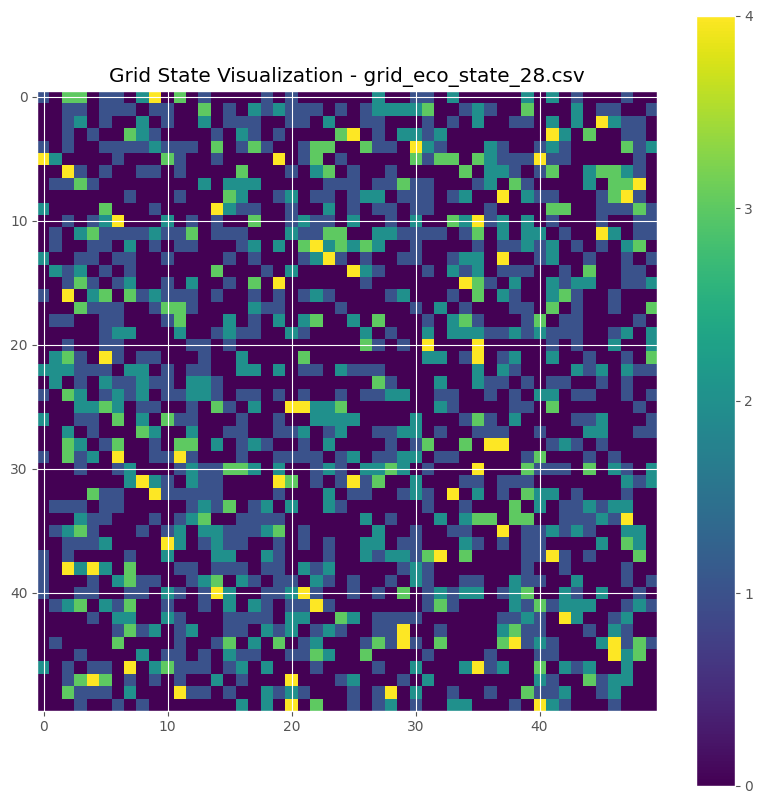

Plotted grid_eco_state_28.csv


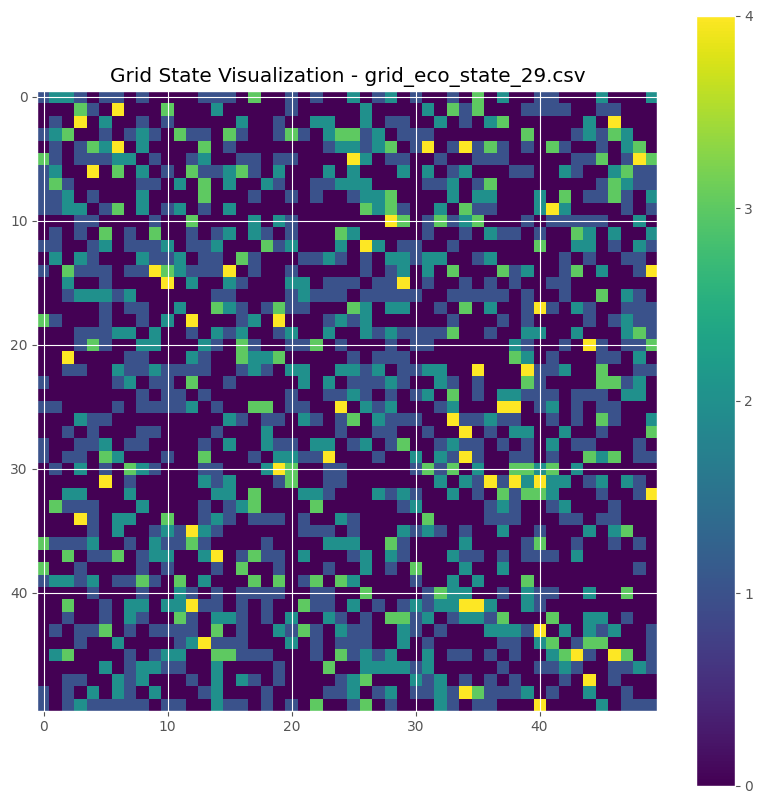

Plotted grid_eco_state_29.csv


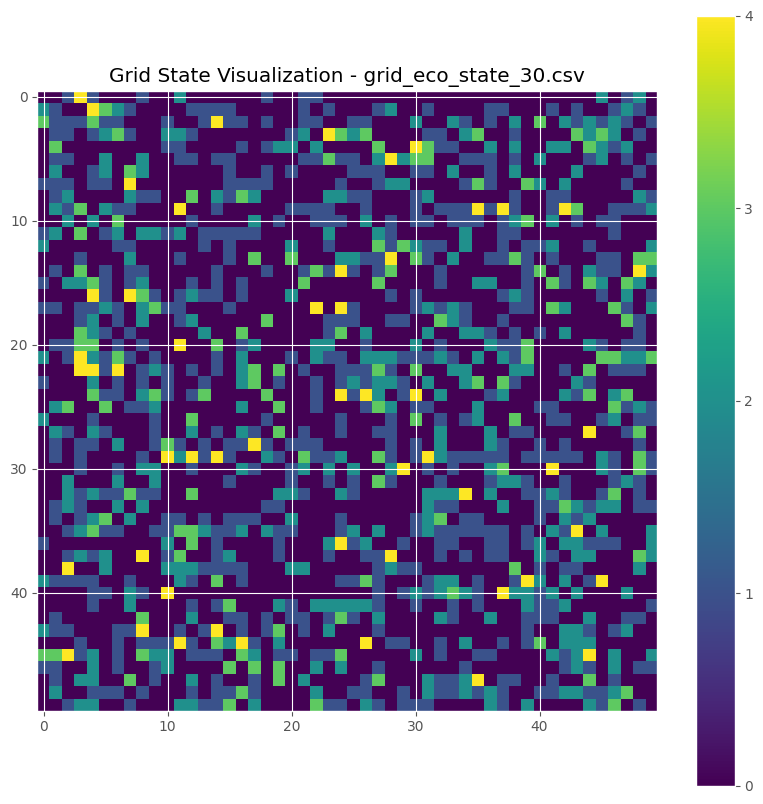

Plotted grid_eco_state_30.csv


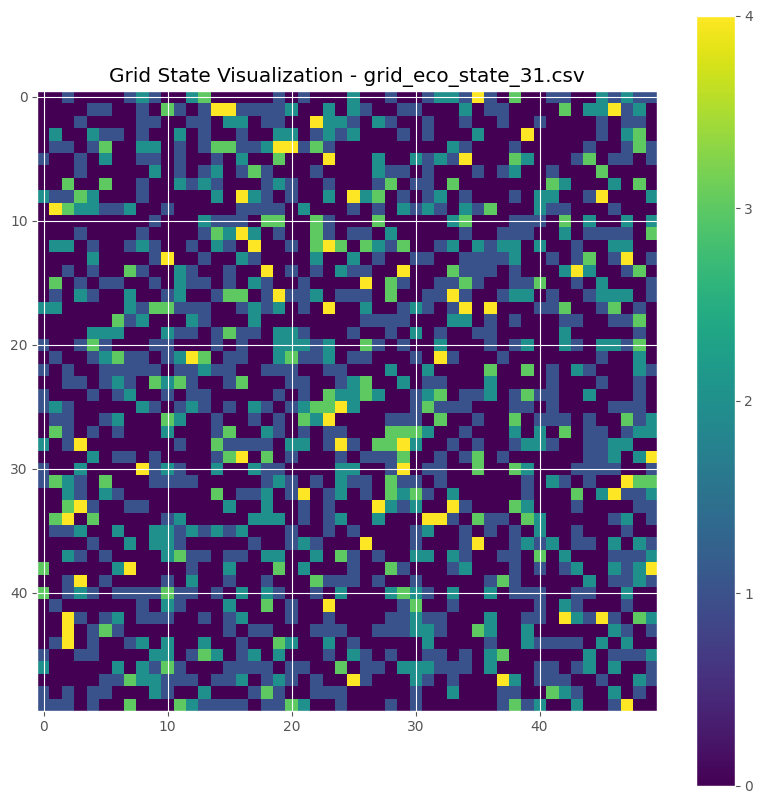

Plotted grid_eco_state_31.csv


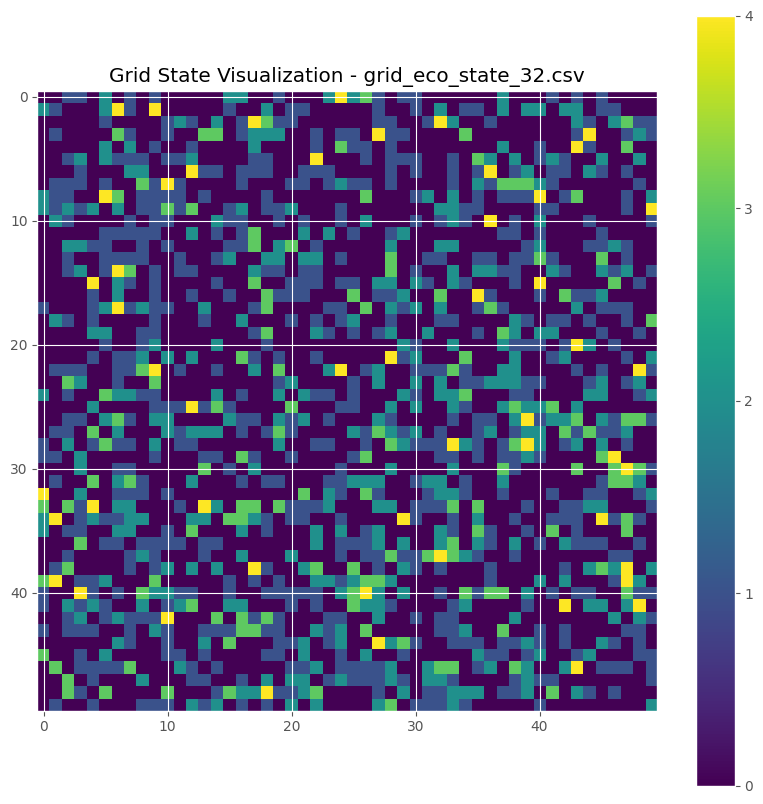

Plotted grid_eco_state_32.csv


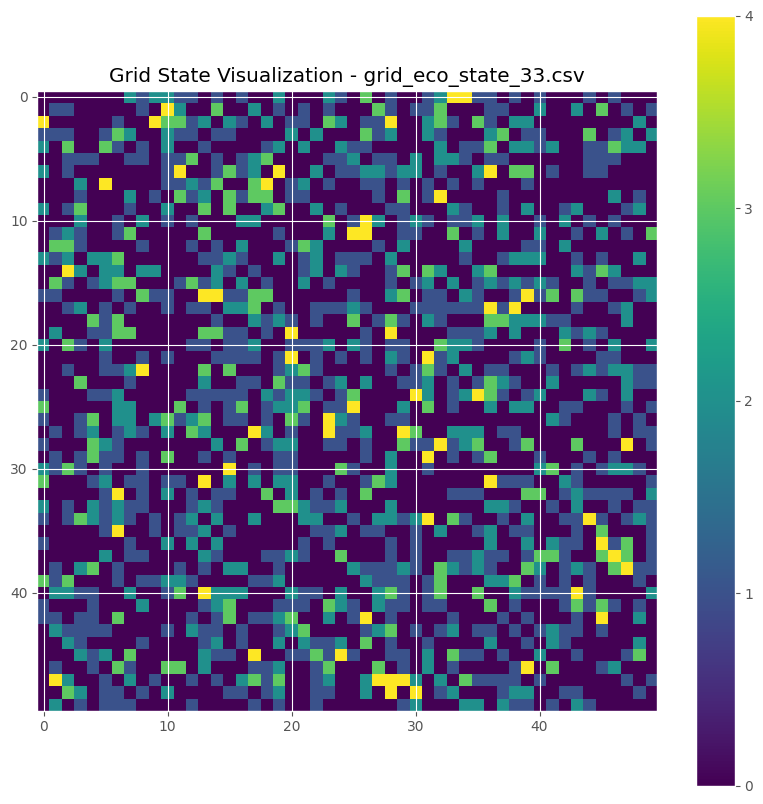

Plotted grid_eco_state_33.csv


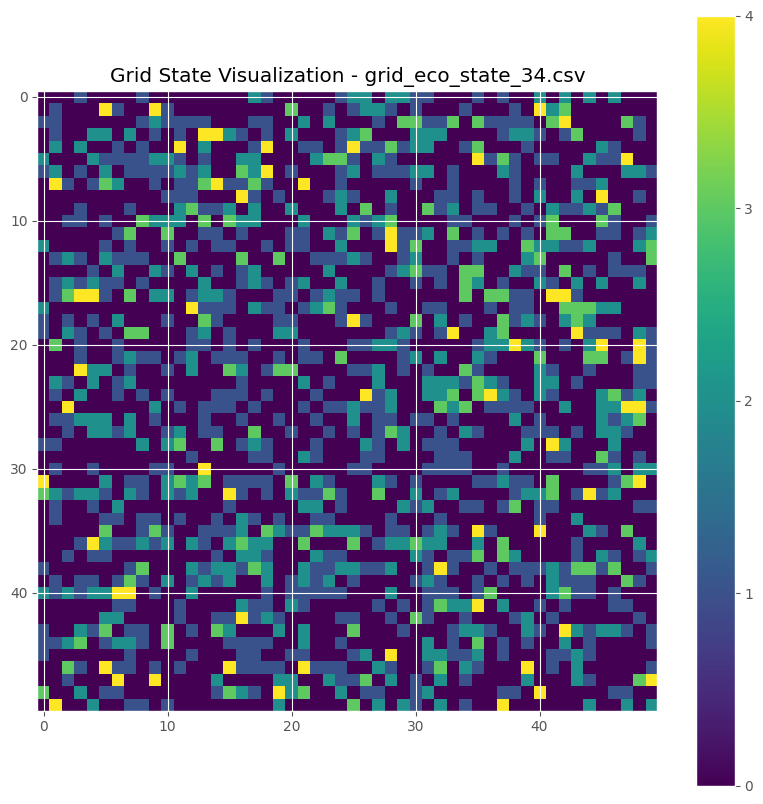

Plotted grid_eco_state_34.csv


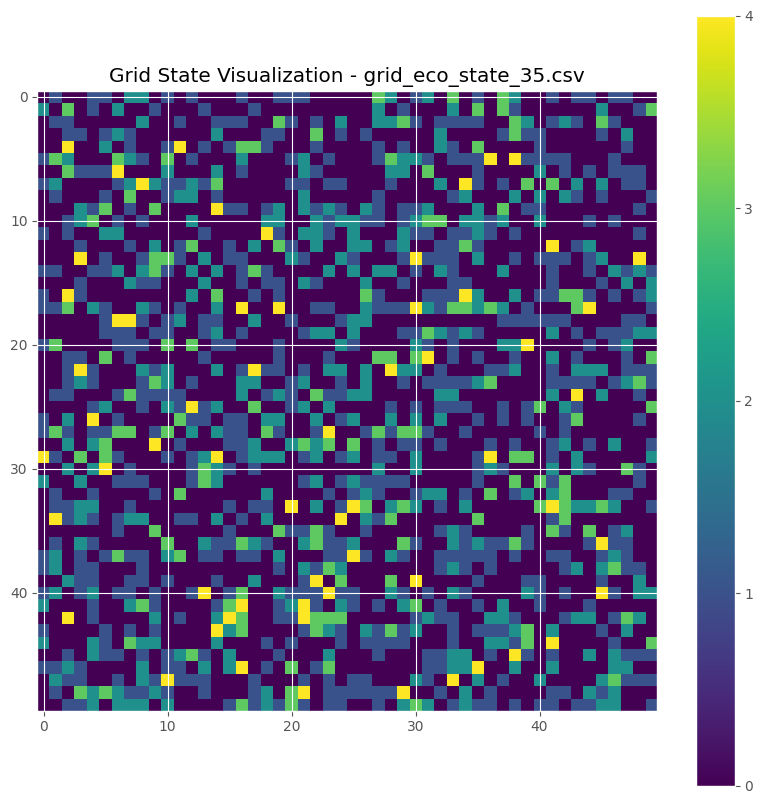

Plotted grid_eco_state_35.csv


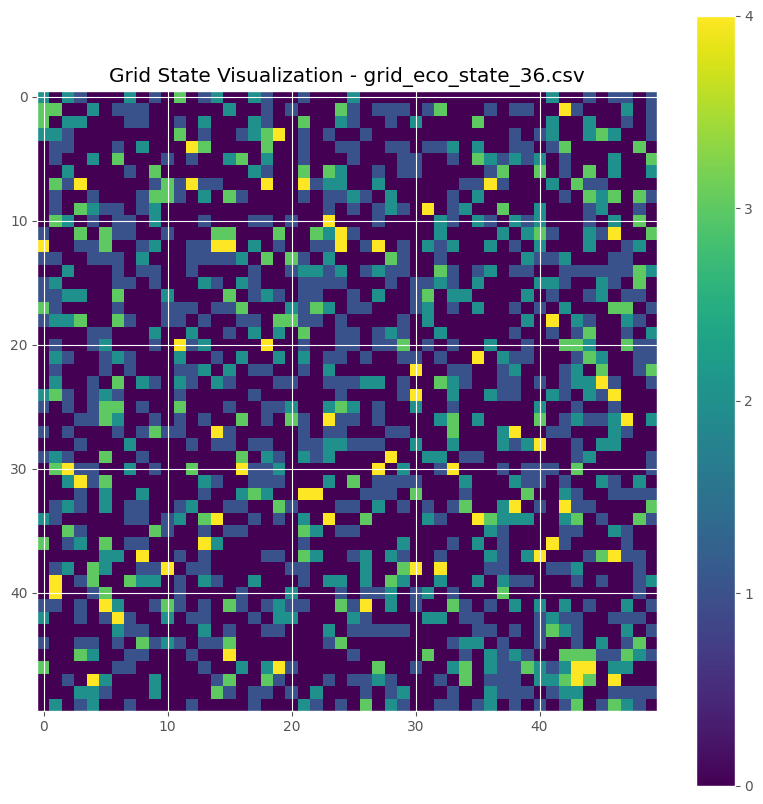

Plotted grid_eco_state_36.csv


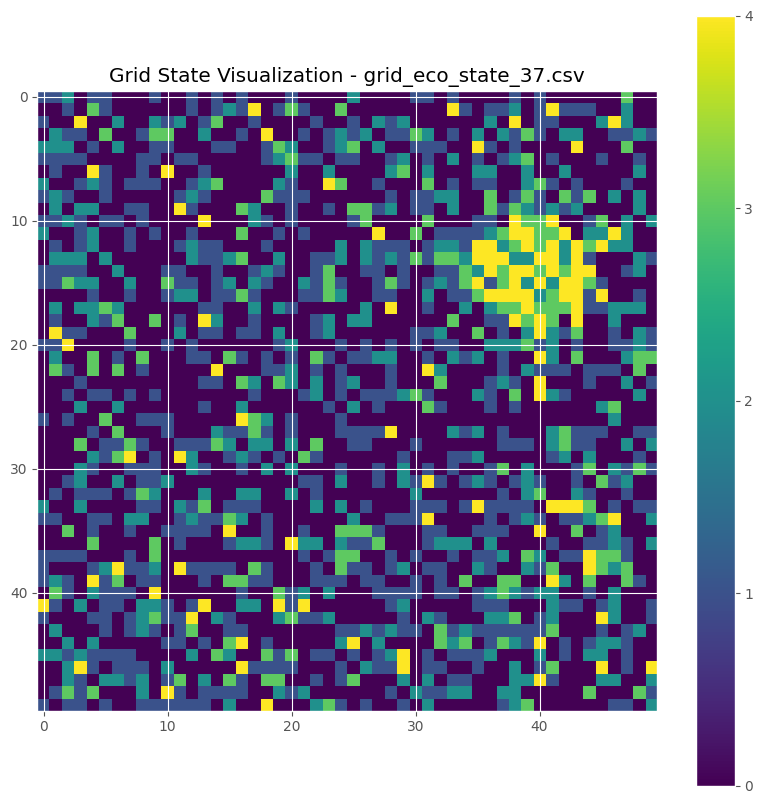

Plotted grid_eco_state_37.csv


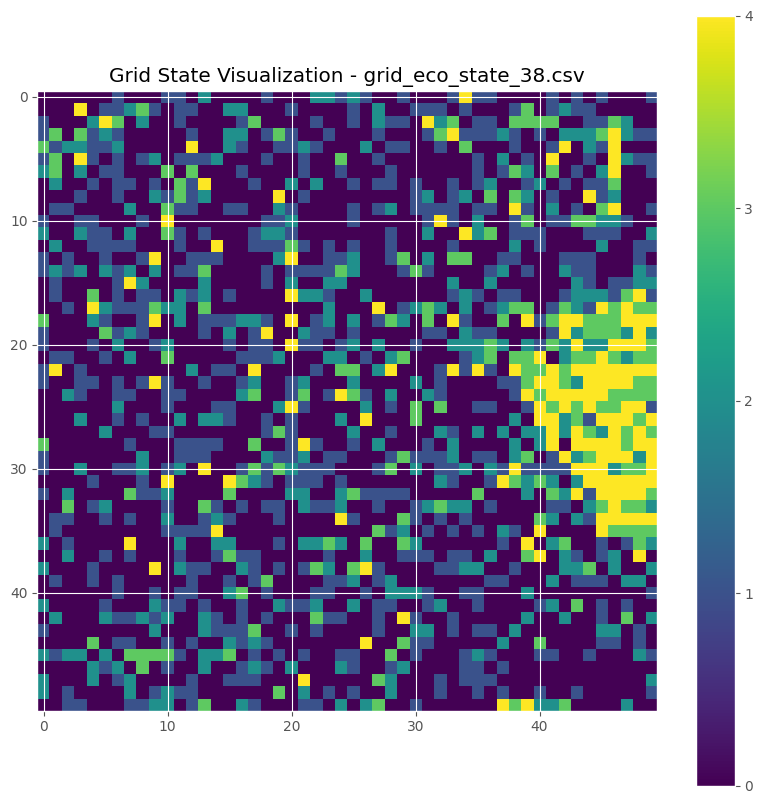

Plotted grid_eco_state_38.csv


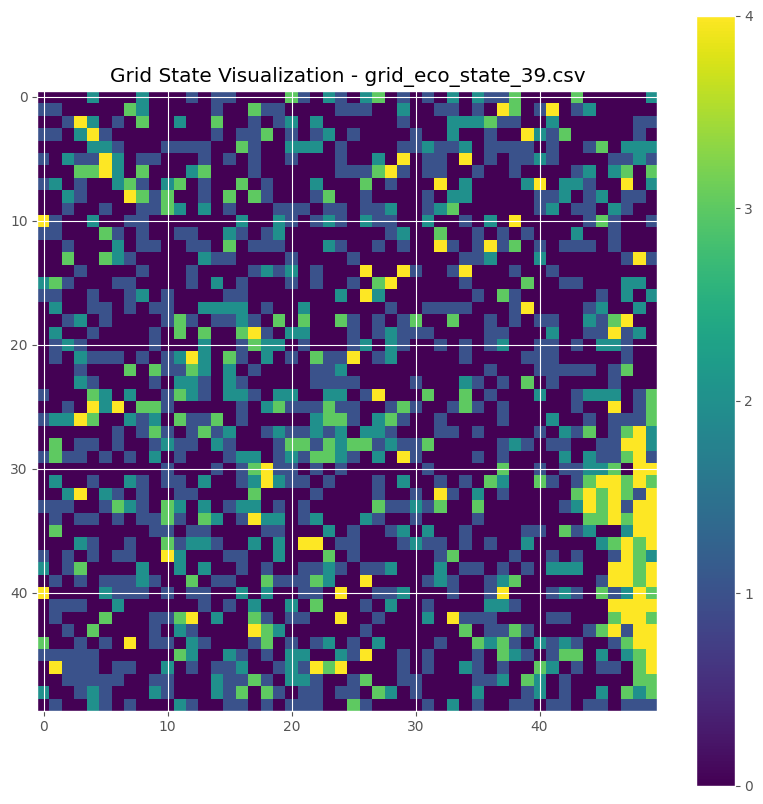

Plotted grid_eco_state_39.csv


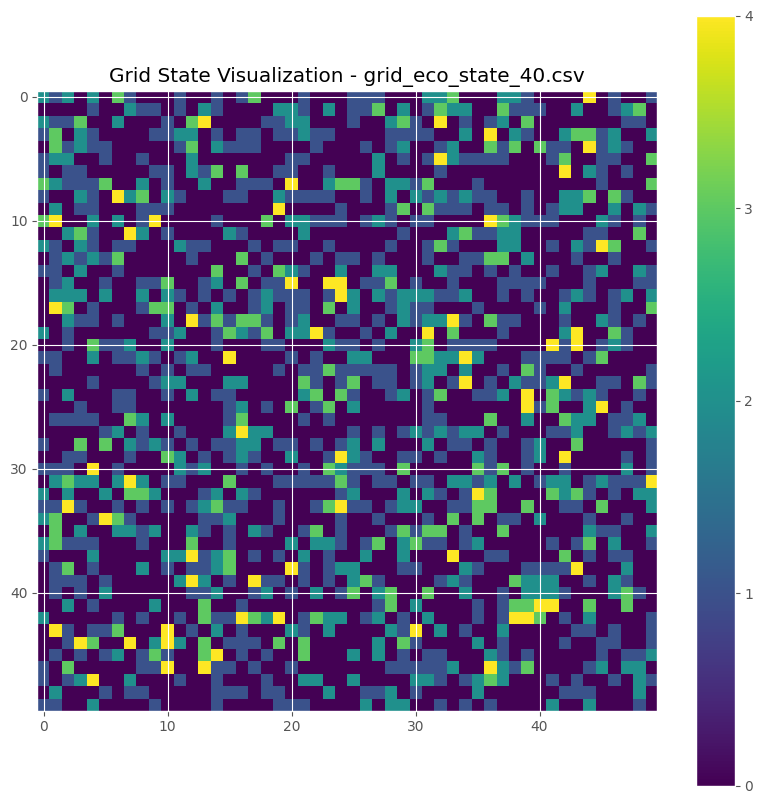

Plotted grid_eco_state_40.csv


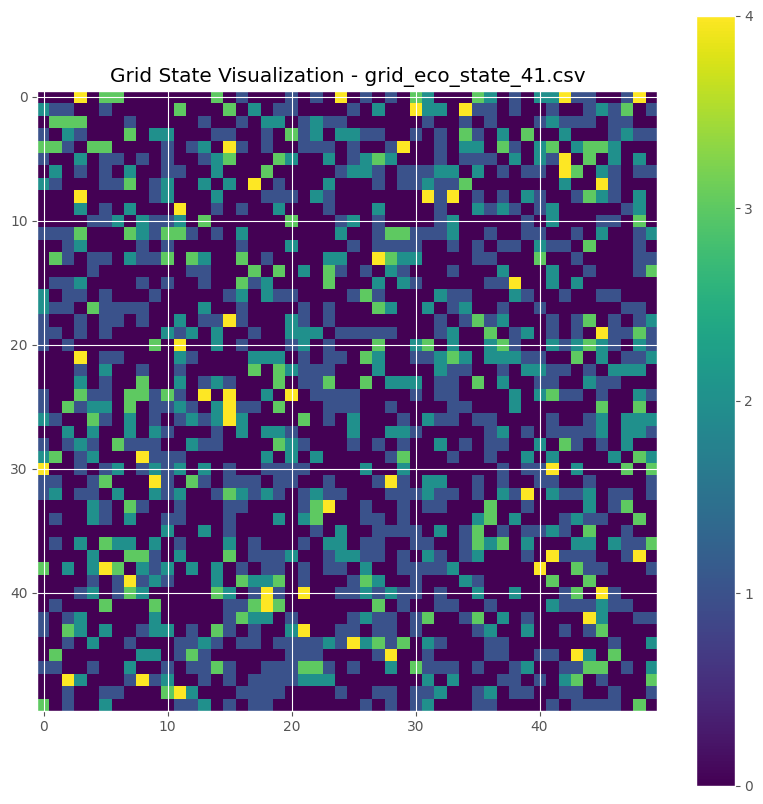

Plotted grid_eco_state_41.csv


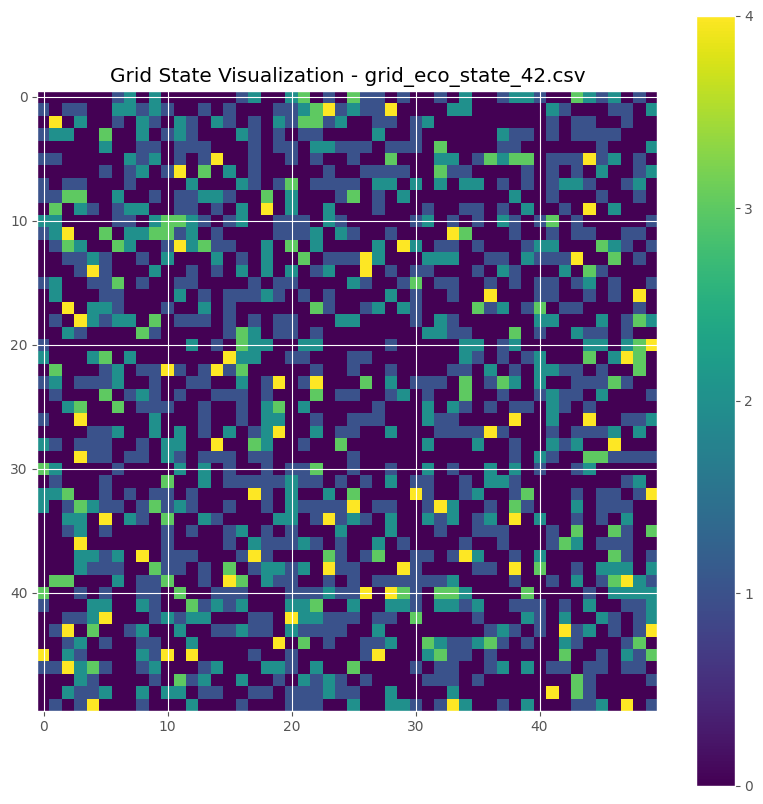

Plotted grid_eco_state_42.csv


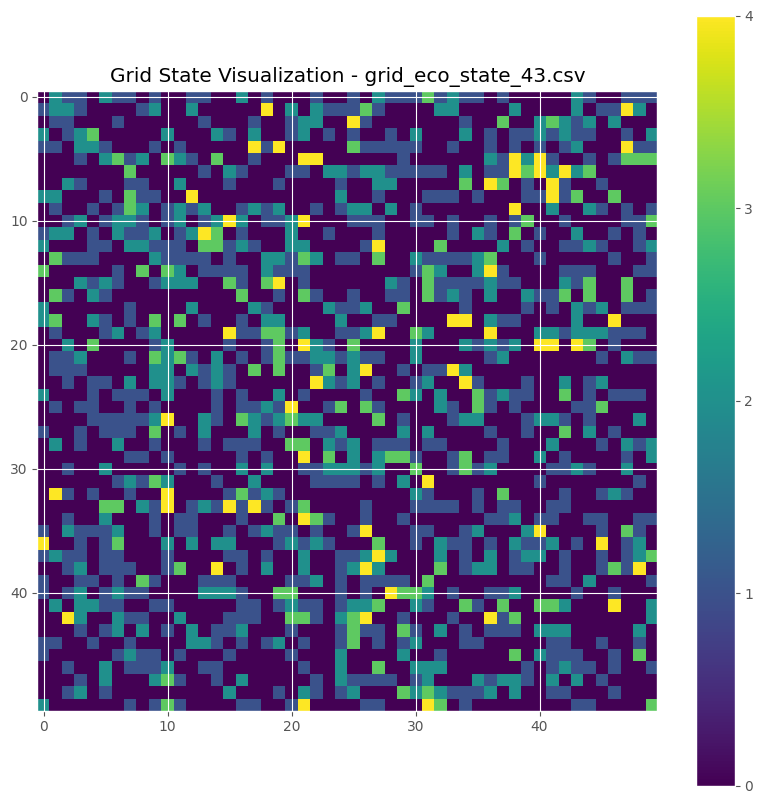

Plotted grid_eco_state_43.csv


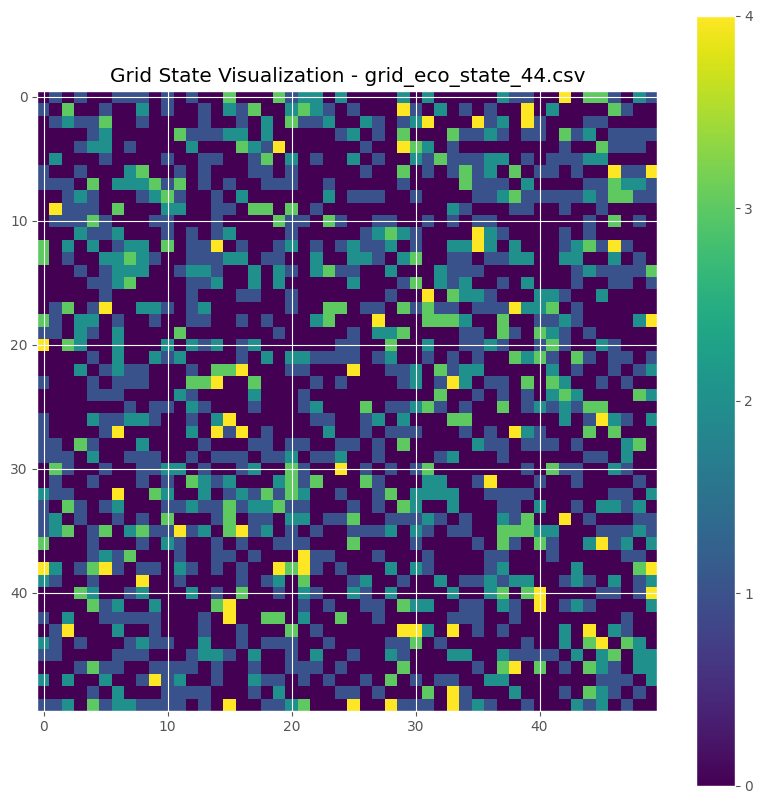

Plotted grid_eco_state_44.csv


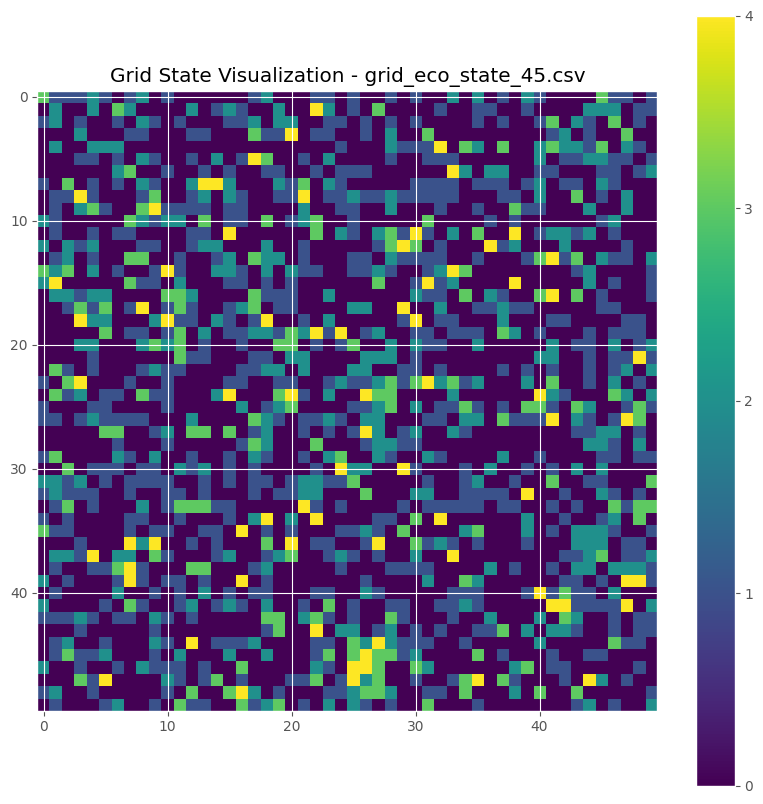

Plotted grid_eco_state_45.csv


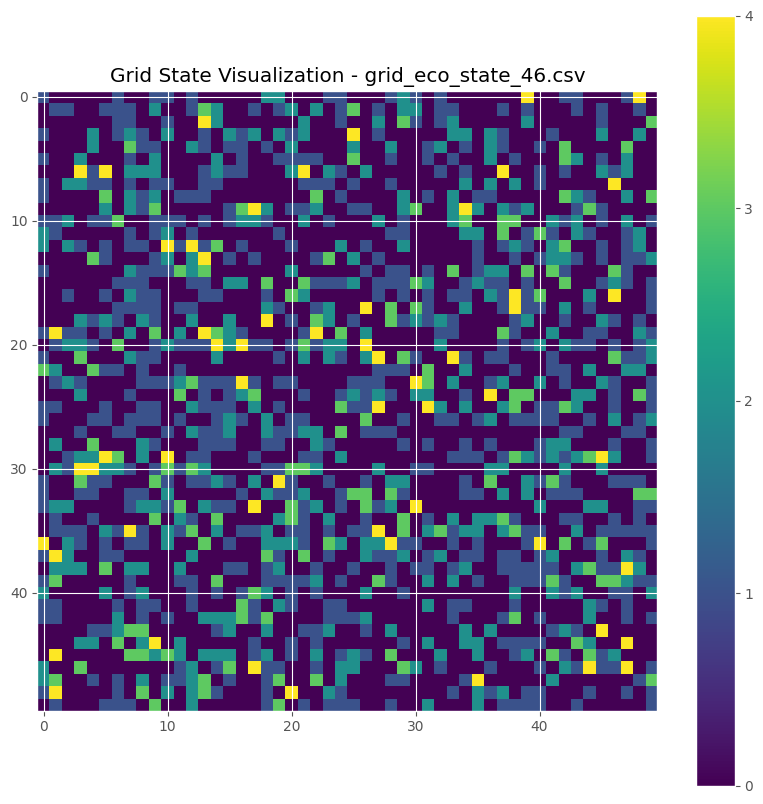

Plotted grid_eco_state_46.csv


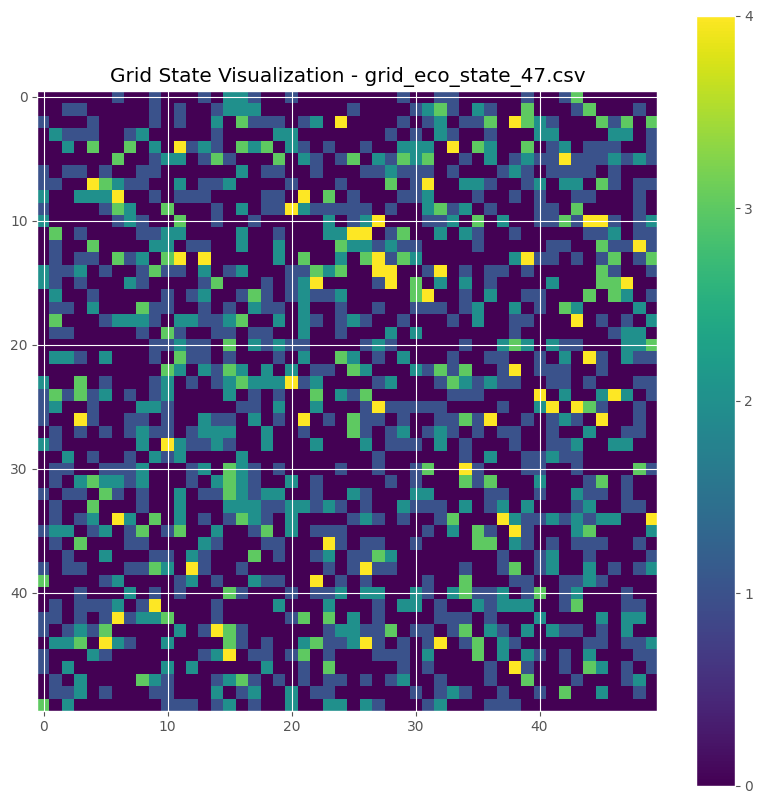

Plotted grid_eco_state_47.csv


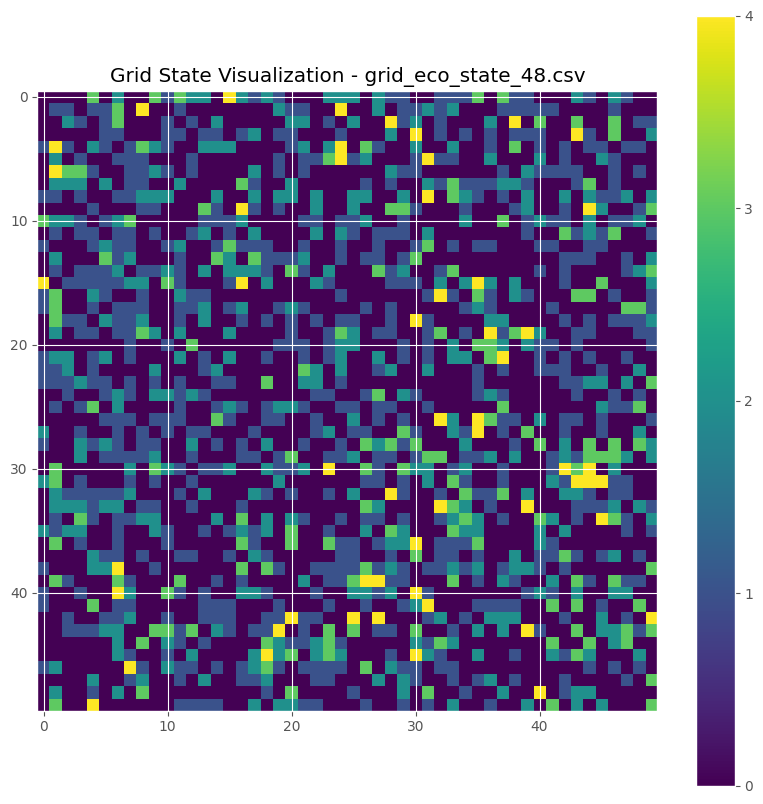

Plotted grid_eco_state_48.csv


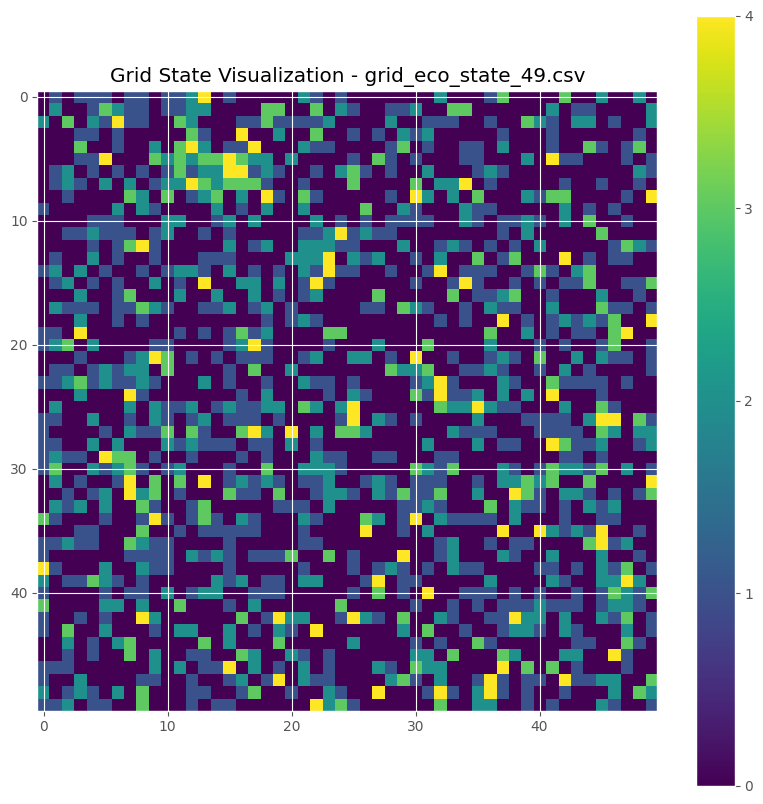

Plotted grid_eco_state_49.csv


In [132]:



def plot_grid(filename, vmin=None, vmax=None):
    # Load the grid data from the file
    grid_data = pd.read_csv(filename, header=None)
    grid_data.dropna(axis='columns', how='all', inplace=True)
    grid_array = grid_data.to_numpy()

    # Create the plot
    plt.figure(figsize=(10, 10))
    im = plt.imshow(grid_array, aspect='equal', vmin=vmin, vmax=vmax)

    # Only add colorbar ticks if vmin and vmax are provided
    if vmin is not None and vmax is not None:
        plt.colorbar(im, ticks=np.linspace(vmin, vmax, num=5))  # Adjust num for more or fewer ticks
    else:
        plt.colorbar(im)

    plt.title(f'Grid State Visualization - {filename}')
    plt.show()

# Define your color range minimum and maximum, if known
vmin = 0  # Replace with your actual minimum, if known
vmax = 4  # Replace with your actual maximum, if known

# Get a list of all grid state CSV files and sort them by timestep
csv_files = sorted(glob.glob('grid_eco_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# Plot each file
for filename in csv_files:
    plot_grid(filename, vmin, vmax)  # Pass vmin and vmax if they are known
    print(f'Plotted {filename}')


###!!!### ANIMATION

# def plot_grid(ax, filename, vmin=None, vmax=None):
#     # Load the grid data from the file
#     grid_data = pd.read_csv(filename, header=None)
#     grid_data.dropna(axis='columns', how='all', inplace=True)
#     grid_array = grid_data.to_numpy()

#     # Define the color map
#     cmap = plt.cm.viridis

#     # Update the plot
#     im = ax.imshow(grid_array, cmap=cmap, aspect='equal', vmin=vmin, vmax=vmax)
#     ax.set_title(f'Grid State Visualization - {filename}')
#     return im

# # Define your color range minimum and maximum, if known
# vmin = 0  # Replace with your actual minimum, if known
# vmax = 4  # Replace with your actual maximum, if known

# # Get a list of all grid state CSV files and sort them by timestep
# csv_files = sorted(glob.glob('grid_eco_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# # Create figure for the animation
# fig, ax = plt.subplots(figsize=(10, 10))

# # Initialize the plot with the first file
# im = plot_grid(ax, csv_files[0], vmin, vmax)

# # Function to update the figure for each frame
# def update(frame):
#     filename = csv_files[frame]
#     im = plot_grid(ax, filename, vmin, vmax)
#     return [im]

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(csv_files), interval=40, blit=True)

# plt.colorbar(im, ax=ax, ticks=np.linspace(vmin, vmax, num=5))  # Adjust num for more or fewer ticks
# plt.show()

# ani.save('simulation_socioeconomic_animation.mp4', writer='ffmpeg')  # For video



Relationship between scholarship variable - which is equivalent to government or private educational aid - and education average and social economic status average.

   Scholarship Probability   Average Education   Average Socioeconomic Status
0                     0.00              0.2238                         0.2170
1                     0.02              0.2656                         0.2462
2                     0.04              1.0588                         1.0676
3                     0.06              2.1402                         2.0126
4                     0.08              2.9612                         2.0166


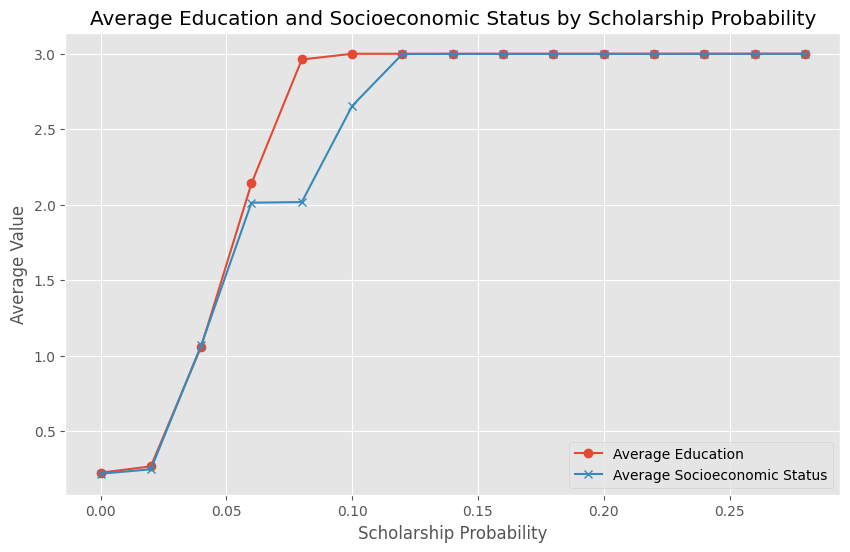

In [133]:
# Read the data from the CSV file
df = pd.read_csv('schol_avgs.csv')

# Check the first few rows to understand the column names
print(df.head())

# Assuming the first column is Scholarship Probability and the next two are the averages
scholarship_prob_col = df.columns[0]
avg_education_col = df.columns[1]
avg_eco_col = df.columns[2]

# Plotting
plt.figure(figsize=(10, 6))

# Plot average education
plt.plot(df[scholarship_prob_col], df[avg_education_col], label='Average Education', marker='o')

# Plot average socioeconomic status
plt.plot(df[scholarship_prob_col], df[avg_eco_col], label='Average Socioeconomic Status', marker='x')

# Adding titles and labels
plt.title('Average Education and Socioeconomic Status by Scholarship Probability')
plt.xlabel('Scholarship Probability')
plt.ylabel('Average Value')
plt.legend()

# Show the plot
plt.show()

Injury Variable

   Injury Probability   Average Education   Average Socioeconomic Status
0                0.00              0.2428                         0.2284
1                0.02              0.2166                         0.2054
2                0.04              0.2092                         0.1910
3                0.06              0.1902                         0.1680
4                0.08              0.1658                         0.1432


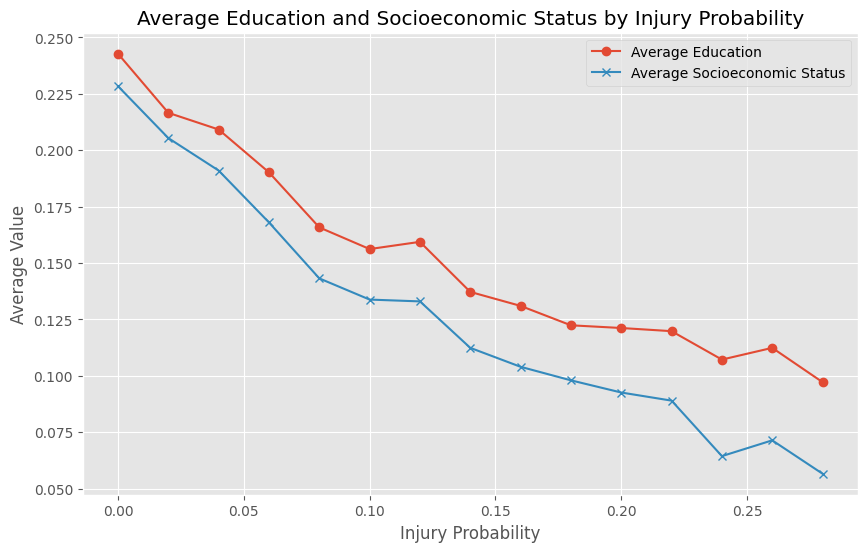

In [134]:
# Read the data from the CSV file
df = pd.read_csv('injury_avgs.csv')

# Check the first few rows to understand the column names
print(df.head())

# Assuming the first column is Scholarship Probability and the next two are the averages
scholarship_prob_col = df.columns[0]
avg_education_col = df.columns[1]
avg_eco_col = df.columns[2]

# Plotting
plt.figure(figsize=(10, 6))

# Plot average education
plt.plot(df[scholarship_prob_col], df[avg_education_col], label='Average Education', marker='o')

# Plot average socioeconomic status
plt.plot(df[scholarship_prob_col], df[avg_eco_col], label='Average Socioeconomic Status', marker='x')

# Adding titles and labels
plt.title('Average Education and Socioeconomic Status by Injury Probability')
plt.xlabel('Injury Probability')
plt.ylabel('Average Value')
plt.legend()

# Show the plot
plt.show()

Class Analysis

    0     1    2    3    4    5     6     7     8     9   ...    40    41  \
0  337   275  403  558  711  866  1005  1105  1211  1274  ...  1292  1314   
1  557   241  313  344  410  463   517   562   608   701  ...   657   656   
2  602   319  316  321  326  324   322   324   364   327  ...   330   326   
3  522   537  504  464  410  343   283   291   183   141  ...   154   153   
4  482  1128  964  813  643  504   373   218   134    57  ...    67    51   

     42    43    44    45    46    47    48    49  
0  1305  1341  1308  1315  1329  1316  1310  1321  
1   670   647   662   645   643   655   656   617  
2   342   322   309   308   334   336   328   334  
3   114   127   158   158   137   135   152   152  
4    69    63    63    74    57    58    54    76  

[5 rows x 50 columns]
       0    1    2    3     4
0    337  557  602  522   482
1    275  241  319  537  1128
2    403  313  316  504   964
3    558  344  321  464   813
4    711  410  326  410   643
5    866  463  324  34

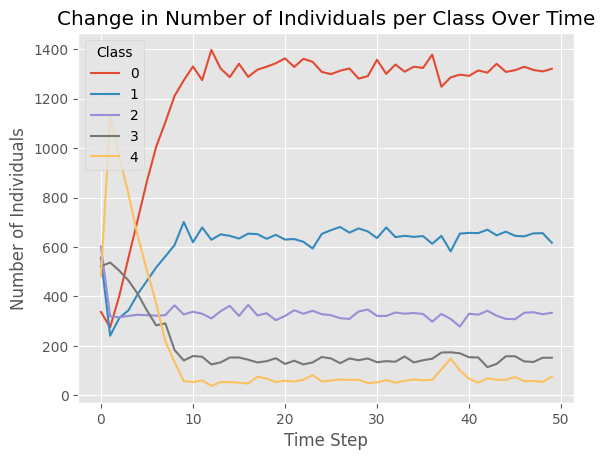

In [135]:
def count_classes(filename):
    # Load the grid data from the file
    grid_data = pd.read_csv(filename, header=None)
    grid_data.dropna(axis='columns', how='all', inplace=True)

    # Debug: Inspect the data
    #print(grid_data.head())

    # Flatten the grid to a 1D array and count occurrences of each class
    class_counts = grid_data.stack().value_counts()



    # Optional: Filter for expected classes only
    class_counts = class_counts[class_counts.index.isin([0, 1, 2, 3, 4])]
    # Debug: Inspect the counts
    #print(class_counts)
    return class_counts


# Get a list of all grid state CSV files and sort them by timestep
csv_files = sorted(glob.glob('grid_eco_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# Dictionary to store counts for each class at each time point
class_counts_over_time = {}

# Count classes for each file
for filename in csv_files:
    class_counts = count_classes(filename)
    time_step = int(re.search(r'(\d+)', filename).group(0))
    class_counts_over_time[time_step] = class_counts

# Convert to DataFrame for plotting
# Convert to DataFrame for plotting
counts_df = pd.DataFrame(class_counts_over_time).fillna(0)
print(counts_df)
# Ensure all classes are represented, even if some have a count of 0
expected_classes = [0, 1, 2, 3, 4]
for cls in expected_classes:
    if cls not in counts_df.index:
        counts_df.loc[cls] = 0

# Sort the DataFrame by class index
counts_df_transposed = counts_df.transpose()
print(counts_df_transposed)
# Plotting
counts_df_transposed.plot(kind='line')
plt.title('Change in Number of Individuals per Class Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Individuals')
plt.legend(title='Class', labels=[0, 1, 2, 3, 4])
plt.grid(True)
plt.show()


Correlation Between Education Level and Socioeconomic Status

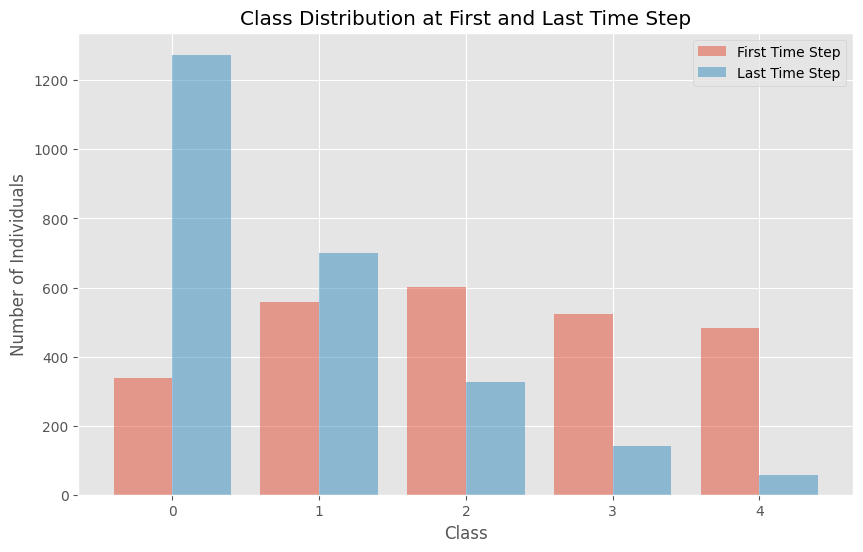

In [136]:
# Select the first and last time steps
# Select the first and last time steps

plt.figure(figsize=(10, 6))

# Classes
classes = [0, 1, 2, 3, 4]

# Plot histogram for the first time step
plt.bar(classes, counts_df[0], width=0.4, align='center', alpha=0.5, label='First Time Step')

# Plot histogram for the last time step
# Offset the x position for the last time step for clarity
last_time_step_x = [x + 0.4 for x in classes]
plt.bar(last_time_step_x, counts_df[9], width=0.4, align='center', alpha=0.5, label='Last Time Step')

plt.title('Class Distribution at First and Last Time Step')
plt.xlabel('Class')
plt.ylabel('Number of Individuals')
plt.xticks([x + 0.2 for x in classes], classes)  # Adjust x-ticks to be in the middle of the bars
plt.legend()
plt.show()

Education Levels

    0     1     2     3    4    5     6     7     8     9   ...    40    41  \
0  430   281   450   628  789  976  1108  1307  1393  1524  ...  1509  1545   
1  529   151   219   315  388  455   557   584   656   668  ...   686   674   
2  527   133   139   153  181  222   236   225   254   250  ...   253   231   
3  604   221   229   211  188  144   132   104    81    50  ...    47    48   
4  410  1714  1463  1193  954  703   467   280   116     8  ...     5     2   

     42    43    44    45    46    47    48      49  
0  1550  1576  1515  1513  1549  1548  1529  1502.0  
1   649   631   669   701   667   665   683   705.0  
2   246   233   259   235   223   246   244   244.0  
3    51    53    53    48    54    39    40    49.0  
4     4     7     4     3     7     2     4     0.0  

[5 rows x 50 columns]
         0      1      2      3       4
0    430.0  529.0  527.0  604.0   410.0
1    281.0  151.0  133.0  221.0  1714.0
2    450.0  219.0  139.0  229.0  1463.0
3    628.0  315.0 

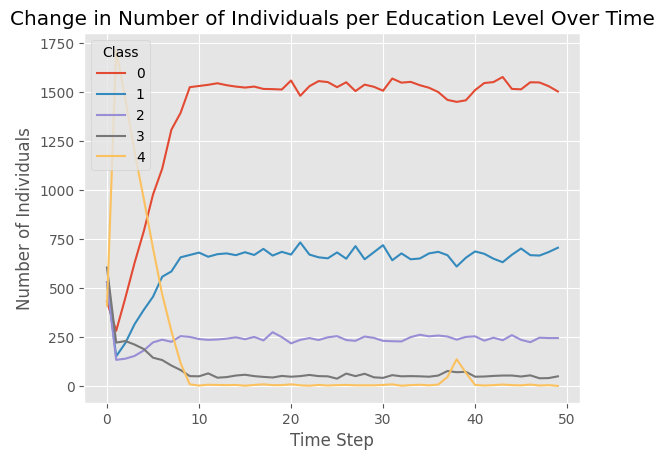

In [137]:
def count_classes(filename):
    # Load the grid data from the file
    grid_data = pd.read_csv(filename, header=None)
    grid_data.dropna(axis='columns', how='all', inplace=True)

    # Debug: Inspect the data
    #print(grid_data.head())

    # Flatten the grid to a 1D array and count occurrences of each class
    class_counts = grid_data.stack().value_counts()



    # Optional: Filter for expected classes only
    class_counts = class_counts[class_counts.index.isin([0, 1, 2, 3, 4])]
    # Debug: Inspect the counts
    #print(class_counts)
    return class_counts


# Get a list of all grid state CSV files and sort them by timestep
csv_files = sorted(glob.glob('grid_edu_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

# Dictionary to store counts for each class at each time point
class_counts_over_time = {}

# Count classes for each file
for filename in csv_files:
    class_counts = count_classes(filename)
    time_step = int(re.search(r'(\d+)', filename).group(0))
    class_counts_over_time[time_step] = class_counts

# Convert to DataFrame for plotting
# Convert to DataFrame for plotting
counts_df = pd.DataFrame(class_counts_over_time).fillna(0)
print(counts_df)
# Ensure all classes are represented, even if some have a count of 0
expected_classes = [0, 1, 2, 3, 4]
for cls in expected_classes:
    if cls not in counts_df.index:
        counts_df.loc[cls] = 0

# Sort the DataFrame by class index
counts_df_transposed = counts_df.transpose()
print(counts_df_transposed)
# Plotting
counts_df_transposed.plot(kind='line')
plt.title('Change in Number of Individuals per Education Level Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Individuals')
plt.legend(title='Class', labels=[0, 1, 2, 3, 4])
plt.grid(True)

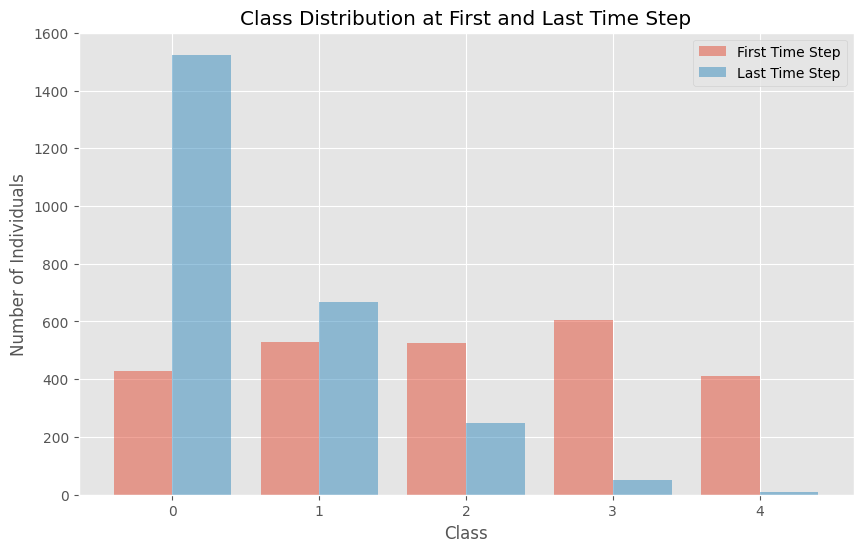

In [138]:
# Select the first and last time steps
# Select the first and last time steps

plt.figure(figsize=(10, 6))

# Classes
classes = [0, 1, 2, 3, 4]

# Plot histogram for the first time step
plt.bar(classes, counts_df[0], width=0.4, align='center', alpha=0.5, label='First Time Step')

# Plot histogram for the last time step
# Offset the x position for the last time step for clarity
last_time_step_x = [x + 0.4 for x in classes]
plt.bar(last_time_step_x, counts_df[9], width=0.4, align='center', alpha=0.5, label='Last Time Step')

plt.title('Class Distribution at First and Last Time Step')
plt.xlabel('Class')
plt.ylabel('Number of Individuals')
plt.xticks([x + 0.2 for x in classes], classes)  # Adjust x-ticks to be in the middle of the bars
plt.legend()
plt.show()

Correlation between education and socioeconomic status

In [139]:
# Get a list of all education state CSV files and sort them by timestep
edu_csv_files = sorted(glob.glob('grid_edu_state_*.csv'), key=lambda f: int(re.search(r'(\d+)', f).group(0)))

for edu_filename in edu_csv_files:
    # Extract the timestep from the filename
    timestep = re.search(r'(\d+)', edu_filename).group(0)

    # Construct the corresponding economic status filename
    eco_filename = f'grid_eco_state_{timestep}.csv'

    # Load the data from the CSV files
    df_eco = pd.read_csv(eco_filename, header=None)
    df_edu = pd.read_csv(edu_filename, header=None)

    # Flatten the data if it's in a grid format
    eco_flat = df_eco.stack().reset_index(drop=True)
    edu_flat = df_edu.stack().reset_index(drop=True)

    # Create a combined DataFrame
    df_combined = pd.DataFrame({'EconomicStatus': eco_flat, 'EducationLevel': edu_flat})

    # Calculate the correlation
    correlation = df_combined['EconomicStatus'].corr(df_combined['EducationLevel'])

    print(f"Correlation at timestep {timestep}:", correlation)

Correlation at timestep 0: 0.08944006827025684
Correlation at timestep 1: 0.6488822338122143
Correlation at timestep 2: 0.7081731521404624
Correlation at timestep 3: 0.7304727713211201
Correlation at timestep 4: 0.7066498447266862
Correlation at timestep 5: 0.6912009015406907
Correlation at timestep 6: 0.6251179046232541
Correlation at timestep 7: 0.5092299027626471
Correlation at timestep 8: 0.34202486156702927
Correlation at timestep 9: 0.058509100695033116
Correlation at timestep 10: 0.017877934129352083
Correlation at timestep 11: 0.008687397036141228
Correlation at timestep 12: 0.034189901298334845
Correlation at timestep 13: 0.03987109708592411
Correlation at timestep 14: 0.08028170702561087
Correlation at timestep 15: 0.032955588122182
Correlation at timestep 16: 0.06269126323727811
Correlation at timestep 17: 0.08905481392587487
Correlation at timestep 18: 0.04837268536502683
Correlation at timestep 19: 0.040273917264247144
Correlation at timestep 20: 0.01565266536303935
Correl

NSE Effect

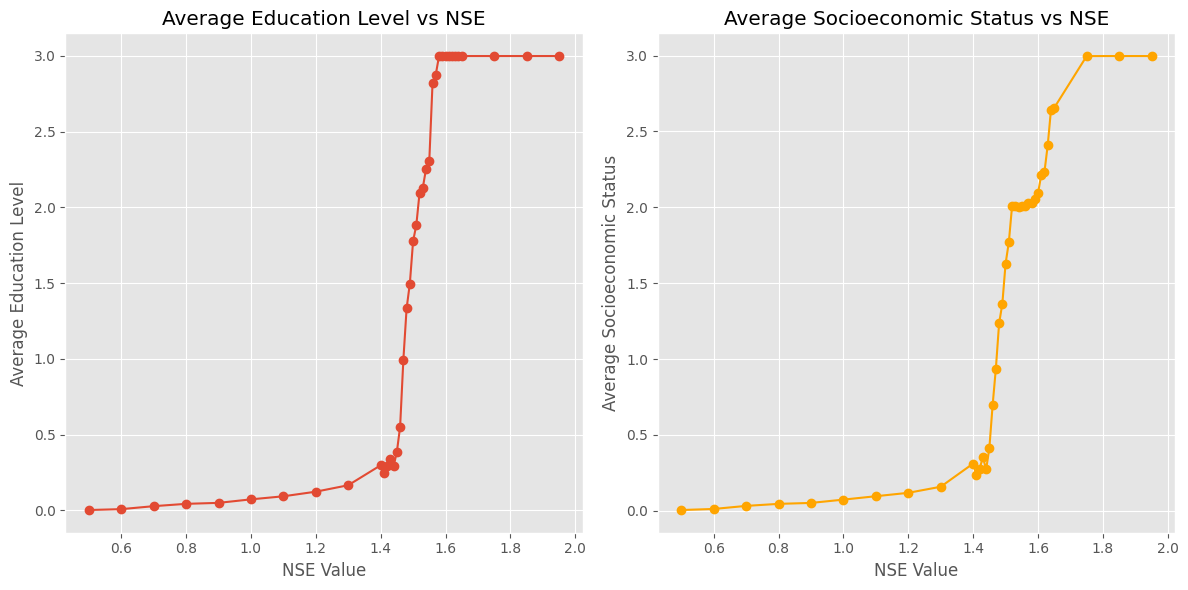

In [154]:
# Load the data

df_nse = pd.read_csv('nse_avgs.csv')

print(df_nse)

# Plotting

plt.figure(figsize=(12, 6))



# Plot average education level

plt.subplot(1, 2, 1)

plt.plot(df_nse['NSE Value'], df_nse[' Average Education'], marker='o')

plt.title('Average Education Level vs NSE')

plt.xlabel('NSE Value')

plt.ylabel('Average Education Level')

plt.grid(True)



# Plot average socioeconomic status

plt.subplot(1, 2, 2)

plt.plot(df_nse['NSE Value'], df_nse[' Average Socioeconomic Status'], marker='o', color='orange')

plt.title('Average Socioeconomic Status vs NSE')

plt.xlabel('NSE Value')

plt.ylabel('Average Socioeconomic Status')

plt.grid(True)



plt.tight_layout()

plt.show()



variance of averages as functions of nse

In [153]:
overall_variance = df_nse[' Average Education'].var()
print(overall_variance)


# Plot the variances
plt.figure(figsize=(10, 5))

# Assuming your CSV has columns named 'NSE Value', 'Variance Education', 'Variance Socioeconomic Status'
# Plot variance in education
plt.plot(df_nse['NSE Value'], df_nse['Avg Edu Variance'], label='Variance in Education', marker='o')

# Plot variance in socioeconomic status
plt.plot(df_nse['NSE Value'], df_nse['Avg Eco Variance'], label='Variance in Socioeconomic Status', marker='x')

# Label the axes and the plot
plt.xlabel('NSE Value')
plt.ylabel('Variance')
plt.title('Variance as a Function of NSE')
plt.legend()

# Show the plot
plt.show()

1.5877480295874826


KeyError: 'Avg Edu Variance'

<Figure size 1000x500 with 0 Axes>

Simulating a depression

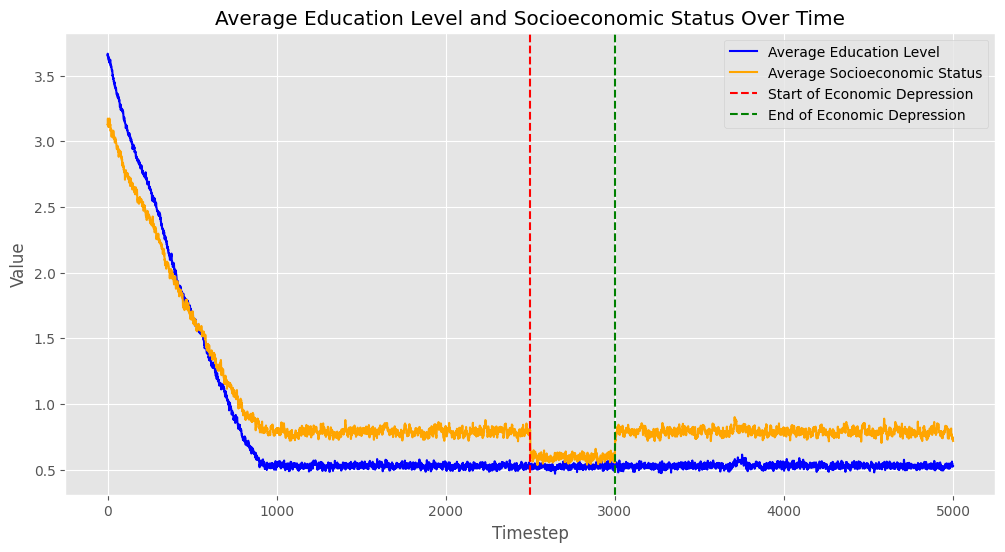

In [141]:
# Load the data from the CSV file
df = pd.read_csv('depression.csv')

# Plotting Average Education Level and Average Socioeconomic Status
plt.figure(figsize=(12, 6))

# Plot average education level
plt.plot(df['Timestep'], df['AverageEducationLevel'], label='Average Education Level', color='blue')

# Plot average socioeconomic status
plt.plot(df['Timestep'], df['AverageSocioeconomicStatus'], label='Average Socioeconomic Status', color='orange')

# Adding lines to indicate the period of economic depression
timesteps = df['Timestep'].max()
plt.axvline(x=timesteps/2, color='r', linestyle='--', label='Start of Economic Depression')
plt.axvline(x=timesteps/2 + timesteps/10, color='g', linestyle='--', label='End of Economic Depression')

# Labels and Title
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.title('Average Education Level and Socioeconomic Status Over Time')
plt.legend()

plt.show()

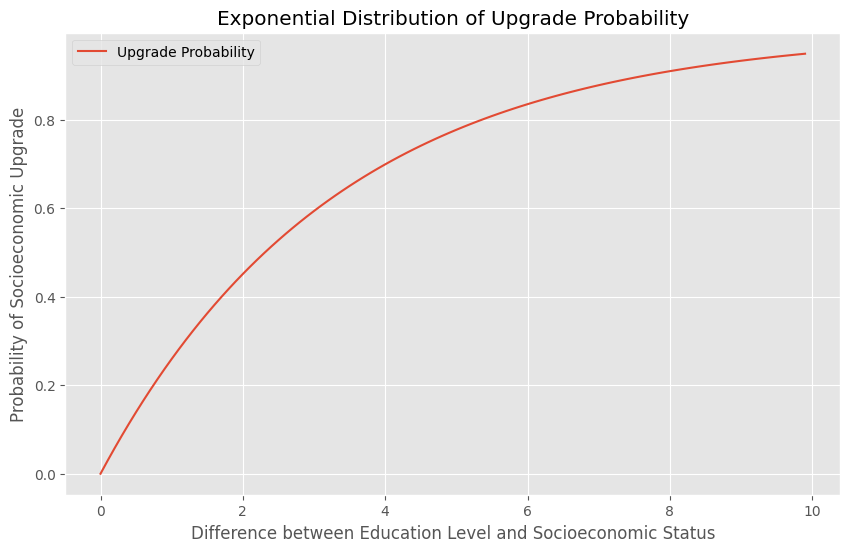

0.2591817793182821
0.4511883639059736
0.5934303402594008


In [142]:
def calculate_upgrade_probability(difference, base=1.2, scaleFactor=0.3):
    """Calculate the upgrade probability based on an exponential distribution."""
    return 1 - np.exp(-scaleFactor * difference)

# Generate a range of differences
differences = np.arange(0, 10, 0.1)  # Differences from 0 to 10

# Calculate probabilities for each difference
probabilities = [calculate_upgrade_probability(diff) for diff in differences]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(differences, probabilities, label='Upgrade Probability')
plt.title('Exponential Distribution of Upgrade Probability')
plt.xlabel('Difference between Education Level and Socioeconomic Status')
plt.ylabel('Probability of Socioeconomic Upgrade')
plt.legend()
plt.grid(True)
plt.show()

print(calculate_upgrade_probability(1))
print(calculate_upgrade_probability(2))
print(calculate_upgrade_probability(3))